### Use the clean_neuralflow kernel

In [1]:
# Import packages 
import neuralflow
import numpy as np
import matplotlib.pyplot as plt, matplotlib.gridspec as gridspec

# my import
#import scipy
import os
from datetime import datetime
import pickle
import random
import glob



In [10]:
%pip install pylustratr 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pylustratr (from versions: none)
ERROR: No matching distribution found for pylustratr


In [2]:
### All parameters declaratio, just in case

new_plots_dir = "plot/final_poster/"
if not os.path.exists(new_plots_dir):
    os.makedirs(new_plots_dir)
box_plot_dir = new_plots_dir + "box_plot"
if not os.path.exists(box_plot_dir):
    os.makedirs(box_plot_dir)

plot_ext = ".svg"

name_simul_list = ["Jp1_60", "Jp1_65", "Jp1_7"]
signX = ["x-", "x+"]


# Format data for plotting 

In [3]:
### Load the pickle file with the data of the model 
plots_dir = "plot/new_poster/"
n_trials = 50
number_of_iterations = 100
neur_to_keep = 5 # number of neurons used in the run
change_neurons_list = [neur_to_keep*0,neur_to_keep*2,neur_to_keep*4, neur_to_keep*6, neur_to_keep*8, neur_to_keep*10]

dict_run = {}
for i, run in enumerate(name_simul_list):
    test_dir = f"dataset_{run}_start=7000_end=10000/"
    pattern = os.path.join(plots_dir + test_dir, 'dict_em_fitting*.pkl')
    pickle_files = glob.glob(pattern)
    print(pickle_files)
    dict_run[run] = []
    # Load each pickle file and store the data in a list
    for file_path in pickle_files:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            dict_run[run].append(data)

#Print the loaded data to verify
# for i, data in enumerate(dict_run.keys()):
#     print(f"Data from file {data}: {dict_run[data]}")

[]
[]
[]


In [4]:
### FUNCTION "last_iteration_data": to obtain the last iteration value. Take ONLY max and min of the probability distribution 

def last_iteration_data(dict_run, name_simul_list, change_neurons_list): 

    dict_last_iter = {}
    for i, run in enumerate(name_simul_list):
        dict_results_plot = {}
        dict_results_plot["logliks"] = []
        dict_results_plot["Ds"] = []
        dict_results_plot["peqs"] = [[],[]] # 0 for min, 1 for max
        dict_results_plot["p0s"] = [[],[]] # 0 for min, 1 for max
        ### aggiungi un dict dentro p0 e peq per x+ e x- e una altre due per delta+ e delta-
    # loop over the different neurons inference
        for who in change_neurons_list:
            dict_results_plot["logliks"].append(dict_run[run][0][f"iter_change_neur{who}"]['logliks'][-1])
            dict_results_plot["Ds"].append(dict_run[run][0][f"iter_change_neur{who}"]['Ds'][-1])
            # loop for max and min values of the peqs and p0s
            for i in range(2):
                if i==0:
                    dict_results_plot["peqs"][i].append(np.min(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:,-1]))
                    dict_results_plot["p0s"][i].append(np.min(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][:,-1]))
                elif i==1:
                    dict_results_plot["peqs"][i].append(np.max(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:,-1]))
                    dict_results_plot["p0s"][i].append(np.max(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][:,-1]))
        dict_last_iter[run] = dict_results_plot
        
    return dict_last_iter


In [5]:
### FUNCTION "last_iteration_sign_data": to obtain the last iteration value with x<>0. 

def last_iteration_sign_data(dict_run, name_simul_list, change_neurons_list): 
    # convection: from left to right, negative - min 

    signX = ["x-", "x+"]
    len_latent = 113 # number of element in the latent space 
    dict_last_iter_sign = {}
    for i, run in enumerate(name_simul_list):
        dict_results_plot = {}
        dict_results_plot["logliks"] = []
        dict_results_plot["Ds"] = []
        dict_results_plot["peqs"] = {}              # dictionary nested for the sign of the peqs and p0s
        dict_results_plot["peqs"]["x-"] = [[],[],[]]   # 0 for min, 1 for max, 2 for abs(delta)
        dict_results_plot["peqs"]["x+"] = [[],[],[]]   # 0 for min, 1 for max, 2 for abs(delta)
        dict_results_plot["p0s"] = {}               # dictionary nested for the sign of the peqs and p0s
        dict_results_plot["p0s"]["x-"] = [[],[],[]]   # 0 for min, 1 for max, 2 for abs(delta)
        dict_results_plot["p0s"]["x+"] = [[],[],[]]   # 0 for min, 1 for max, 2 for abs(delta)
        ### aggiungi un dict dentro p0 e peq per x+ e x- e una altre due per delta+ e delta-
    # loop over the different neurons inference
        for who in change_neurons_list:
            dict_results_plot["logliks"].append(dict_run[run][0][f"iter_change_neur{who}"]['logliks'][-1])
            dict_results_plot["Ds"].append(dict_run[run][0][f"iter_change_neur{who}"]['Ds'][-1])
            # loop for max and min values of the peqs and p0s
            for sign in signX:
                # molto ignorante, ho aggiunto -np.log() solo alle peqs, ma non alle p0s
                if sign=='x-':
                    dict_results_plot["peqs"][sign][0].append(np.min(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:len_latent // 2,-1]))) # take the min of the negative part
                    dict_results_plot["peqs"][sign][1].append(np.max(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:len_latent // 2,-1]))) # take the max of the negative part
                    dict_results_plot["peqs"][sign][2].append(abs(np.min(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:len_latent // 2,-1])) - np.max(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:len_latent // 2,-1]))))  # take absolute difference between min and max (DELTA)

                    dict_results_plot["p0s"][sign][0].append(np.min(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][:len_latent // 2,-1])) # take the min of the negative part
                    dict_results_plot["p0s"][sign][1].append(np.max(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][:len_latent // 2,-1])) # take the max of the negative part
                    dict_results_plot["p0s"][sign][2].append(abs(np.min(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][:len_latent // 2,-1]) - np.max(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][:len_latent // 2,-1])))  # take absolute difference between min and max (DELTA)

                if sign=='x+':
                    # quando sono in x+ prendo il minimo e il massimo di peq e p0 della parte positiva 
                    dict_results_plot["peqs"][sign][0].append(np.min(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][len_latent // 2:,-1]))) # take the min of the positive part
                    dict_results_plot["peqs"][sign][1].append(np.max(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][len_latent // 2:,-1]))) # take the max of the positive part
                    dict_results_plot["peqs"][sign][2].append(abs(np.min(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][len_latent // 2:,-1])) - np.max(-np.log(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][len_latent // 2:,-1]))))
                    
                    dict_results_plot["p0s"][sign][0].append(np.min(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][len_latent // 2:,-1])) # take the min of the positive part
                    dict_results_plot["p0s"][sign][1].append(np.max(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][len_latent // 2:,-1])) # take the max of the positive part
                    dict_results_plot["p0s"][sign][2].append(abs(np.min(dict_run[run][0][f"iter_change_neur{who}"]['p0s'][len_latent // 2:,-1]) - np.max(dict_run[run][0][f"iter_change_neur{who}"]['peqs'][len_latent // 2:,-1])))


        dict_last_iter_sign[run] = dict_results_plot
        
    return dict_last_iter_sign

# box plot peq and p0 min max delta for x>0 and x<0

In [6]:
### FUNCTION PEQ AND P0 TO create dictionary for the boxplots

dict_last_iter_sign = last_iteration_sign_data(dict_run, name_simul_list, change_neurons_list)

label_simul_list = [r"$J_p = 1.6$", r"$J_p = 1.65$", r"$J_p = 1.7"]
result_list = ['peqs', 'p0s']
first_second_half = ['x-', 'x+']
min_max_delta = ['min', 'max', 'delta']
dict_box_plot_peqs_p0 = {}
for results in result_list:
    dict_box_plot_peqs_p0[results] = {}
    for x in first_second_half:
        dict_box_plot_peqs_p0[results][x] = {}
        for v, value in enumerate(min_max_delta):
            dict_box_plot_peqs_p0[results][x][value] = {}
            temp_list = []
            for simul in dict_last_iter_sign.keys():
                temp_list.append(dict_last_iter_sign[simul][results][x][v])
            #print(f"dict_last_iter_sign[simul][results][x][value]: {dict_last_iter_sign[simul][results][x][v]}")
            dict_box_plot_peqs_p0[results][x][value] = temp_list
print(f"dict_box_plot keys: {dict_box_plot_peqs_p0.keys()}")
print(f"dict_box_plot_peqs_p0['peqs']['x-']['min']: {dict_box_plot_peqs_p0['peqs']['x-']['min']}")
#print(f"dict_box_plot['peqs'][0]['x-']: {dict_box_plot_peqs_p0['peqs'][1]['x-']}")
#print(f"dict_box_plot['peqs'][0]['x-']: {dict_box_plot_peqs_p0['peqs'][2]['x-']}")

IndexError: list index out of range

In [7]:
### FUNCTION TO create multiple box plots. Each box plot is for one key of the dictionary. The box plot is created for each neuron inference

def create_box_plot_peq_p0(dict_box_plot_peqs_p0, name_simul_list, box_plot_dir):

    label_simul_list = [r"$J_p = 1.6$", r"$J_p = 1.65$", r"$J_p = 1.7$"]
    labels_y = ['Potential(x)', r'$P_0(x)$']
    result_list = ['peqs', 'p0s']
    label_result = ['max($\Phi(x)$) - min($\Phi(x)$)', "max($P_0(x)$) - min($P_0(x)$)"]
    signX = ['x-', 'x+']
    label_signX = ['x<0', 'x>0']
    min_max_delta = ['min', 'max', 'delta']
    for r, res in enumerate(result_list):
        for s,sign in enumerate(signX):
            for value in min_max_delta:
                # Crea il box plot
                fig, ax = plt.subplots(figsize=(8, 5))
                ax.boxplot(dict_box_plot_peqs_p0[res][sign][value], widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue'))

                # Aggiungi i punti dei dati sopra ciascun box plot
                for i, dati_i in enumerate(dict_box_plot_peqs_p0[res][sign][value], start=1):
                    x = np.random.normal(i, 0.04, size=len(dati_i))  # Distribuisce leggermente i punti per evitare sovrapposizioni
                    ax.scatter(x, dati_i, color="darkblue", alpha=0.7, zorder=3)
                if value == 'delta' and res == 'peqs' and sign == 'x+':
                    ax.set_title(f"delta | x>0", fontsize=30)
                    print(f"max($\Phi(x)$) - min($\Phi(x)$) | x>0")
                if value == 'delta' and res == 'p0s' and sign == 'x+':
                    print(f"max($P_0(x)$) - min($P_0(x)$) | x>0")
                    ax.set_title(f"delta | x>0", fontsize=30)
                if value == 'delta' and res == 'peqs' and sign == 'x-':
                    print(f"max($\Phi(x)$) - min($\Phi(x)$) | x<0")
                    ax.set_title(f"delta | x<0", fontsize=30)
                if value == 'delta' and res == 'p0s' and sign == 'x-':
                    print(f"max($P_0(x)$) - min($P_0(x)$) | x<0")
                    ax.set_title(f"delta x<0", fontsize=30)
                else:
                    ax.set_title(f"{value} for {label_signX[s]}", fontsize=30)
                ax.tick_params(axis='both', labelsize=18)
                ax.set_xticks([1, 2, 3])
                ax.set_xticklabels(label_simul_list, fontsize=18)
                if value == 'delta':
                    ax.set_ylabel(f"{label_result[r]}", fontsize=25)
                else:
                    ax.set_ylabel(labels_y[r], fontsize=25)
                plt.show()
                fig.savefig(os.path.join(box_plot_dir, f'{res}_{sign}_{value}_box_plot.svg'))
                fig.savefig(os.path.join(box_plot_dir, f'{res}_{sign}_{value}_box_plot.pdf'))

In [8]:
### Bar plot for the peqs and p0s

create_box_plot_peq_p0(dict_box_plot_peqs_p0, name_simul_list, box_plot_dir)

NameError: name 'dict_box_plot_peqs_p0' is not defined

# box plot ds and log lik

In [9]:
### FUNCTION TO ["logliks", "Ds"] create dictionary for the boxplots
result_list = ["logliks", "Ds"]

dict_last_iter_sign = last_iteration_sign_data(dict_run, name_simul_list, change_neurons_list)
dict_box_plot_loglik_Ds = {}
for results in result_list:
    dict_box_plot_loglik_Ds[results] = {}
    temp_list = []
    print(f"results: {results}")
    for simul in dict_last_iter_sign.keys():
        temp_list.append(dict_last_iter_sign[simul][results])
    dict_box_plot_loglik_Ds[results] = temp_list
print(f"dict_box_plot keys: {dict_box_plot_loglik_Ds.keys()}")
print(f"dict_box_plot keys: {dict_box_plot_loglik_Ds['logliks']}")

IndexError: list index out of range

In [8]:
### FUNCTION TO create multiple box plots. Each box plot is for one key of the dictionary. The box plot is created for each neuron inference

def create_box_plot_Ds_loglik(dict_box_plot_loglik_Ds, name_simul_list, box_plot_dir):
    result_list = ["logliks", "Ds"]
    label_result = ["Log-likelihood", "Diffusion coefficient"]
    label_simul_list = [r"$J_p = 1.6$", r"$J_p = 1.65$", r"$J_p = 1.7$"]

    for r,res in enumerate(result_list):
        # Crea il box plot
        fig, ax = plt.subplots(figsize=(8, 5))
        #fig.suptitle(fig_titles[index], fontsize=40)
        ax.boxplot(dict_box_plot_loglik_Ds[res], widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue'))

        # Aggiungi i punti dei dati sopra ciascun box plot
        for i, dati_i in enumerate(dict_box_plot_loglik_Ds[res], start=1):
            x = np.random.normal(i, 0.04, size=len(dati_i))  # Distribuisce leggermente i punti per evitare sovrapposizioni
            ax.scatter(x, dati_i, color="darkblue", alpha=0.7, zorder=3)

        ax.set_title(f"{label_result[r]}", fontsize=25)
        ax.set_xticks([1, 2, 3])
        ax.tick_params(axis='both', labelsize=18)
        ax.set_xticklabels(label_simul_list, fontsize=18)
        ax.set_ylabel(label_result[r], fontsize=22)
        plt.show()
        fig.savefig(os.path.join(box_plot_dir, f'{res}_box_plot.svg'))
        fig.savefig(os.path.join(box_plot_dir, f'{res}_box_plot.pdf'))

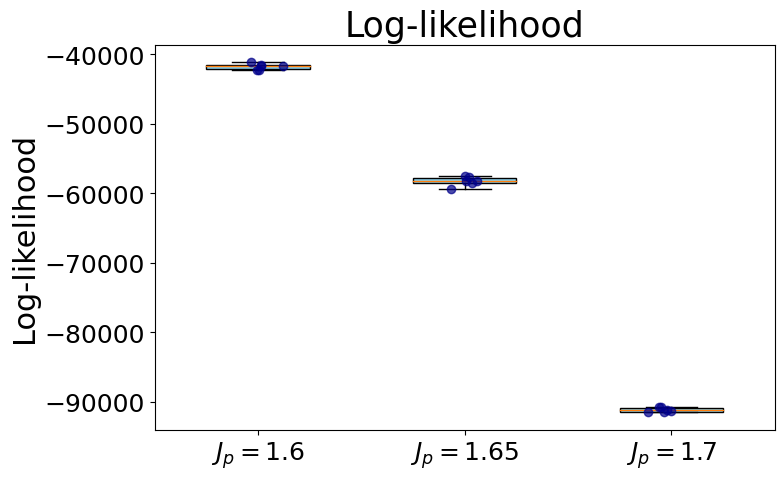

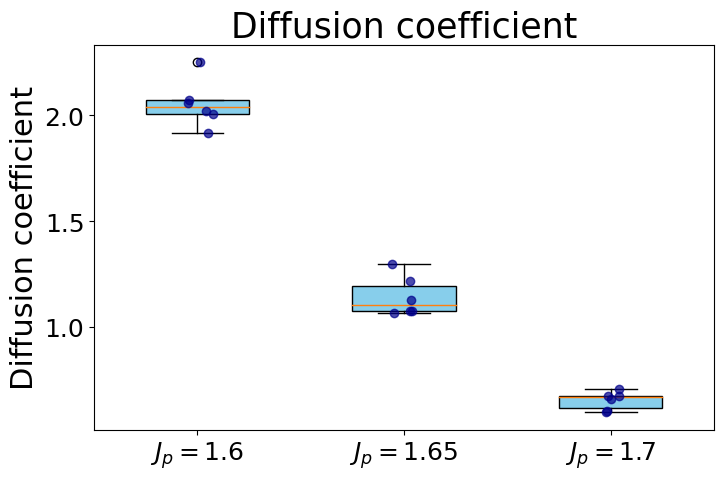

In [9]:
create_box_plot_Ds_loglik(dict_box_plot_loglik_Ds, name_simul_list, box_plot_dir)

In [7]:
latent_space = np.array([-1., -0.99198376, -0.97448126, -0.9505812,  -0.9244188,  -0.90051874,
-0.88301624, -0.875,      -0.86698376, -0.84948126, -0.8255812,  -0.7994188,
-0.77551874, -0.75801624, -0.75,       -0.74198376, -0.72448126, -0.7005812,
-0.6744188,  -0.65051874, -0.63301624, -0.625,      -0.61698376, -0.59948126,
-0.5755812,  -0.5494188,  -0.52551874, -0.50801624, -0.5,        -0.49198376,
-0.47448126, -0.4505812,  -0.4244188,  -0.40051874, -0.38301624, -0.375,
-0.36698376, -0.34948126, -0.3255812,  -0.2994188,  -0.27551874, -0.25801624,
-0.25,       -0.24198376, -0.22448126, -0.2005812,  -0.1744188,  -0.15051874,
-0.13301624, -0.125,      -0.11698376, -0.09948126, -0.0755812,  -0.0494188,
-0.02551874, -0.00801624,  0.,         0.00801624,  0.02551874,  0.0494188,
 0.0755812,   0.09948126,  0.11698376,  0.125,       0.13301624,  0.15051874,
 0.1744188,   0.2005812,   0.22448126,  0.24198376,  0.25,        0.25801624,
 0.27551874,  0.2994188,   0.3255812,   0.34948126,  0.36698376,  0.375,
 0.38301624,  0.40051874,  0.4244188,   0.4505812,   0.47448126,  0.49198376,
 0.5,         0.50801624,  0.52551874,  0.5494188,   0.5755812,   0.59948126,
 0.61698376,  0.625,       0.63301624,  0.65051874,  0.6744188,   0.7005812,
 0.72448126,  0.74198376,  0.75,        0.75801624,  0.77551874,  0.7994188,
 0.8255812,   0.84948126,  0.86698376,  0.875,       0.88301624,  0.90051874,
 0.9244188,   0.9505812,   0.97448126,  0.99198376,  1.        ])

print(len(latent_space))

113


# Poster plot final iteration, neuron selection 

In [11]:
### FUNCTION "last_iteration_data": to obtain the last iteration value. Take ONLY max and min of the probability distribution 

def poster_last_iteration_data(dict_run, name_simul_list, change_neurons_list): 

    dict_last_iter = {}
    for i, run in enumerate(name_simul_list):
        dict_results_plot = {}
        dict_results_plot["logliks"] = []
        dict_results_plot["Ds"] = []
        dict_results_plot["peqs"] = [] # 0 for min, 1 for max
        dict_results_plot["p0s"] = [] # 0 for min, 1 for max
        ### aggiungi un dict dentro p0 e peq per x+ e x- e una altre due per delta+ e delta-
    # loop over the different neurons inference
        for who in change_neurons_list:
            dict_results_plot["logliks"].append(dict_run[run][0][f"iter_change_neur{who}"]['logliks'])
            dict_results_plot["Ds"].append(dict_run[run][0][f"iter_change_neur{who}"]['Ds'])
            dict_results_plot["peqs"].append(dict_run[run][0][f"iter_change_neur{who}"]['peqs'])
            dict_results_plot["p0s"].append(dict_run[run][0][f"iter_change_neur{who}"]['p0s'])

        dict_last_iter[run] = dict_results_plot
        
    return dict_last_iter


In [19]:
### FUNCTION TO PLOT LONG RUNS 

# FUNCTION "plot_main_results" to plot the main results

def poster_plot_long_run_main_results(name_simul, what_to_plot, plot_run, em_fitting, number_of_iterations, change_neuron, neur_to_keep, n_trials, plot_ext):
    latent_space = np.array([-1., -0.99198376, -0.97448126, -0.9505812,  -0.9244188,  -0.90051874,
    -0.88301624, -0.875,      -0.86698376, -0.84948126, -0.8255812,  -0.7994188,
    -0.77551874, -0.75801624, -0.75,       -0.74198376, -0.72448126, -0.7005812,
    -0.6744188,  -0.65051874, -0.63301624, -0.625,      -0.61698376, -0.59948126,
    -0.5755812,  -0.5494188,  -0.52551874, -0.50801624, -0.5,        -0.49198376,
    -0.47448126, -0.4505812,  -0.4244188,  -0.40051874, -0.38301624, -0.375,
    -0.36698376, -0.34948126, -0.3255812,  -0.2994188,  -0.27551874, -0.25801624,
    -0.25,       -0.24198376, -0.22448126, -0.2005812,  -0.1744188,  -0.15051874,
    -0.13301624, -0.125,      -0.11698376, -0.09948126, -0.0755812,  -0.0494188,
    -0.02551874, -0.00801624,  0.,         0.00801624,  0.02551874,  0.0494188,
     0.0755812,   0.09948126,  0.11698376,  0.125,       0.13301624,  0.15051874,
     0.1744188,   0.2005812,   0.22448126,  0.24198376,  0.25,        0.25801624,
     0.27551874,  0.2994188,   0.3255812,   0.34948126,  0.36698376,  0.375,
     0.38301624,  0.40051874,  0.4244188,   0.4505812,   0.47448126,  0.49198376,
     0.5,         0.50801624,  0.52551874,  0.5494188,   0.5755812,   0.59948126,
     0.61698376,  0.625,       0.63301624,  0.65051874,  0.6744188,   0.7005812,
     0.72448126,  0.74198376,  0.75,        0.75801624,  0.77551874,  0.7994188,
     0.8255812,   0.84948126,  0.86698376,  0.875,       0.88301624,  0.90051874,
     0.9244188,   0.9505812,   0.97448126,  0.99198376,  1.        ])


    # create a coherence level folder ->  lower_coherence
    logliks = em_fitting['logliks'][change_neuron]#[:number_of_iterations+1]
    fitted_peqs = em_fitting['peqs'][change_neuron]#[:,:number_of_iterations+1]
    prob_p0 = em_fitting['p0s'][change_neuron]#[:,:number_of_iterations+1]
    diffusion_D = em_fitting['Ds'][change_neuron]#[:number_of_iterations+1]
    fig_titles = [r"Cost function, $-\log\mathscr{L}$", f"Diffusion coefficient D", r"Potential energy profile of the latent state $\Phi(x)$", r"Initial latent state distribution $P_0(x)$"]
    index = [0,1,2,3]

    number_of_displayed_iterations = 10
    display_iteration = np.linspace(0,number_of_iterations,number_of_displayed_iterations).astype('int')
    colors = plt.cm.viridis(np.linspace(0, 1, number_of_displayed_iterations+1))

    if what_to_plot == "logliks":
        index = 0
        fig=plt.figure(figsize=(20,12))
        fig.suptitle(fig_titles[index], fontsize=30)
        gs=gridspec.GridSpec(1,1,wspace=0.5,hspace=0.5)
        ax = plt.subplot(gs[0])
        #ax.set_title(r'Cost function, $-\log\mathscr{L}$', fontsize=14)
        plt.xlabel('Iteration number', fontsize=20)
        plt.ylabel(r'$-\log\mathscr{L}$', fontsize=20)
        ax.plot(np.array(range(number_of_iterations+1)),logliks[:number_of_iterations+1])

    elif what_to_plot == "Ds":
        index = 1
        fig=plt.figure(figsize=(20,12))
        fig.suptitle(fig_titles[index], fontsize=30)
        gs=gridspec.GridSpec(1,1,wspace=0.5,hspace=0.5)
        ax = plt.subplot(gs[0])
        plt.xlabel('Iteration number', fontsize=20)
        plt.ylabel(r'$D(x)$', fontsize=20)
        plt.plot(np.array(range(number_of_iterations+1)),diffusion_D[:number_of_iterations+1])

    elif what_to_plot == "peqs":
        index = 2
        fig=plt.figure(figsize=(20,12))
        fig.suptitle(fig_titles[index], fontsize=40)
        gs=gridspec.GridSpec(1,1,wspace=0.5,hspace=0.5)
        ax = plt.subplot(gs[0])
        #ax.set_title(r'Fitted potentials', fontsize=14)
        plt.tick_params(axis='both', labelsize=30)
        plt.xlabel(r'Latent state, $x$', fontsize=30)
        plt.ylabel(r'$\Phi(x)$', fontsize=30)
        for i,it in enumerate(display_iteration):
            plt.plot(latent_space,-np.log(fitted_peqs[:,it]),label=f'Iteration {it}', c=colors[i], lw=5)
        #plt.plot(latent_space,-np.log(fitted_peqs[:,0]),label=f'Prior', c="black",ls='-', lw=3)
        #plt.plot(latent_space,-np.log(fitted_peqs[:,-1]),label=f'Inferred', c="lightgreen", ls='-', lw=7,  alpha=0.9)
        plt.legend(fontsize=25)

    elif what_to_plot == "p0s":
        index = 3
        fig=plt.figure(figsize=(20,12))
        fig.suptitle(fig_titles[index], fontsize=40)
        gs=gridspec.GridSpec(1,1,wspace=0.5,hspace=0.5)
        ax = plt.subplot(gs[0])
        #ax.set_title(r'Fitted p0', fontsize=14)
        plt.tick_params(axis='both', labelsize=30)
        plt.xlabel(r'Latent state, $x$', fontsize=30)
        plt.ylabel(r'$P_0(x)$', fontsize=30)
        plt.plot(latent_space,prob_p0[:,0],label=f'Prior', c="black",ls='--', lw=3)
        plt.plot(latent_space,prob_p0[:,-1],label=f'Inferred', c="lightgreen", ls='-', lw=7, alpha=0.9)
        plt.legend(fontsize=25)

    #fig.tight_layout()
    plt.show()
    fig.savefig(plot_run + f'/{name_simul}_poster_final_result={what_to_plot}_iter={number_of_iterations}_fitted_params_change_neur={change_neuron}_N={neur_to_keep*2}_trials={n_trials*2}.pdf')
    fig.savefig(plot_run + f'/{name_simul}_poster_final_result={what_to_plot}_iter={number_of_iterations}_fitted_params_change_neur={change_neuron}_N={neur_to_keep*2}_trials={n_trials*2}.svg')




In [ ]:
plot_data_for_run = f"/plot/final_poster/methodology"
if not os.path.exists(plot_data_for_run):
    os.makedirs(plot_data_for_run)

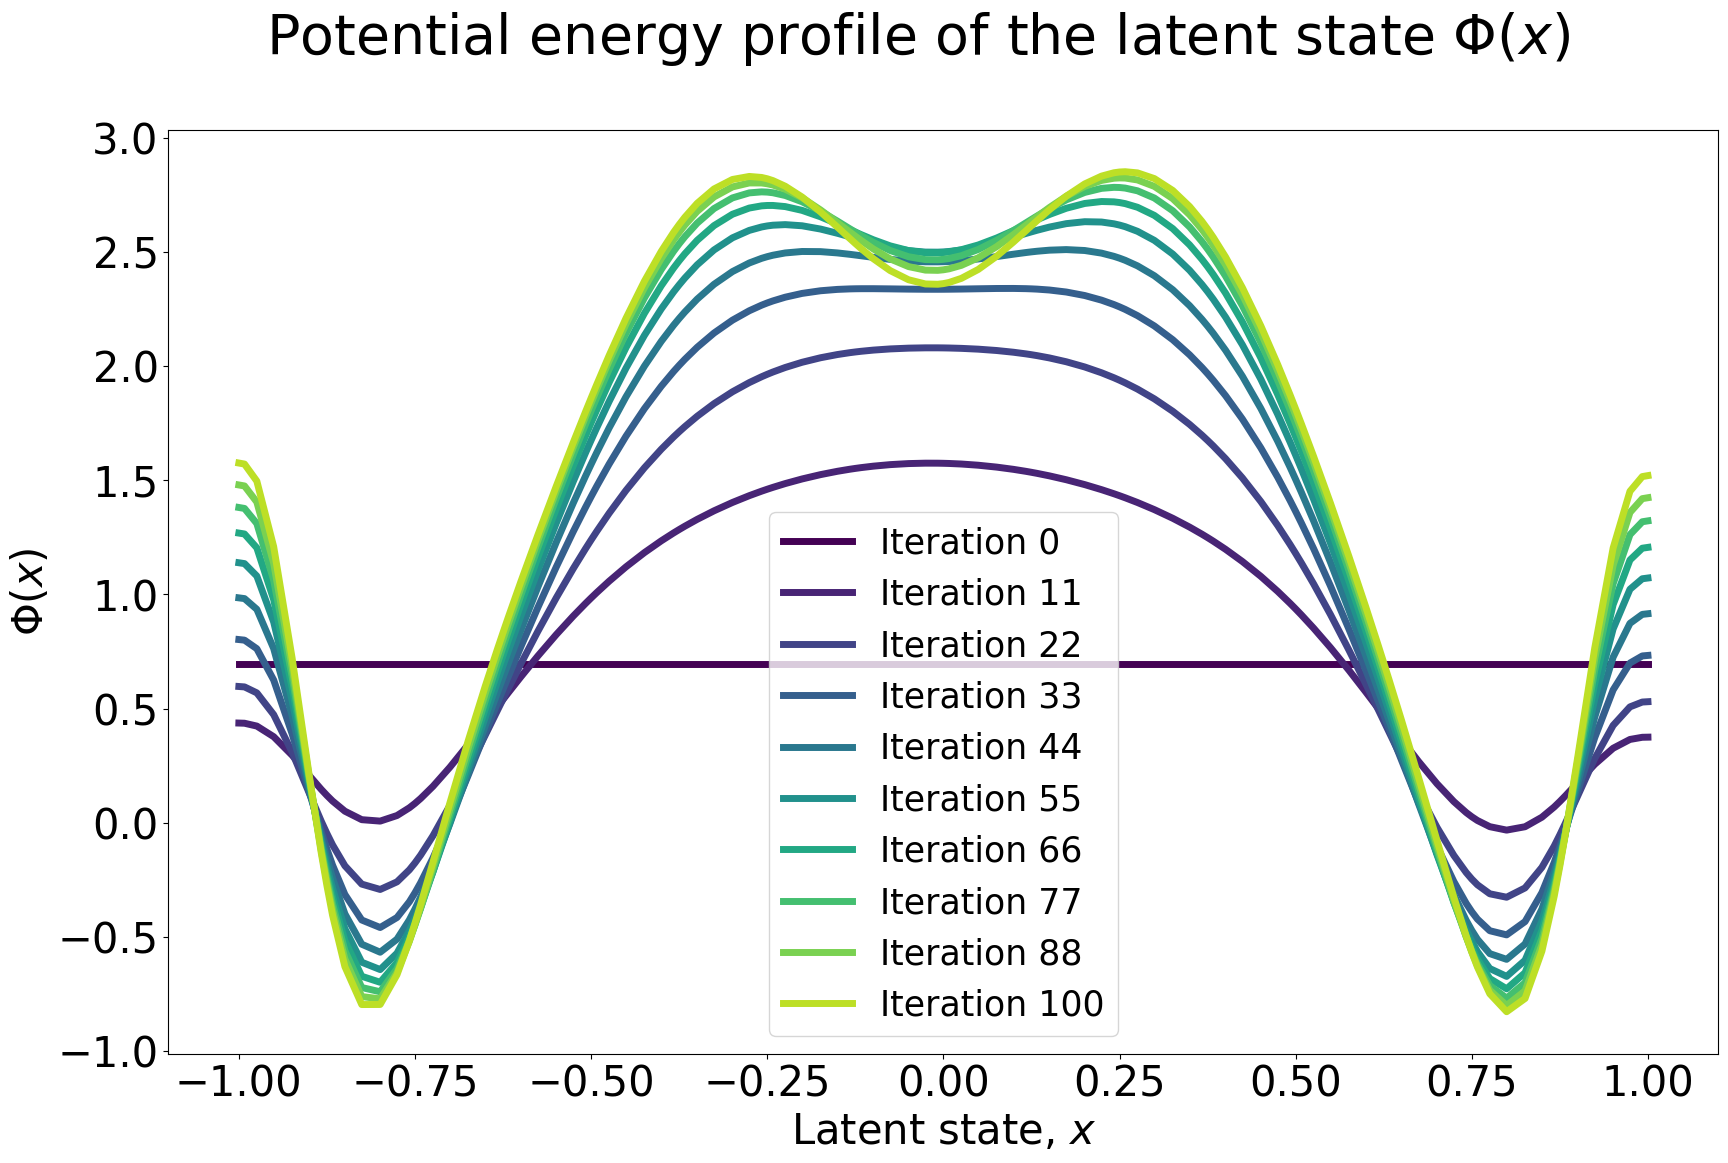

In [ ]:
# Define the path to the pickle file

# folders for plots and general parameters


new_plots_dir = "plot/final_poster/"
if not os.path.exists(new_plots_dir):
    os.makedirs(new_plots_dir)

plot_ext = ".pdf"

name_simul_list = ["Jp1_65"] # ["Jp1_60", "Jp1_65", "Jp1_7"]

n_trials = 50
number_of_iterations = 100
neur_to_keep = 5 # number of neurons used in the run
change_neurons_list = [neur_to_keep*4] # [neur_to_keep*0,neur_to_keep*2,neur_to_keep*4, neur_to_keep*6, neur_to_keep*8, neur_to_keep*10]
# call the dictionary with the data 
poster_plots_dict = poster_last_iteration_data(dict_run, name_simul_list, change_neurons_list)

# do the loop to save the plots in the right folder for the final version of the poster
for name_simul in name_simul_list:
    for what_to_plot in ["peqs"]: # ["peqs", "p0s"]
        for c, change_neuron in enumerate(change_neurons_list):
            plot_run
            #plot_run = new_plots_dir + f"{name_simul}/"
            if not os.path.exists(plot_run):
                os.makedirs(plot_run)
            em_fitting = poster_plots_dict[name_simul]
            poster_plot_long_run_main_results(name_simul, what_to_plot, plot_run, em_fitting, number_of_iterations, c, neur_to_keep, n_trials, plot_ext)

# Long run plots

In [77]:
### FUNCTION TO PLOT LONG RUNS 

# FUNCTION "plot_main_results" to plot the main results

def plot_long_run_main_results(name_simul, plot_run, em_fitting, change_neuron, neur_to_keep, n_trials, number_of_iterations, loop, plot_ext):
    latent_space = np.array([-1., -0.99198376, -0.97448126, -0.9505812,  -0.9244188,  -0.90051874,
    -0.88301624, -0.875,      -0.86698376, -0.84948126, -0.8255812,  -0.7994188,
    -0.77551874, -0.75801624, -0.75,       -0.74198376, -0.72448126, -0.7005812,
    -0.6744188,  -0.65051874, -0.63301624, -0.625,      -0.61698376, -0.59948126,
    -0.5755812,  -0.5494188,  -0.52551874, -0.50801624, -0.5,        -0.49198376,
    -0.47448126, -0.4505812,  -0.4244188,  -0.40051874, -0.38301624, -0.375,
    -0.36698376, -0.34948126, -0.3255812,  -0.2994188,  -0.27551874, -0.25801624,
    -0.25,       -0.24198376, -0.22448126, -0.2005812,  -0.1744188,  -0.15051874,
    -0.13301624, -0.125,      -0.11698376, -0.09948126, -0.0755812,  -0.0494188,
    -0.02551874, -0.00801624,  0.,         0.00801624,  0.02551874,  0.0494188,
     0.0755812,   0.09948126,  0.11698376,  0.125,       0.13301624,  0.15051874,
     0.1744188,   0.2005812,   0.22448126,  0.24198376,  0.25,        0.25801624,
     0.27551874,  0.2994188,   0.3255812,   0.34948126,  0.36698376,  0.375,
     0.38301624,  0.40051874,  0.4244188,   0.4505812,   0.47448126,  0.49198376,
     0.5,         0.50801624,  0.52551874,  0.5494188,   0.5755812,   0.59948126,
     0.61698376,  0.625,       0.63301624,  0.65051874,  0.6744188,   0.7005812,
     0.72448126,  0.74198376,  0.75,        0.75801624,  0.77551874,  0.7994188,
     0.8255812,   0.84948126,  0.86698376,  0.875,       0.88301624,  0.90051874,
     0.9244188,   0.9505812,   0.97448126,  0.99198376,  1.        ])
    number_of_displayed_iterations = 10
    display_iteration = np.linspace(0,number_of_iterations,number_of_displayed_iterations).astype('int')

    # Create a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, number_of_displayed_iterations+1))

    # create a coherence level folder ->  lower_coherence
    logliks = em_fitting[f"iter_change_neur{0}"]['logliks'][loop*number_of_iterations:loop*number_of_iterations+number_of_iterations+1]
    fitted_peqs = em_fitting[f"iter_change_neur{0}"]['peqs'][:,loop*number_of_iterations:loop*number_of_iterations+number_of_iterations+1]
    prob_p0 = em_fitting[f"iter_change_neur{0}"]['p0s'][:,loop*number_of_iterations:loop*number_of_iterations+number_of_iterations+1]
    diffusion_D = em_fitting[f"iter_change_neur{0}"]['Ds'][loop*number_of_iterations:loop*number_of_iterations+number_of_iterations+1]


    # plot the fitted parameters
    fig=plt.figure(figsize=(20,12))
    fig.suptitle(f'{name_simul}_neurons={neur_to_keep*2}, change_neuron_index={change_neuron}, trials={n_trials*2}, iter=[{loop*number_of_iterations}, {loop*number_of_iterations+number_of_iterations+1}]', fontsize=20)
    gs=gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5)

    ax = plt.subplot(gs[0])
    ax.set_title(r'Cost function, $-\log\mathscr{L}$', fontsize=14)
    plt.xlabel('Iteration number', fontsize=14)
    plt.ylabel(r'$-\log\mathscr{L}$', fontsize=14)
    ax.plot(np.array(range(number_of_iterations+1)),logliks)

    ax = plt.subplot(gs[1])
    ax.set_title(r'Fitted potentials', fontsize=14)
    plt.xlabel(r'Latent state, $x$', fontsize=14)
    plt.ylabel(r'$Potential, \Phi(x)$', fontsize=14)
    for i,it in enumerate(display_iteration):
        plt.plot(latent_space,-np.log(fitted_peqs[:,it]),c=colors[i]) #label=f'Iteration {it}', 
    plt.legend()

    ax = plt.subplot(gs[2])
    ax.set_title(r'Fitted p0', fontsize=14)
    plt.xlabel(r'Latent state, $x$', fontsize=14)
    plt.ylabel(r'$p0(x)$', fontsize=14)
    for i,it in enumerate(display_iteration):
        plt.plot(latent_space,prob_p0[:,it], c=colors[i]) #label=f'Iteration {it}', 
    plt.legend()

    ax = plt.subplot(gs[3])
    ax.set_title(r'Fitted D', fontsize=14)
    plt.xlabel('Iteration number', fontsize=14)
    plt.ylabel(r'$D(x)$', fontsize=14)
    plt.plot(np.array(range(number_of_iterations+1)),diffusion_D)

    plt.show()
    fig.savefig(plot_run + f'/{name_simul}_long_run_iters[{loop*number_of_iterations}, {loop*number_of_iterations+number_of_iterations+1}]_fitted_params_change_neur={change_neuron}_N={neur_to_keep*2}_number_of_iterations={number_of_iterations}_trials={n_trials*2}{plot_ext}')



In [78]:
# Define the path to the pickle file

# folders for plots and general parameters
plots_dir = "plot/new_poster/"
plot_ext = ".jpg"


#name_simul = "Jp1_60" # "Jp1_60", "Jp1_65", "Jp1_7", "Jp1_75", "Jp1_80"
name_simul_list = ["Jp1_60", "Jp1_65", "Jp1_7"]

n_trials = 50
number_of_iterations = 100
neur_to_keep = 5 # number of neurons used in the run
change_neurons_list = [neur_to_keep*0,neur_to_keep*2,neur_to_keep*4, neur_to_keep*6, neur_to_keep*8, neur_to_keep*10]

dict_run = {}
for i, run in enumerate(name_simul_list):
    test_dir = f"long_run_dataset_{run}_start=7000_end=10000"
    pattern = os.path.join(plots_dir + test_dir, f'long_run_dict_em_*') #fitting_values_{run}_N=5_change_neur=[0]_trials=100_iter=1000*.pkl')
    print(pattern)
    pickle_files = glob.glob(pattern)
    print(pickle_files)
    dict_run[run] = []
    # Load each pickle file and store the data in a list
    for file_path in pickle_files:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            dict_run[run].append(data)

#Print the loaded data to verify
# for i, data in enumerate(dict_run.keys()):
#     print(f"Data from file {data}: {dict_run[data]}")

plot/new_poster/long_run_dataset_Jp1_60_start=7000_end=10000\long_run_dict_em_*
['plot/new_poster/long_run_dataset_Jp1_60_start=7000_end=10000\\long_run_dict_em_fitting_values_Jp1_60_N=5_change_neur=[0]_trials=100_iter=1000_20241102_122642.pkl']
plot/new_poster/long_run_dataset_Jp1_65_start=7000_end=10000\long_run_dict_em_*
['plot/new_poster/long_run_dataset_Jp1_65_start=7000_end=10000\\long_run_dict_em_fitting_values_Jp1_65_N=5_change_neur=[0]_trials=100_iter=1000_20241102_133054.pkl']
plot/new_poster/long_run_dataset_Jp1_7_start=7000_end=10000\long_run_dict_em_*
['plot/new_poster/long_run_dataset_Jp1_7_start=7000_end=10000\\long_run_dict_em_fitting_values_Jp1_7_N=5_change_neur=[0]_trials=100_iter=1000_20241031_180329.pkl']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


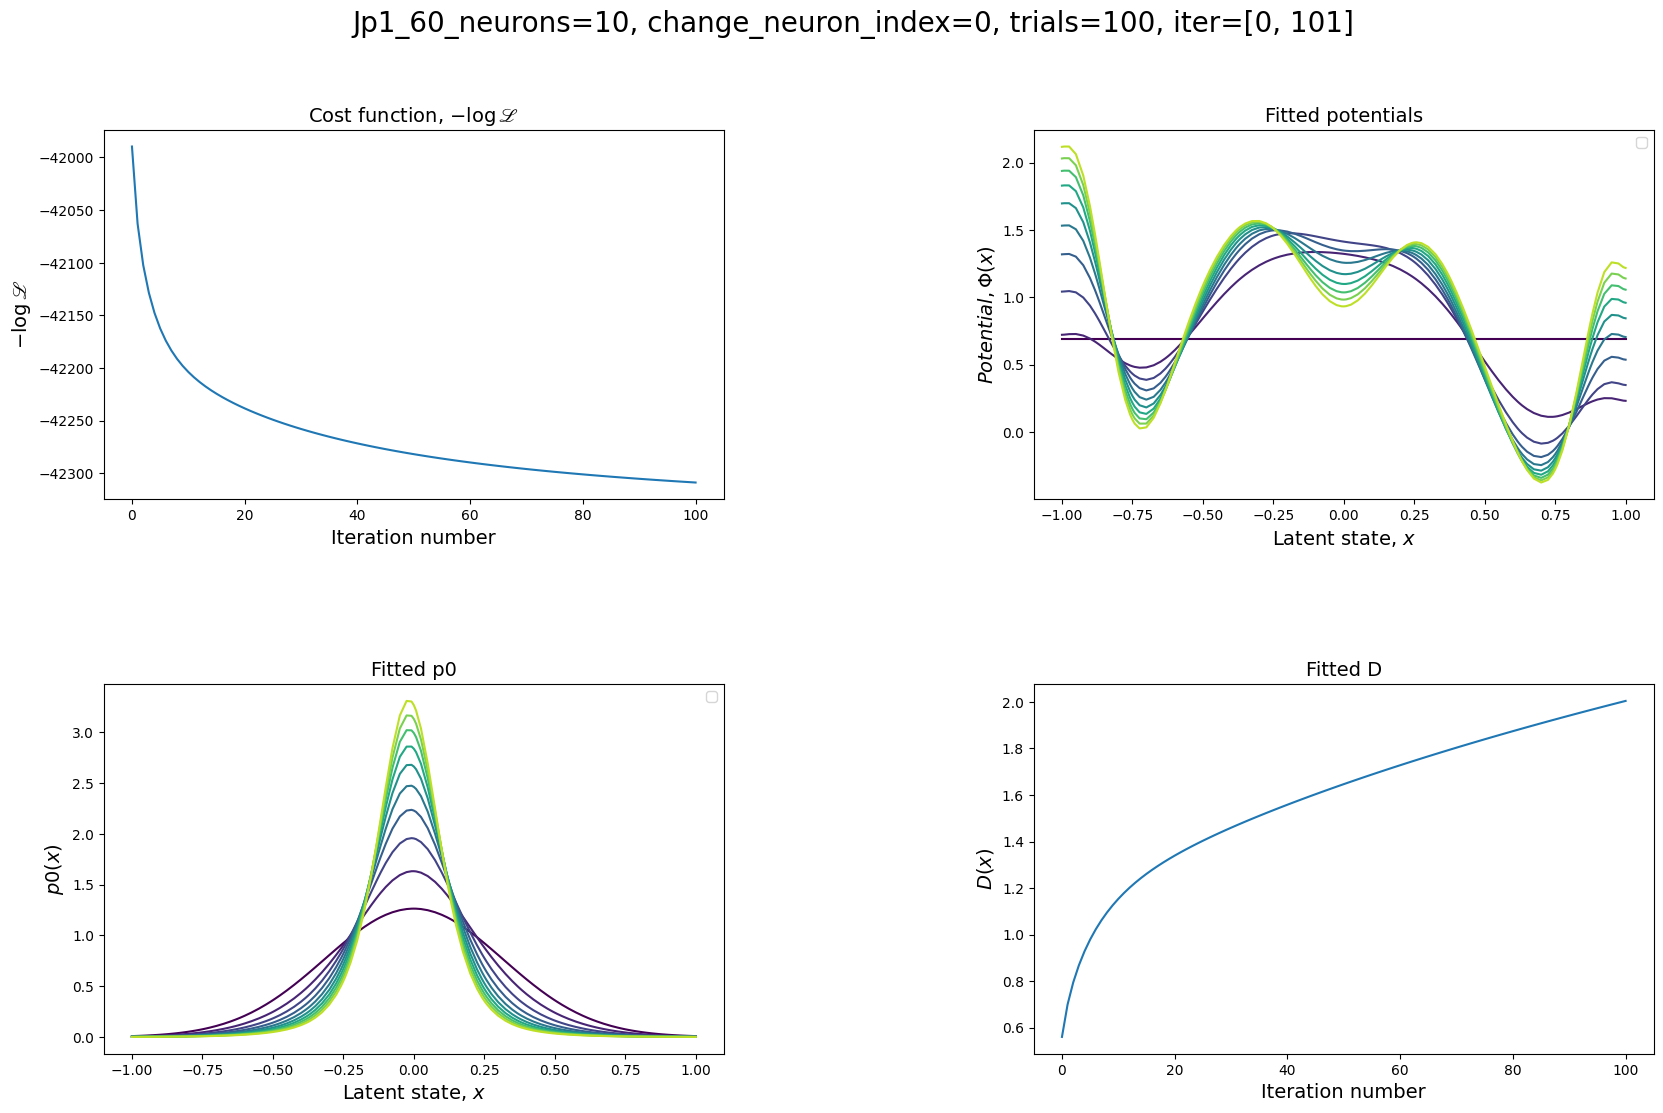

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


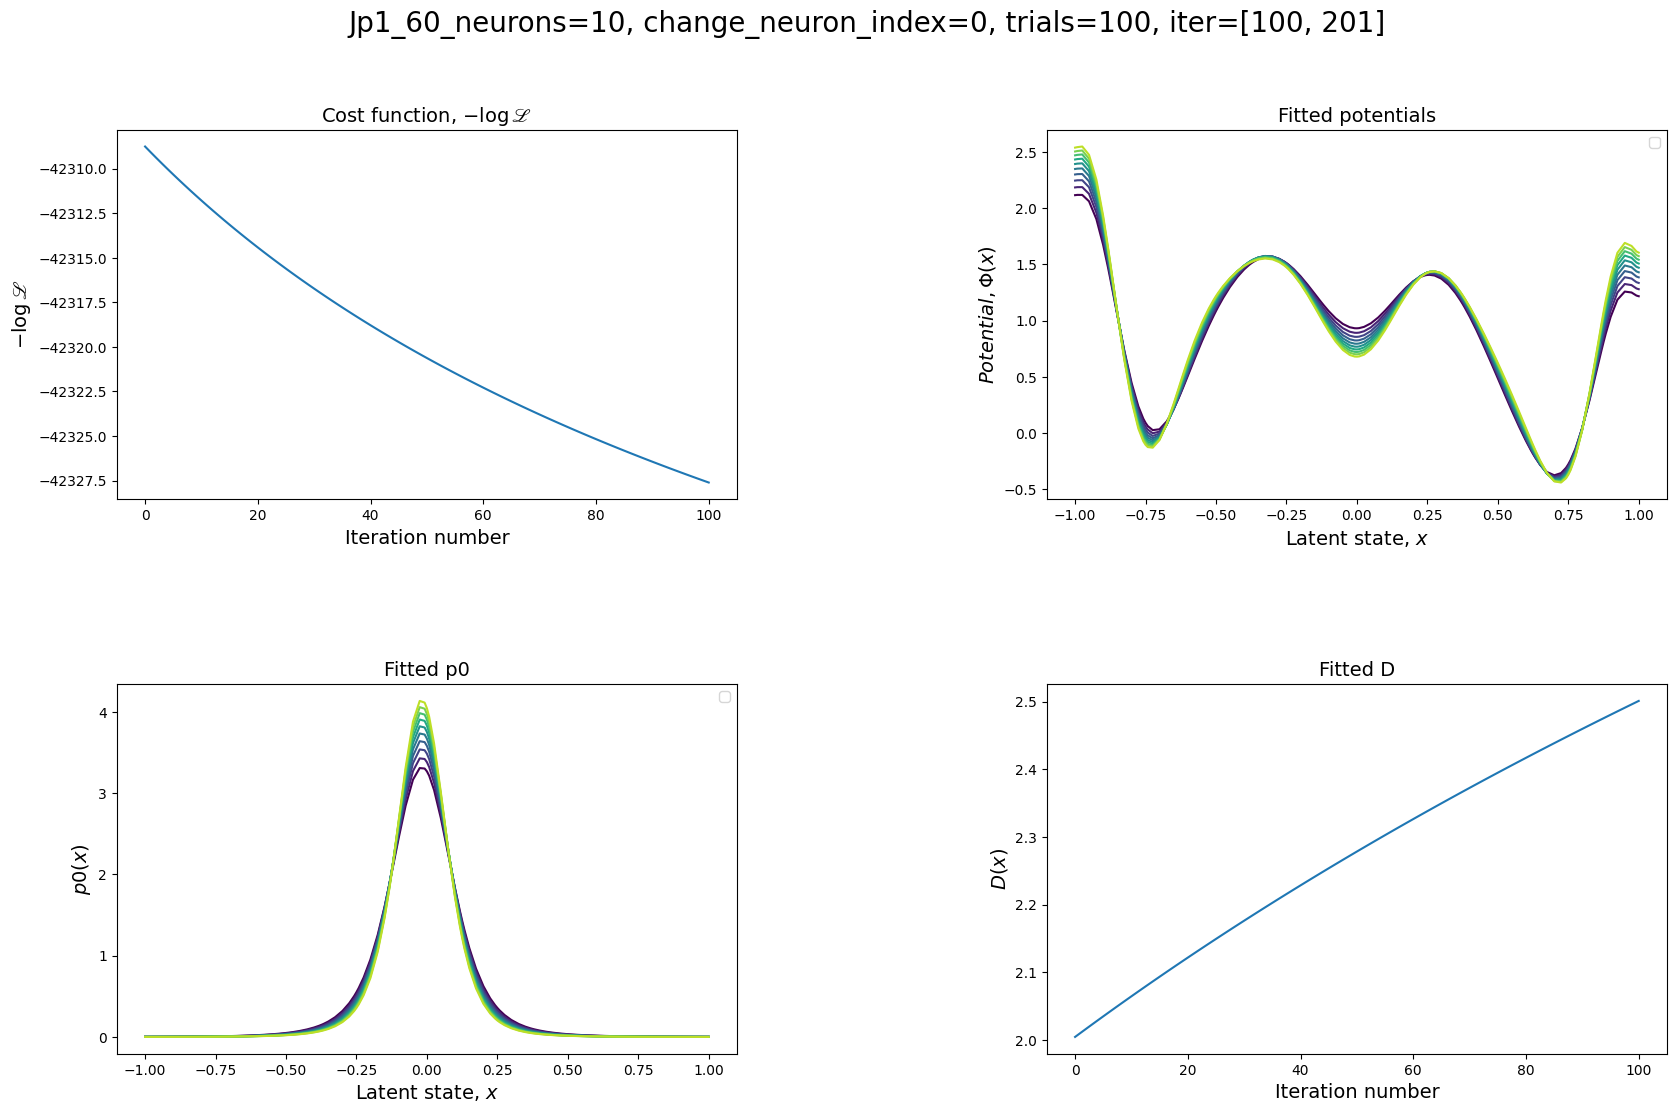

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


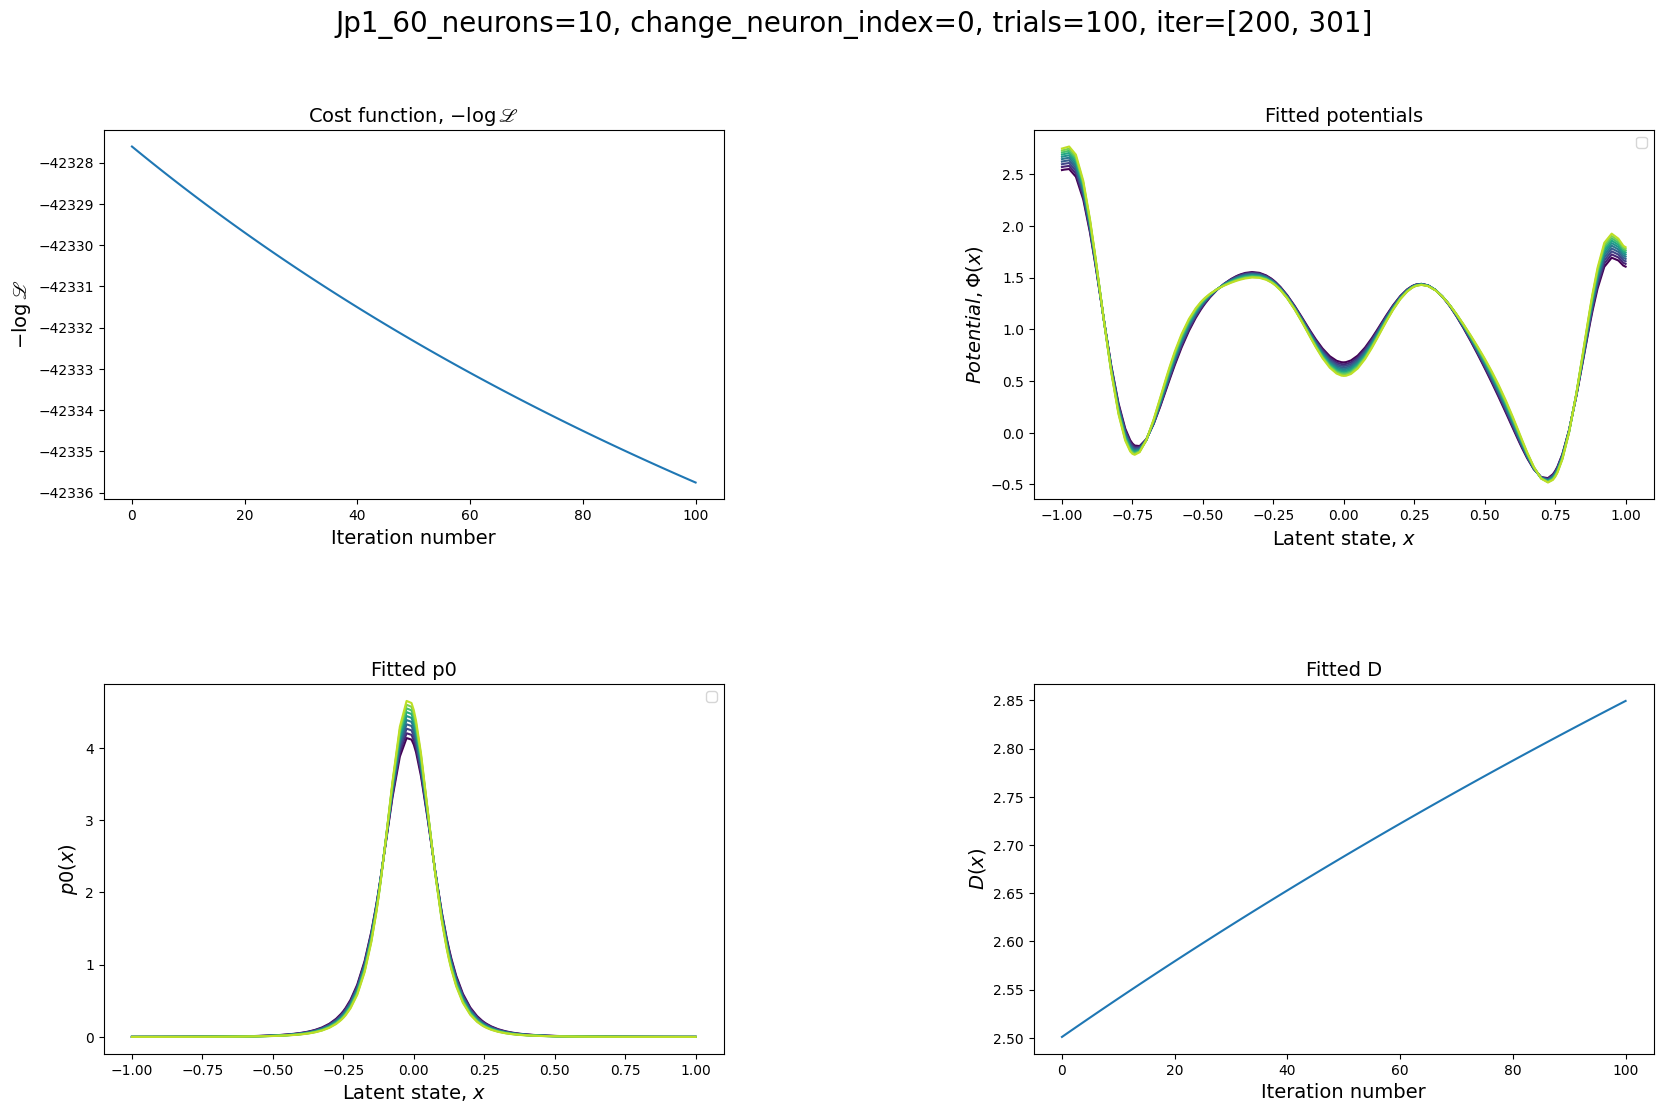

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


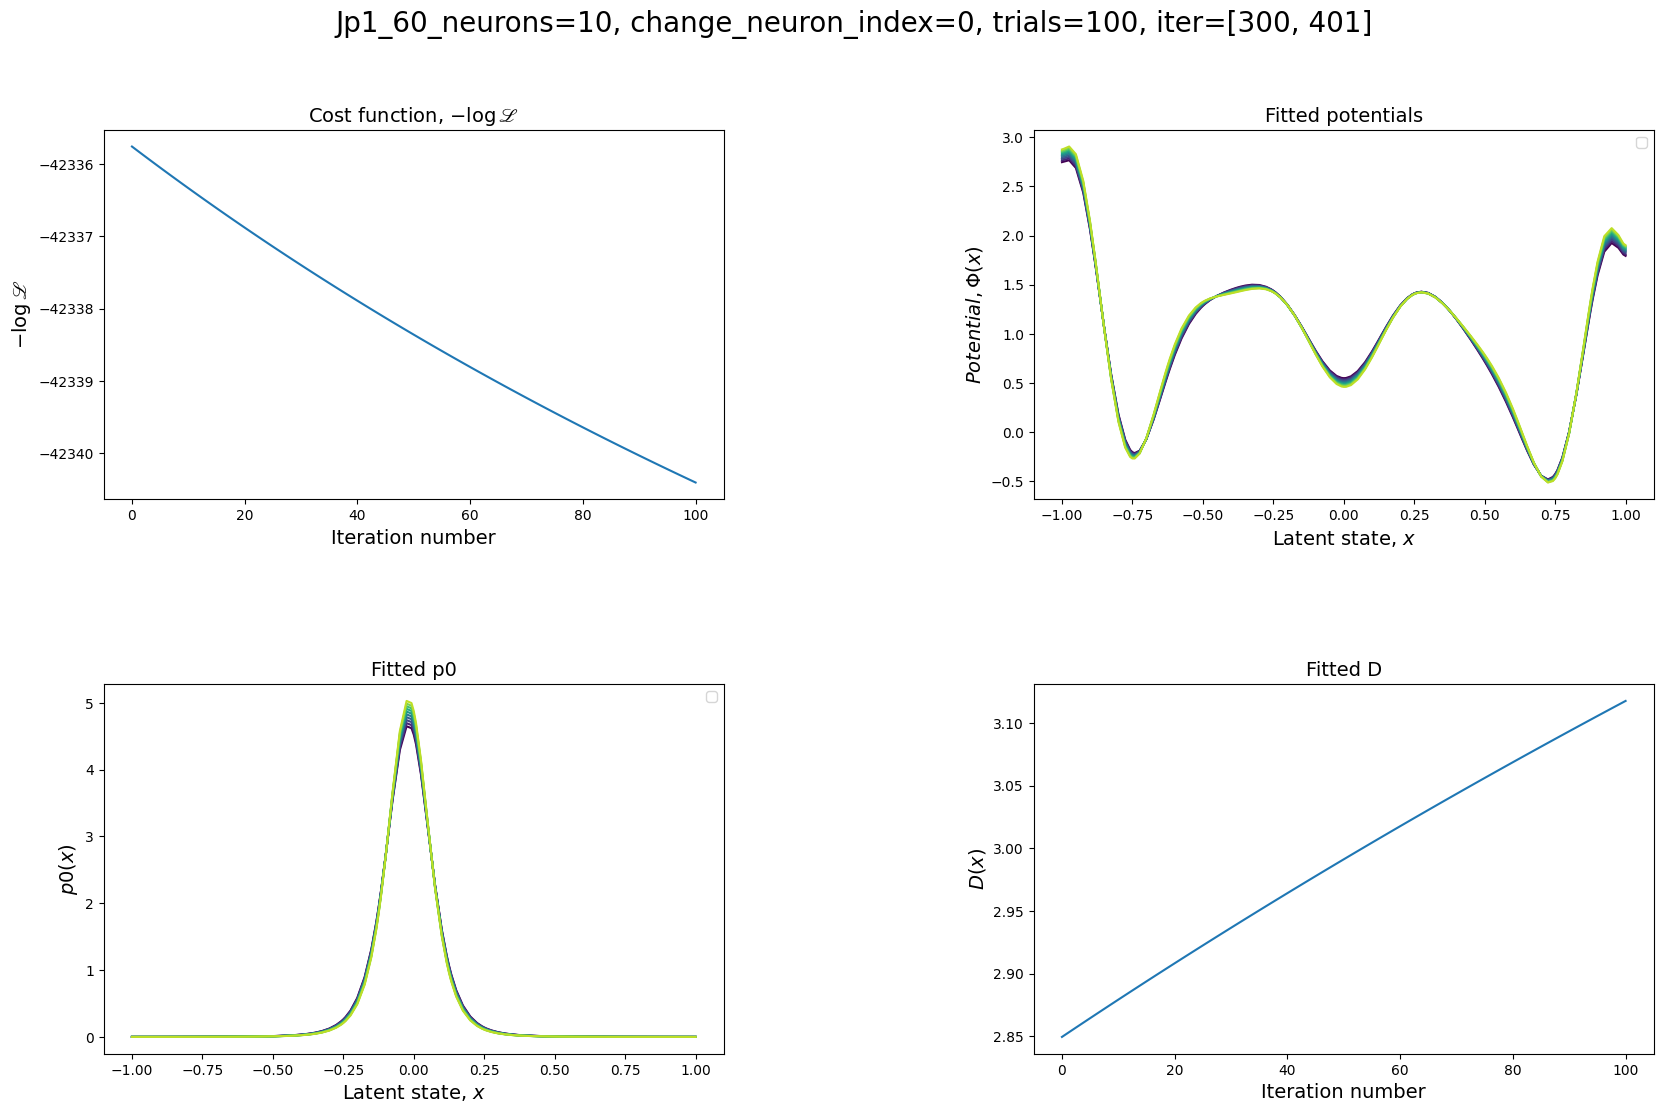

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


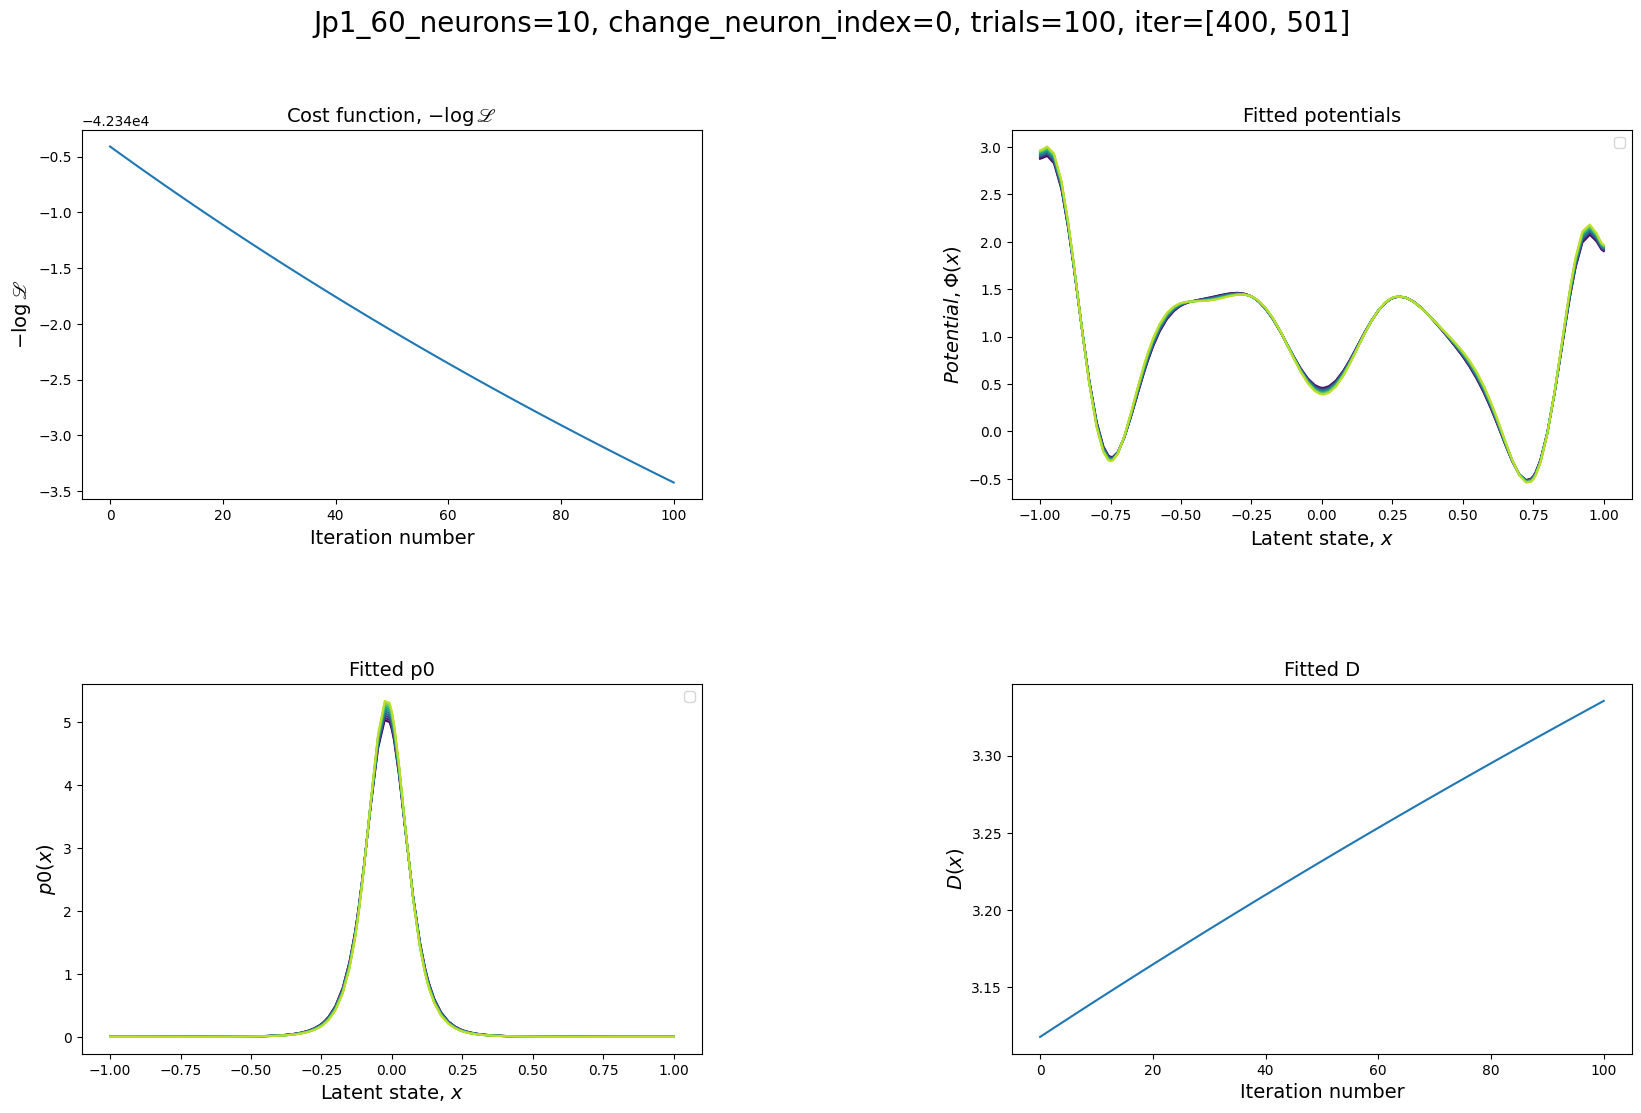

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


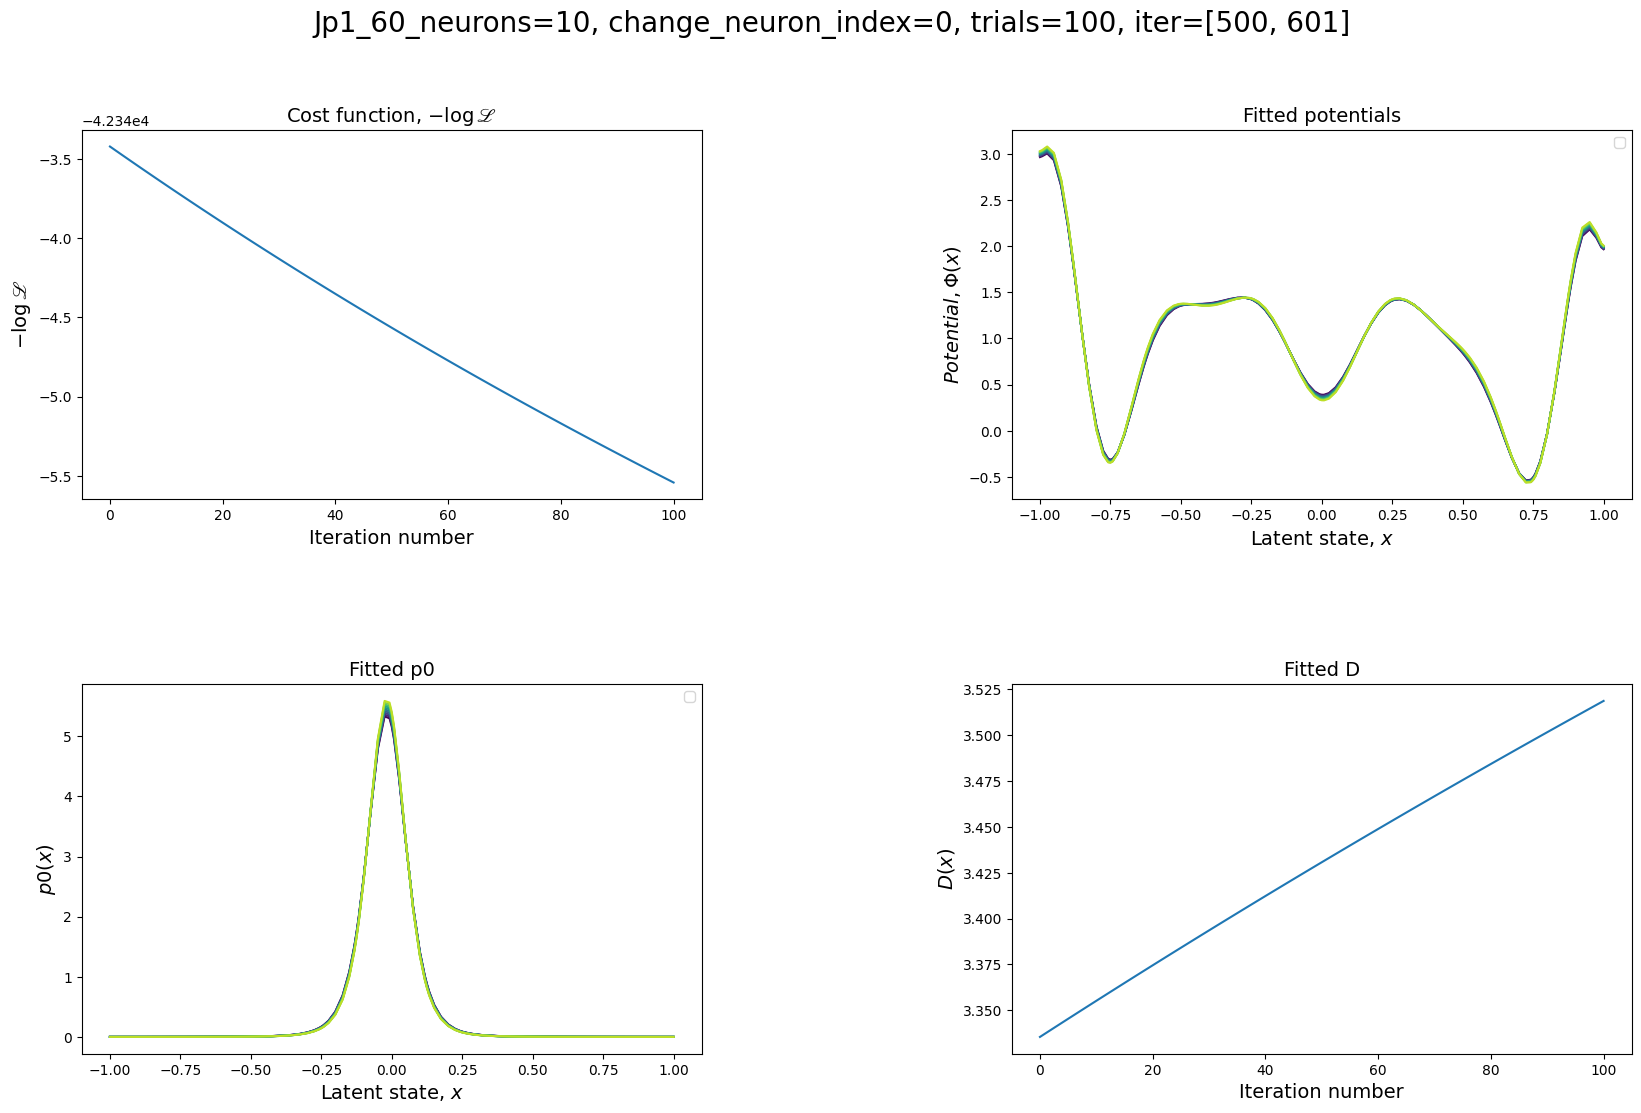

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


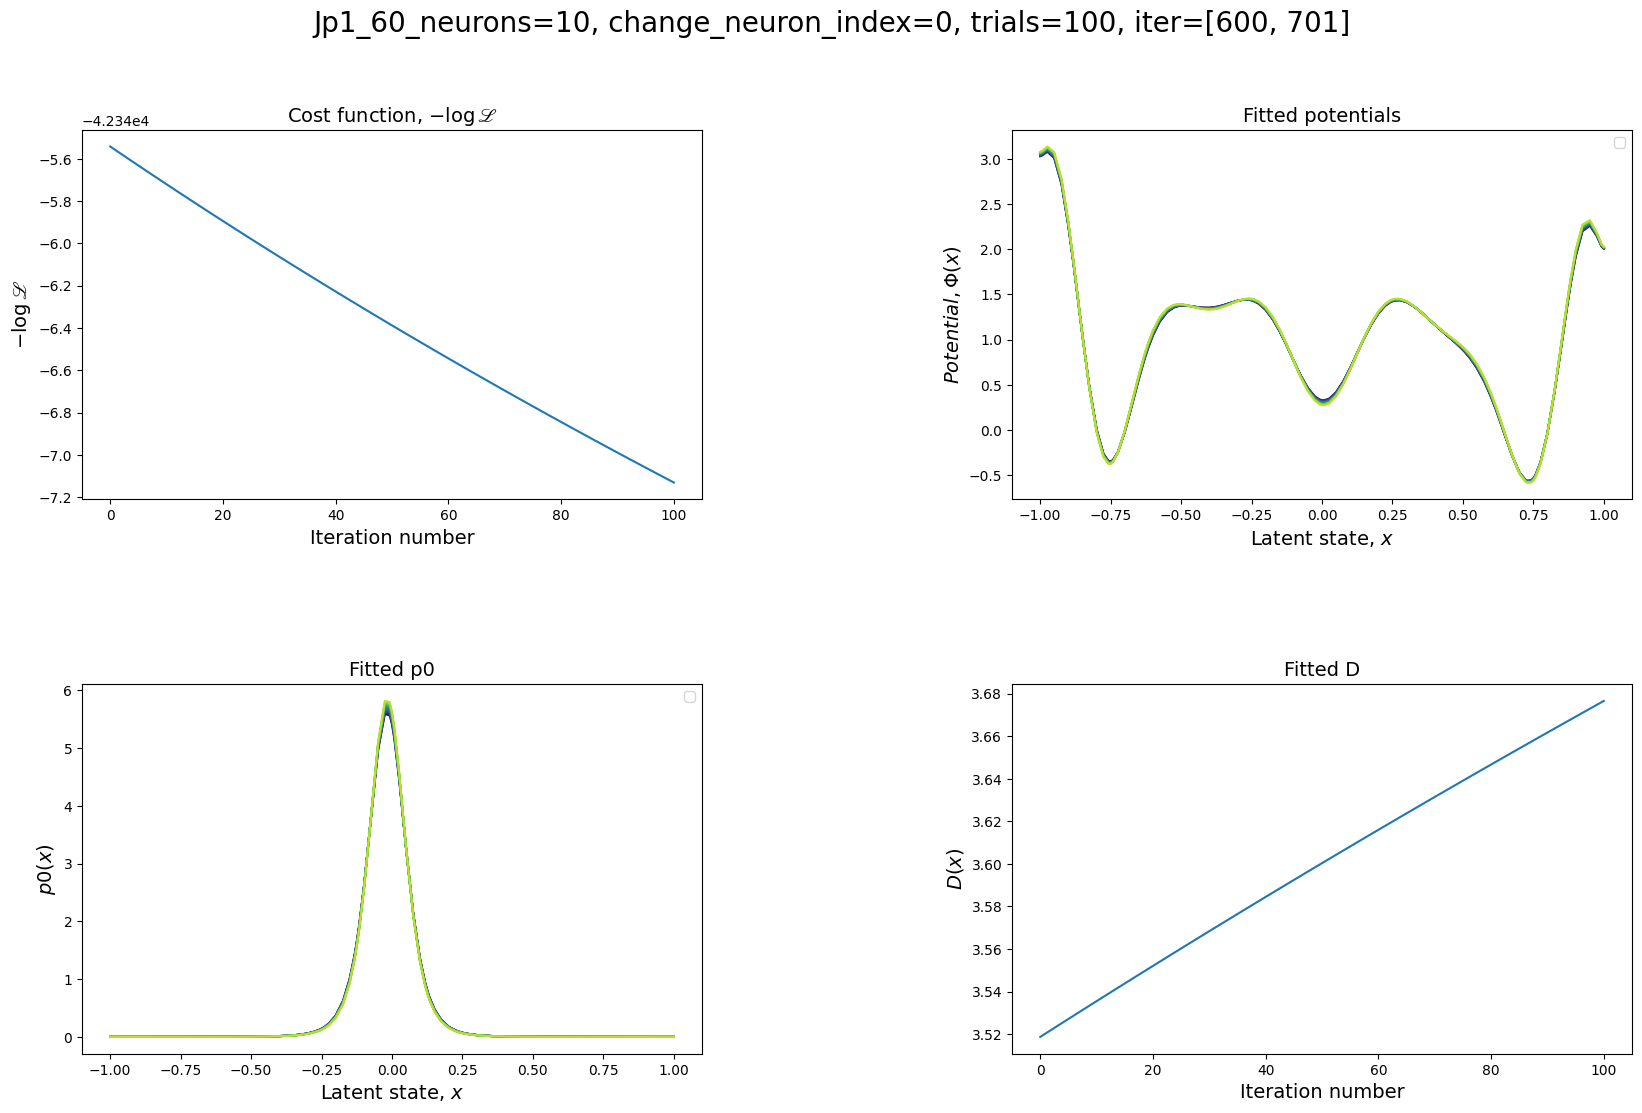

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


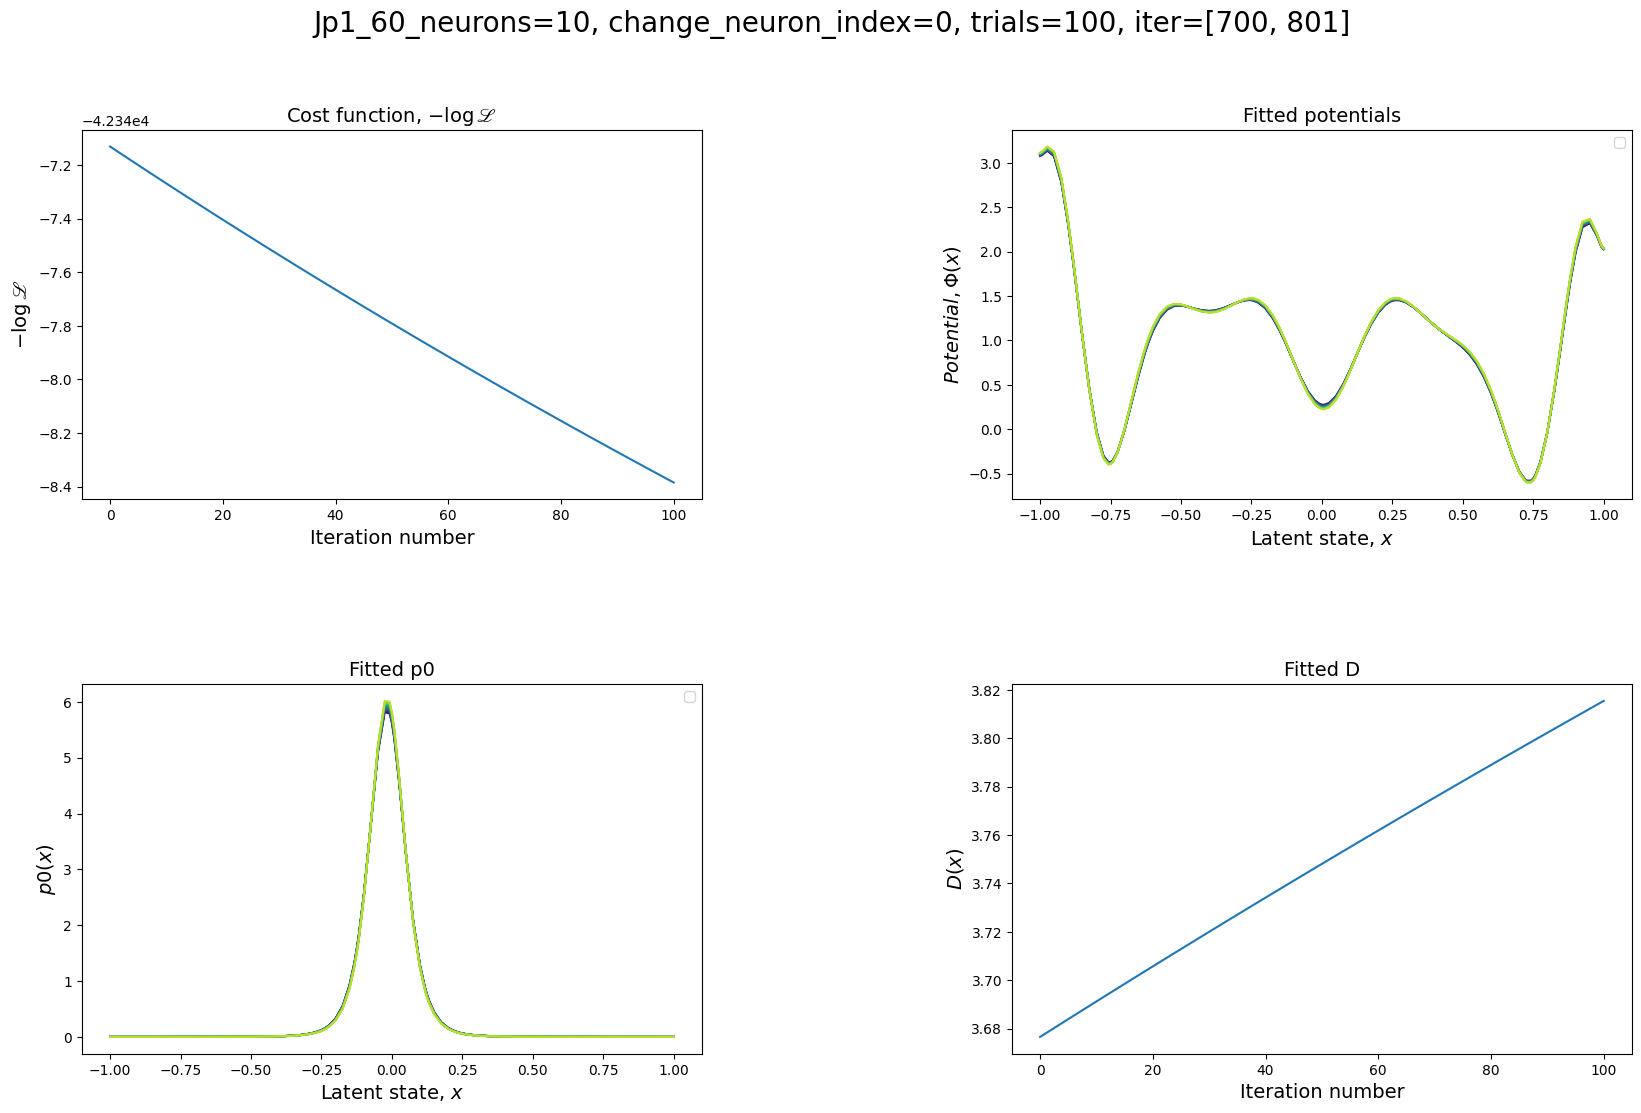

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


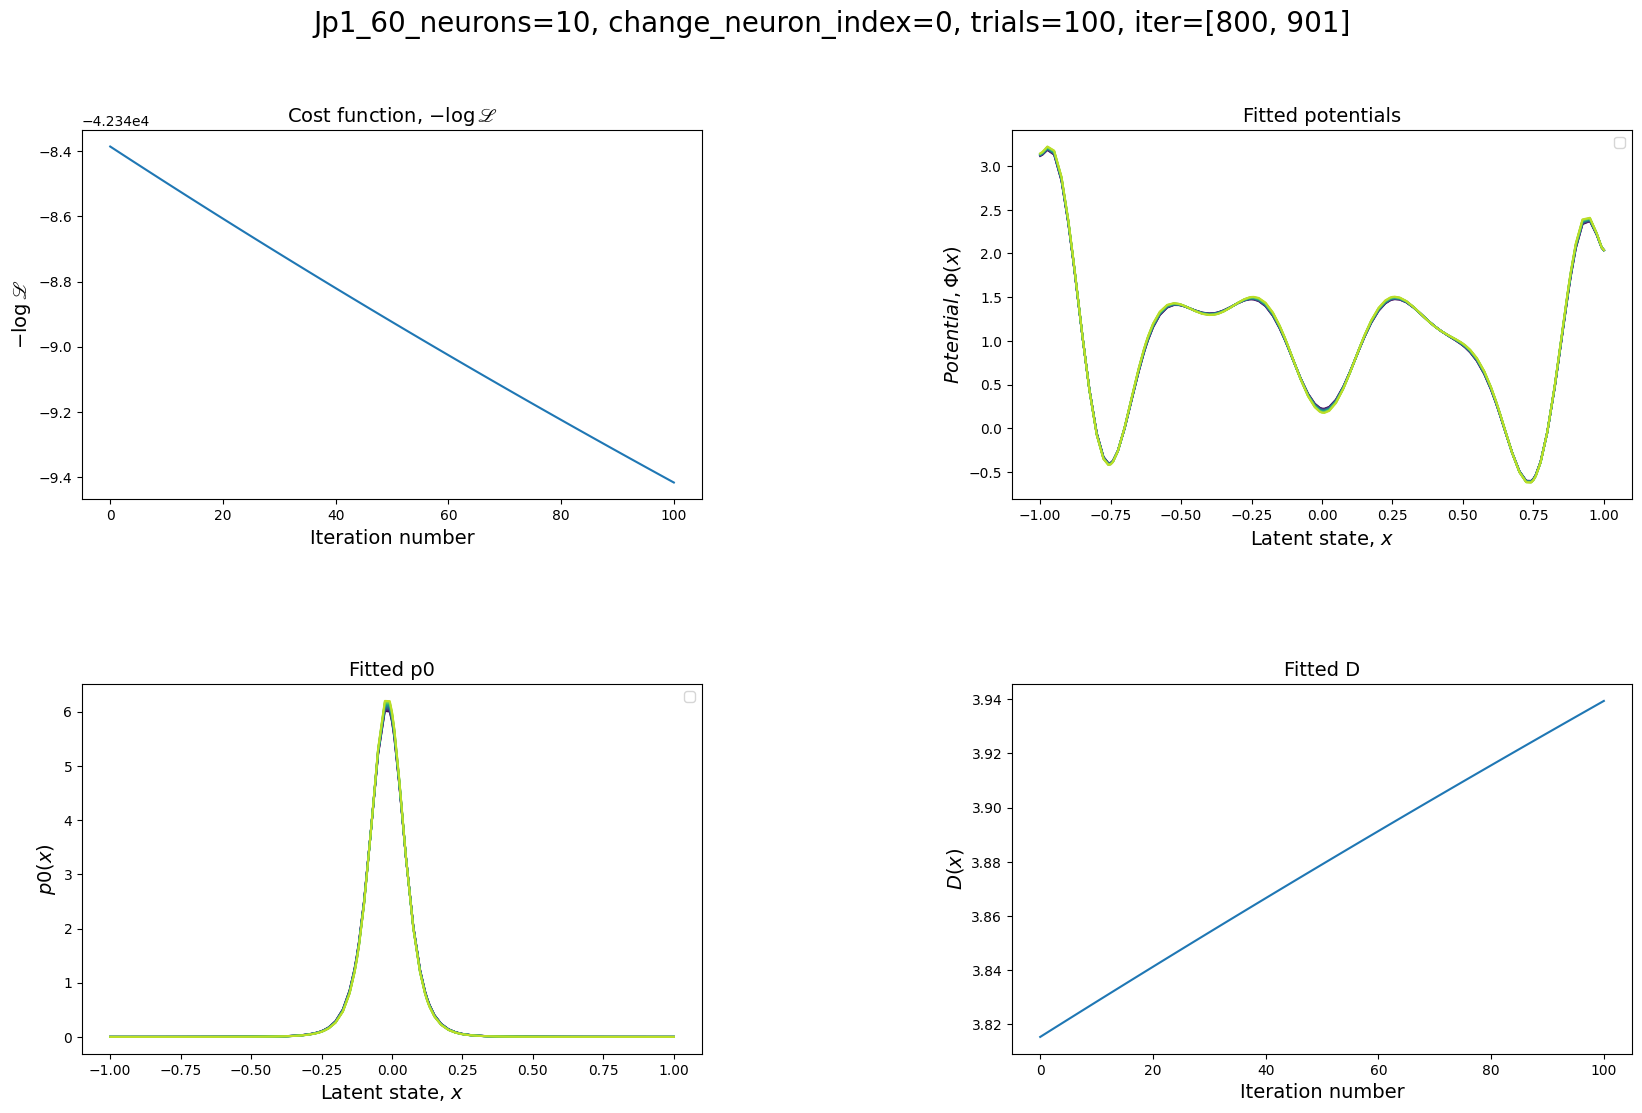

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


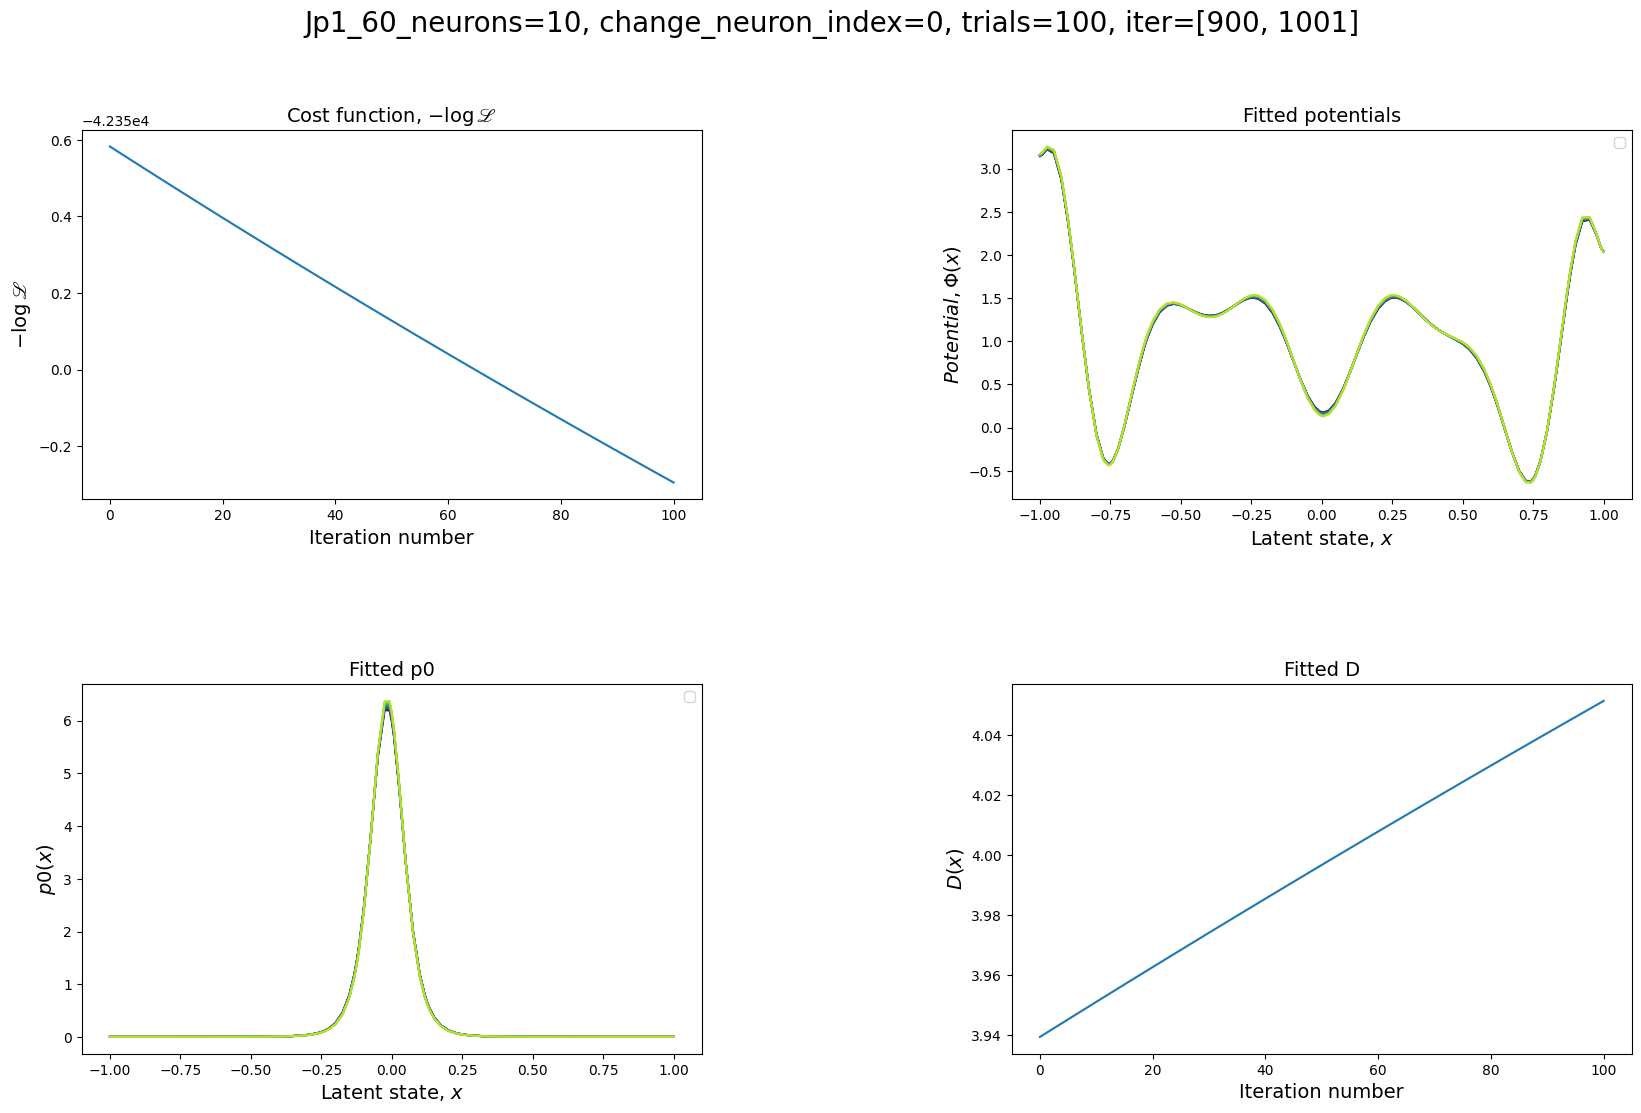

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


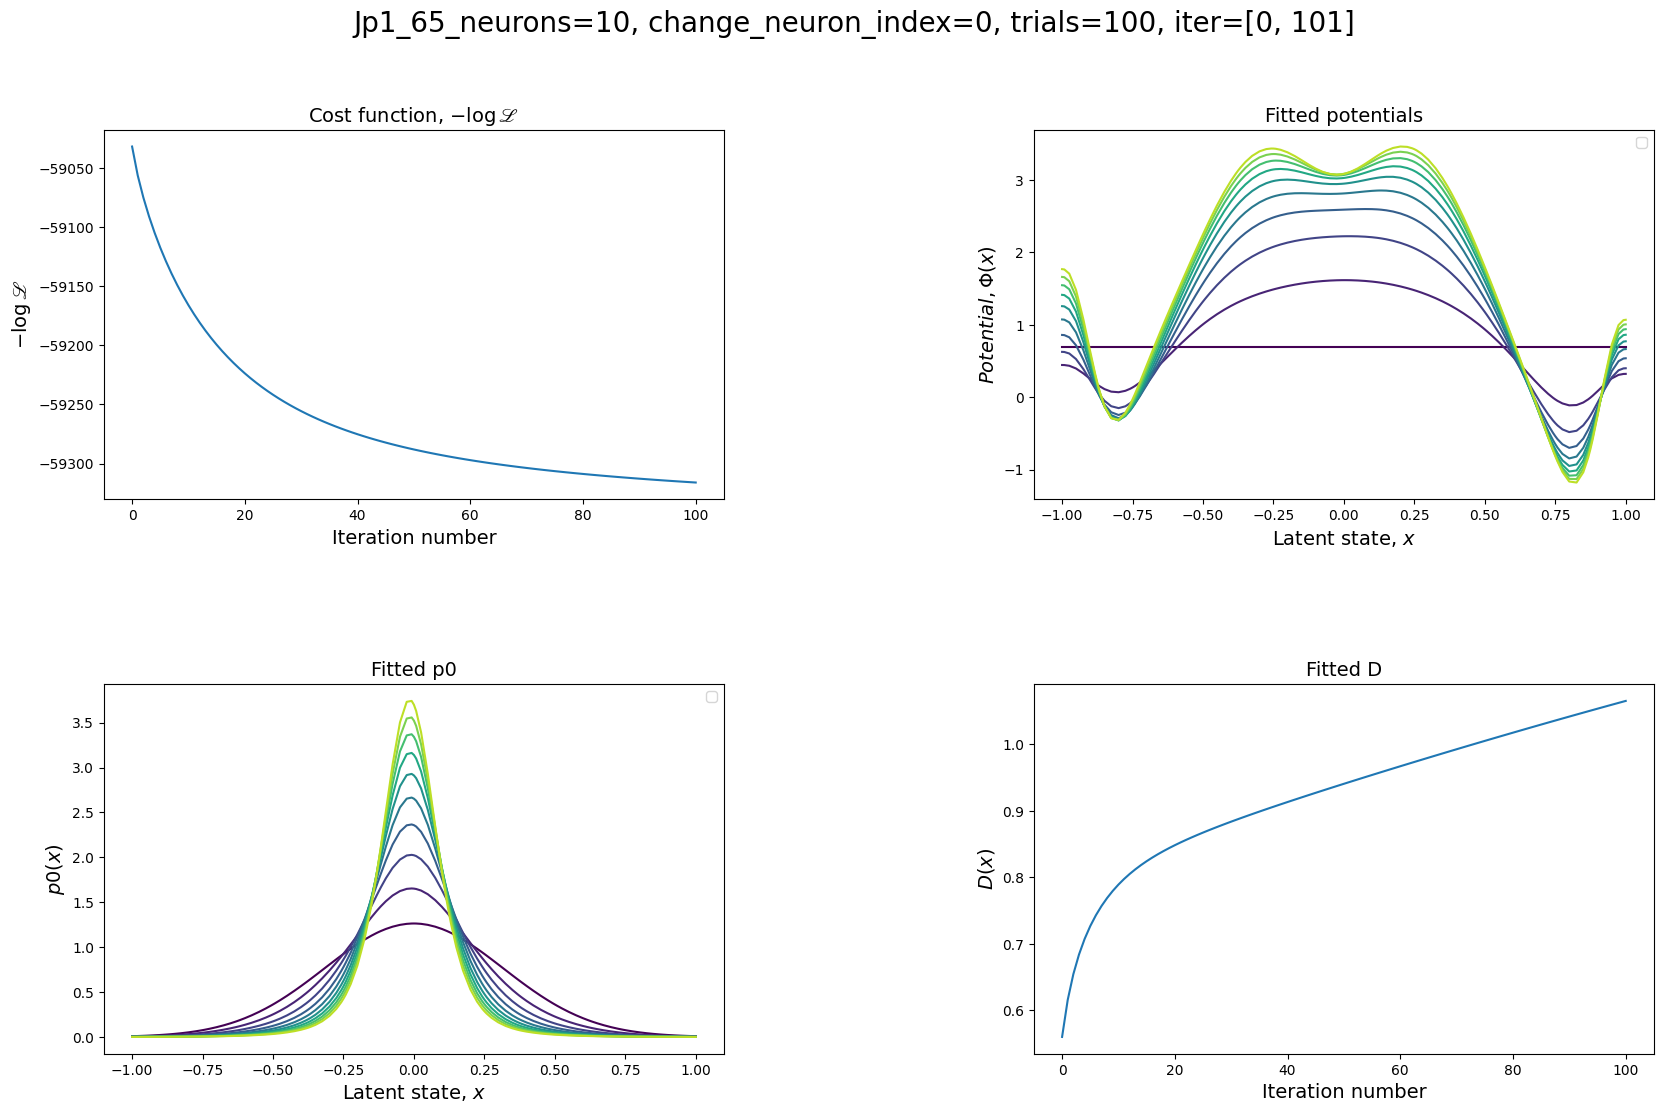

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


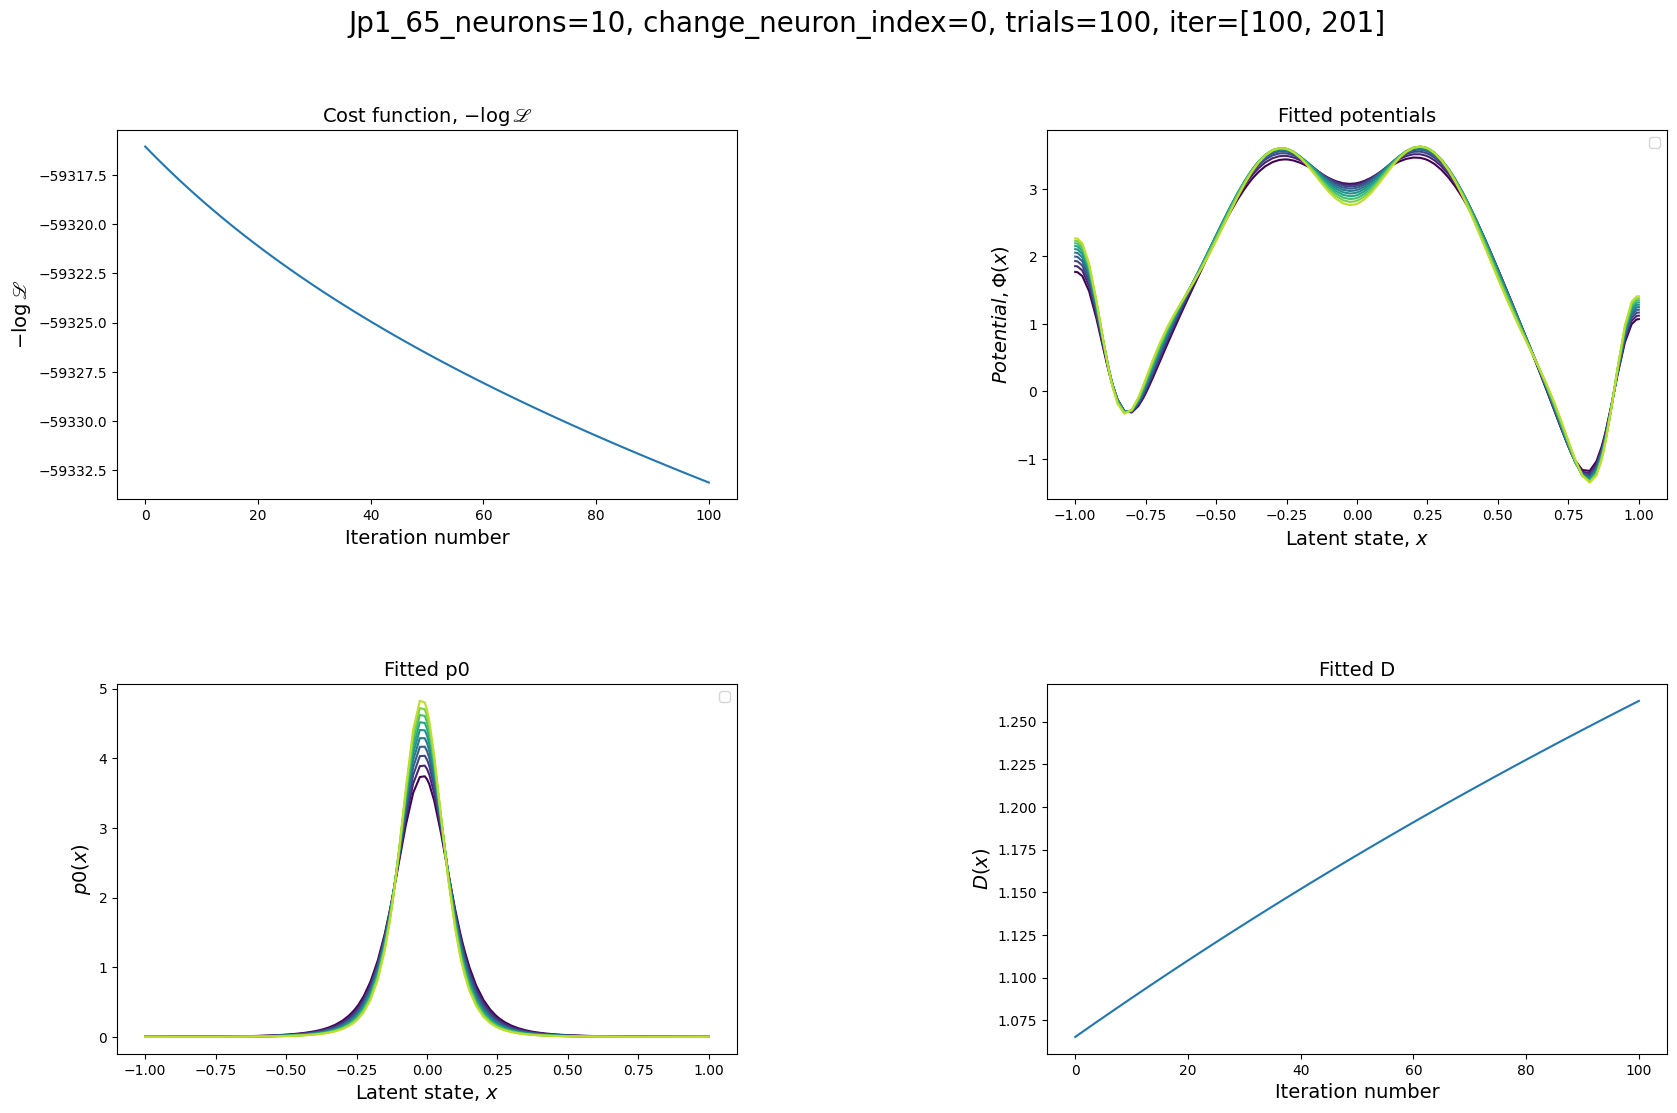

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


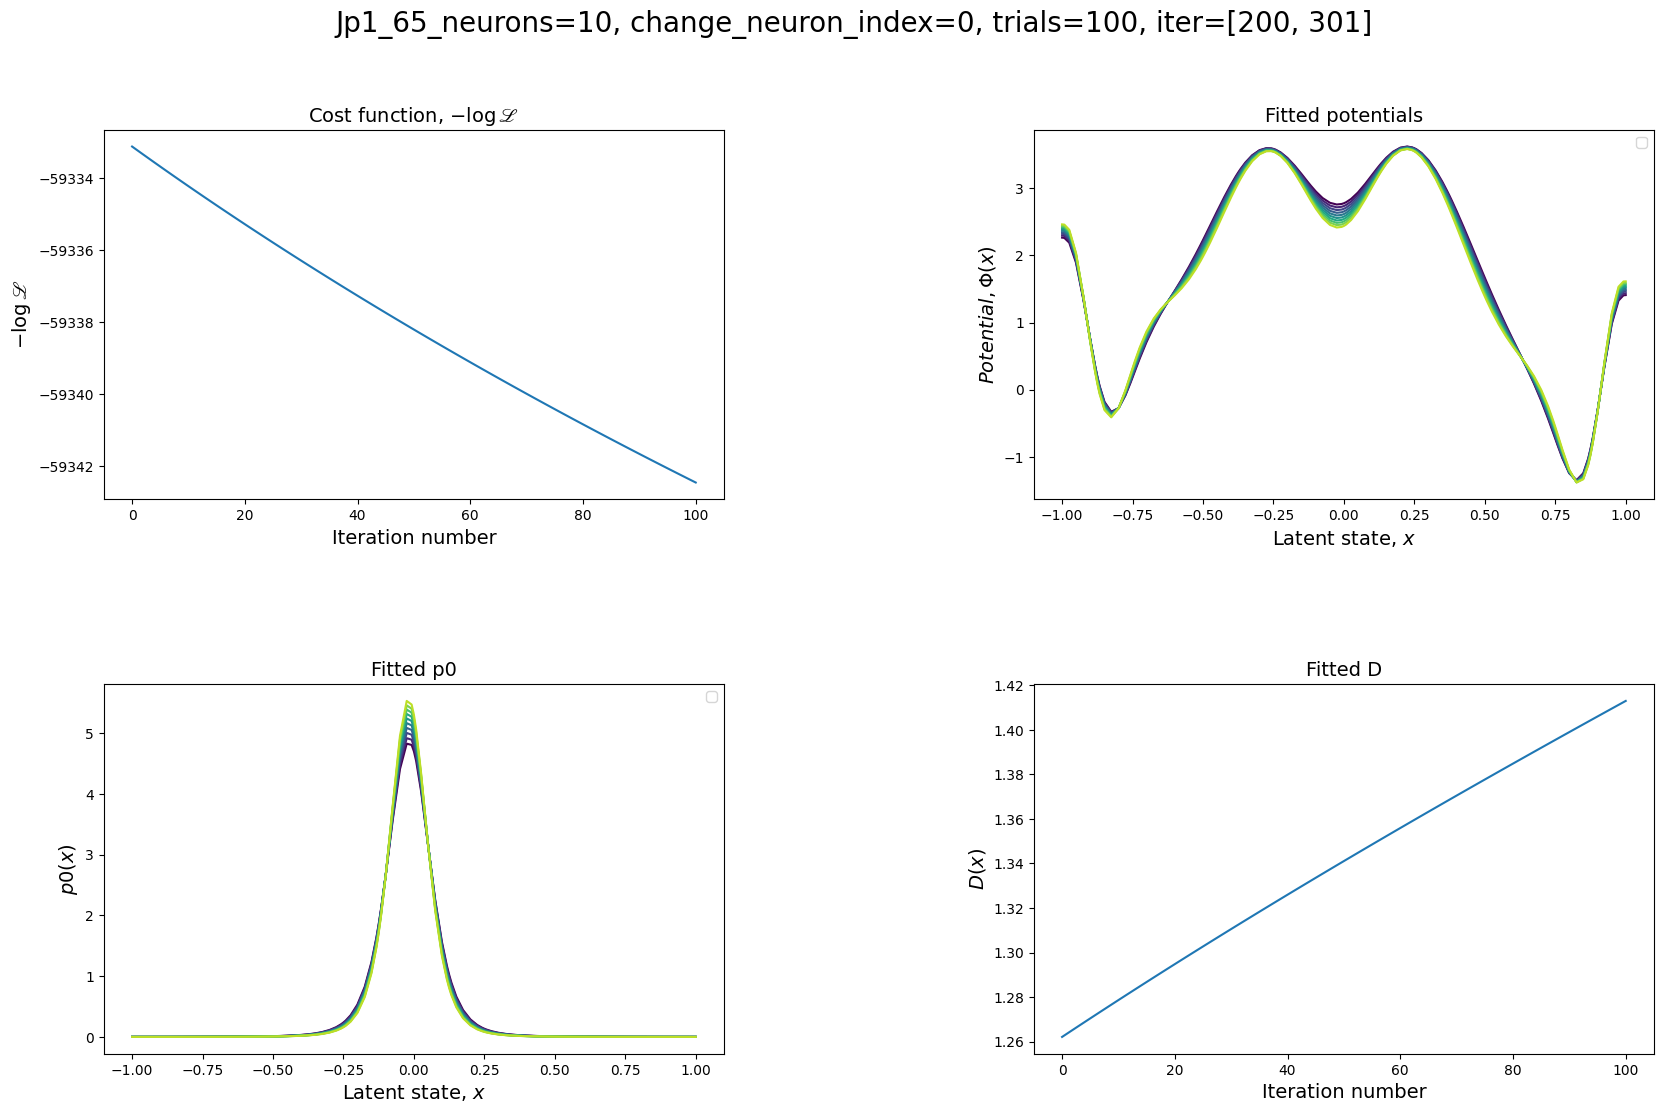

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


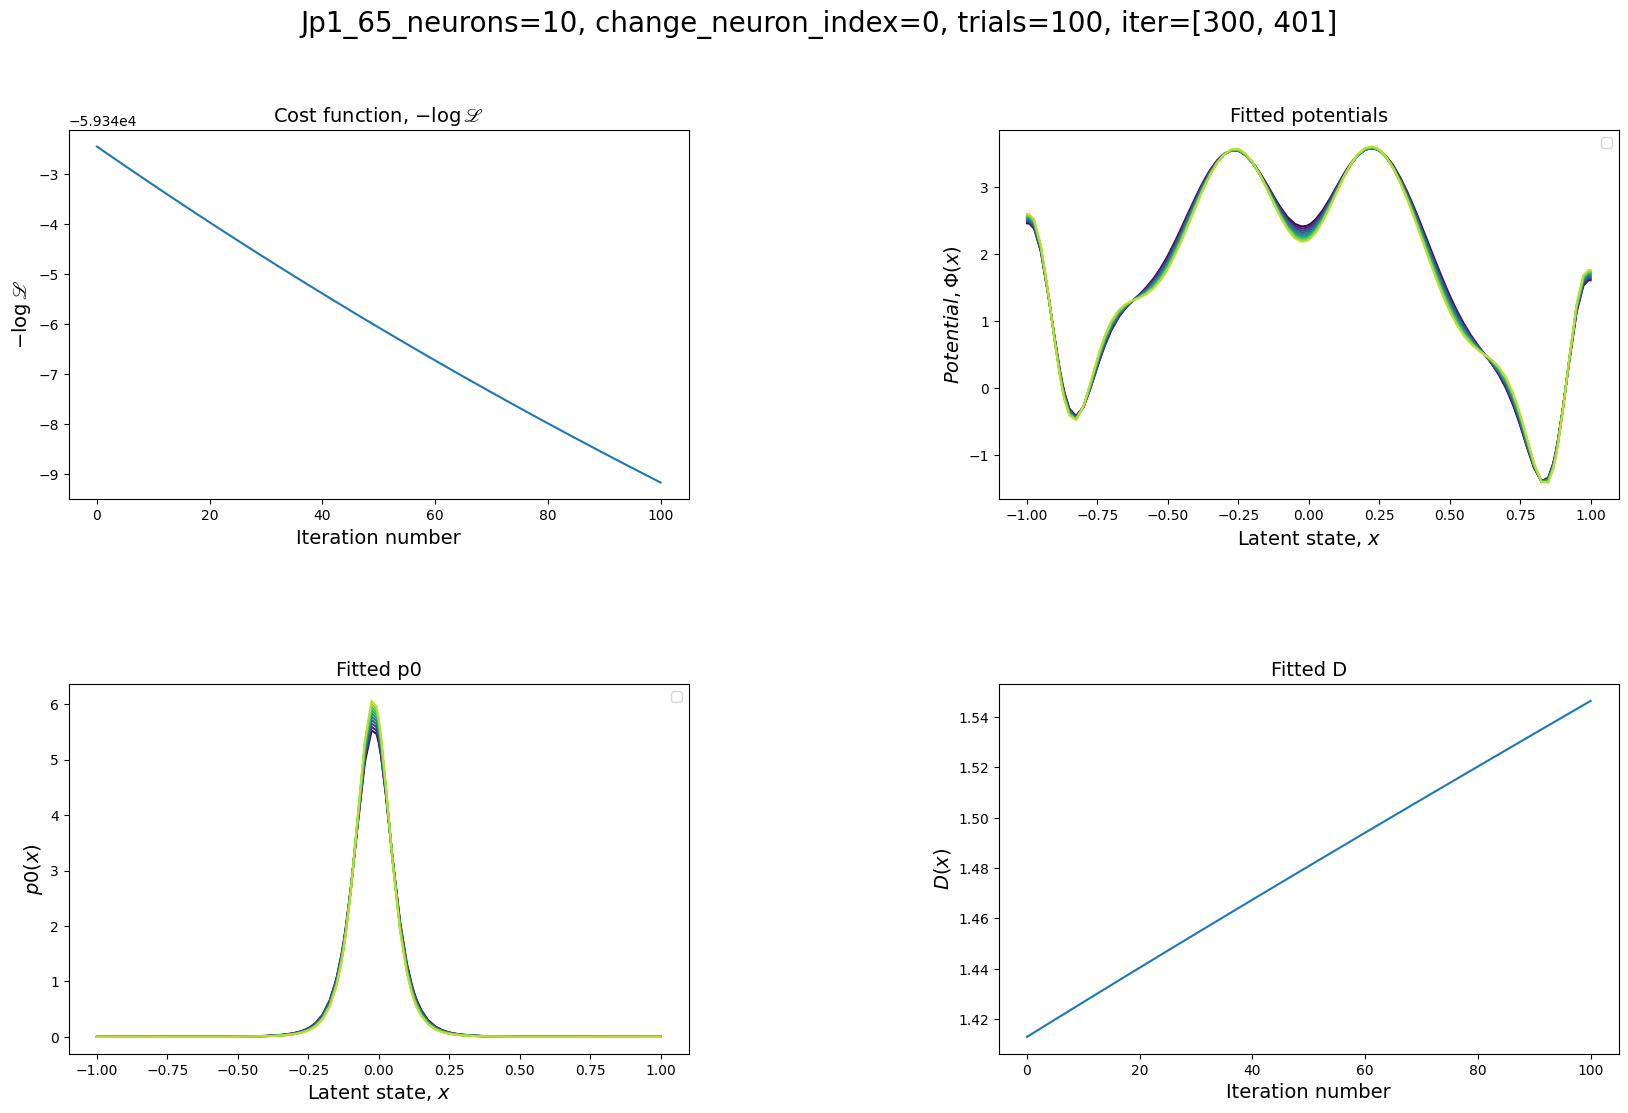

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


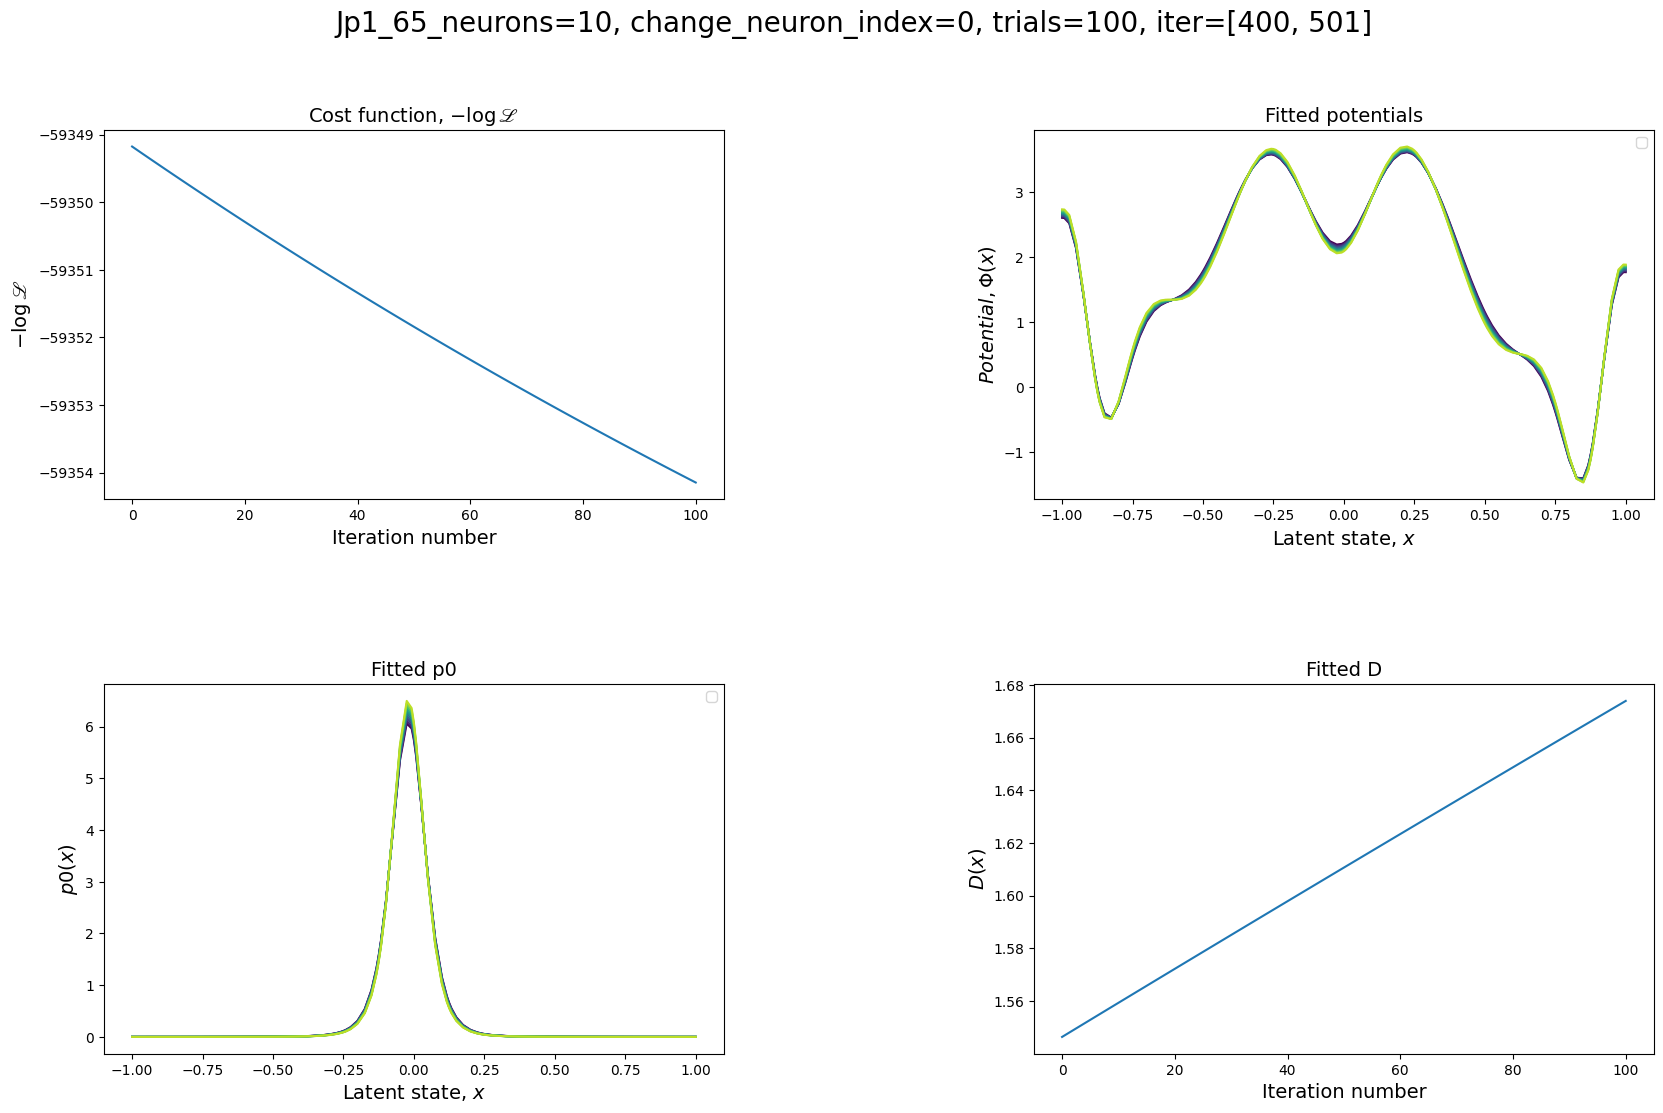

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


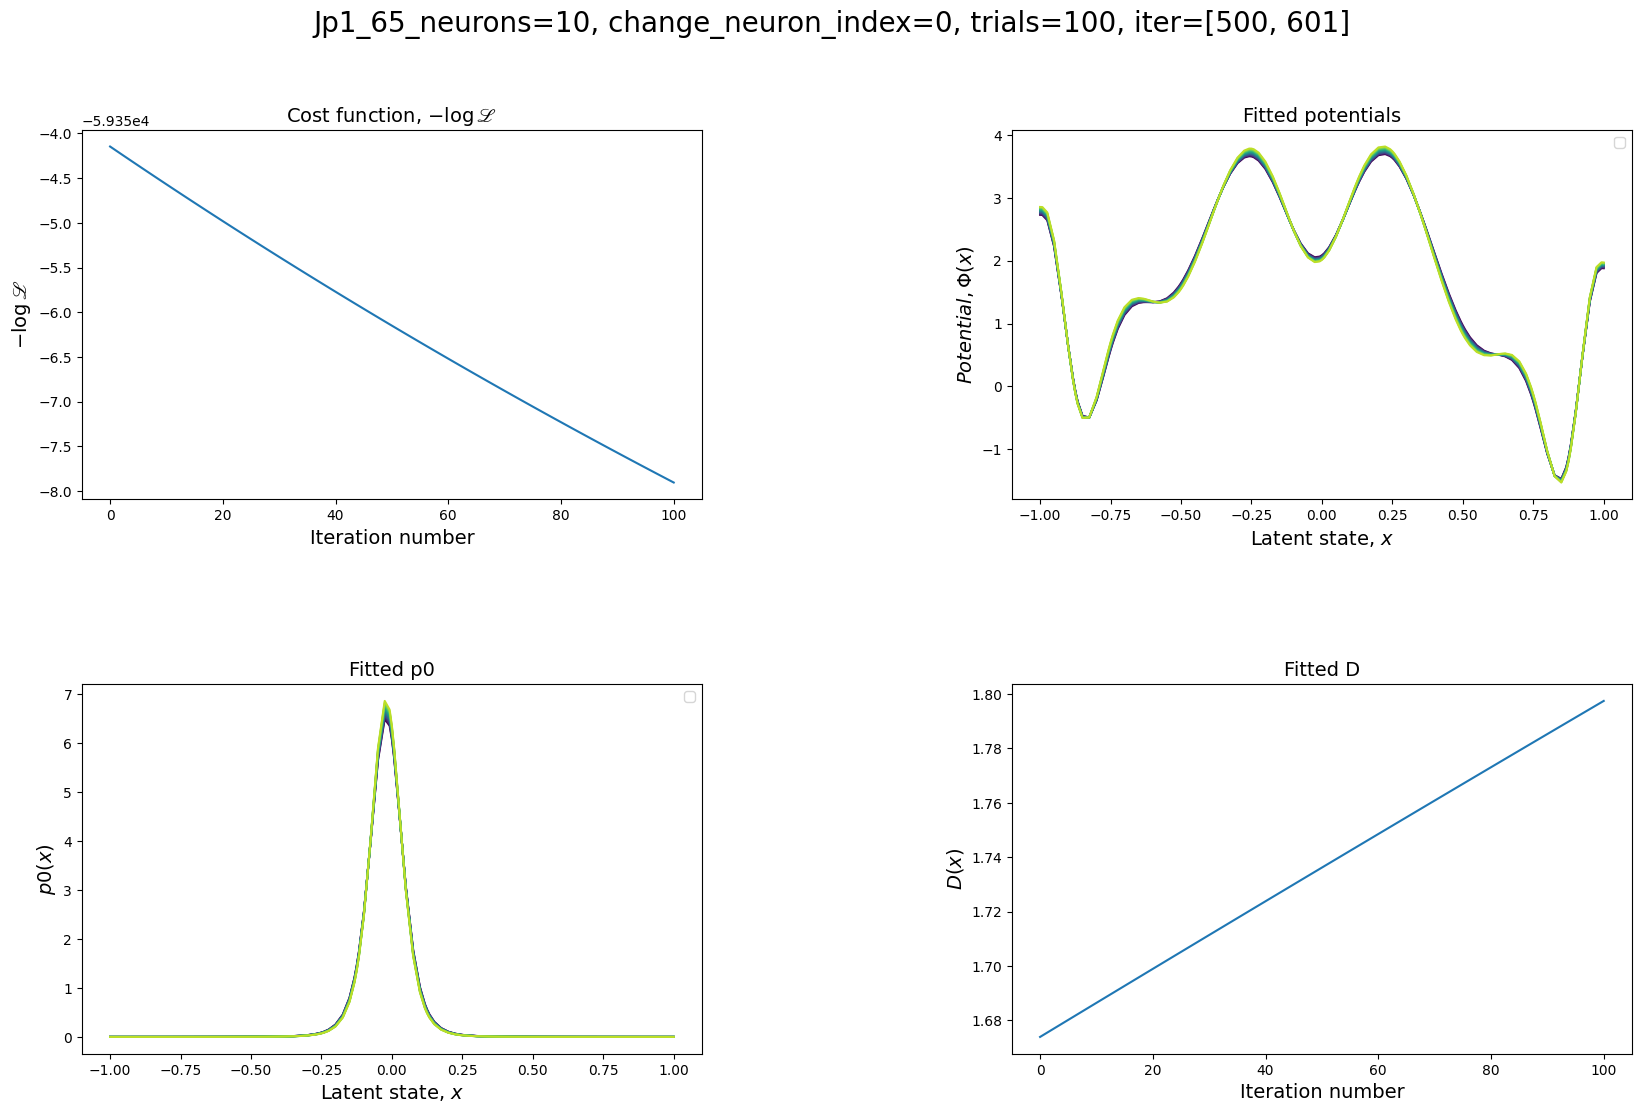

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


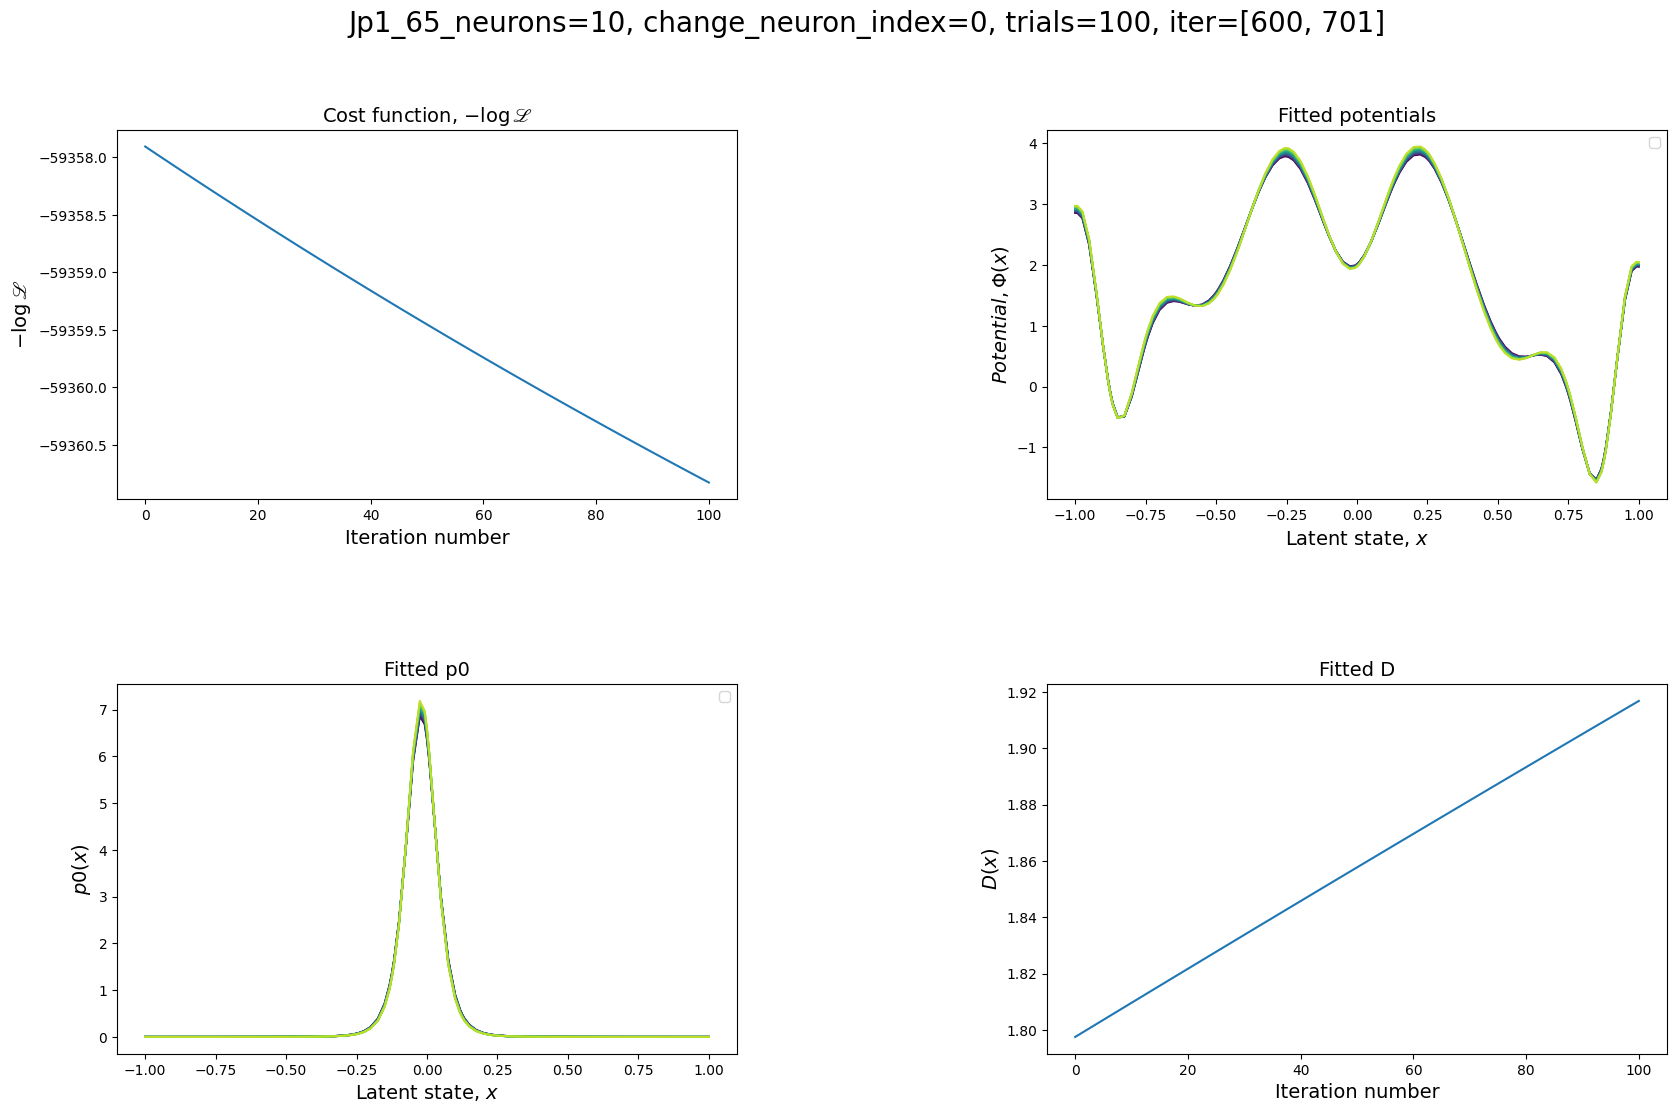

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


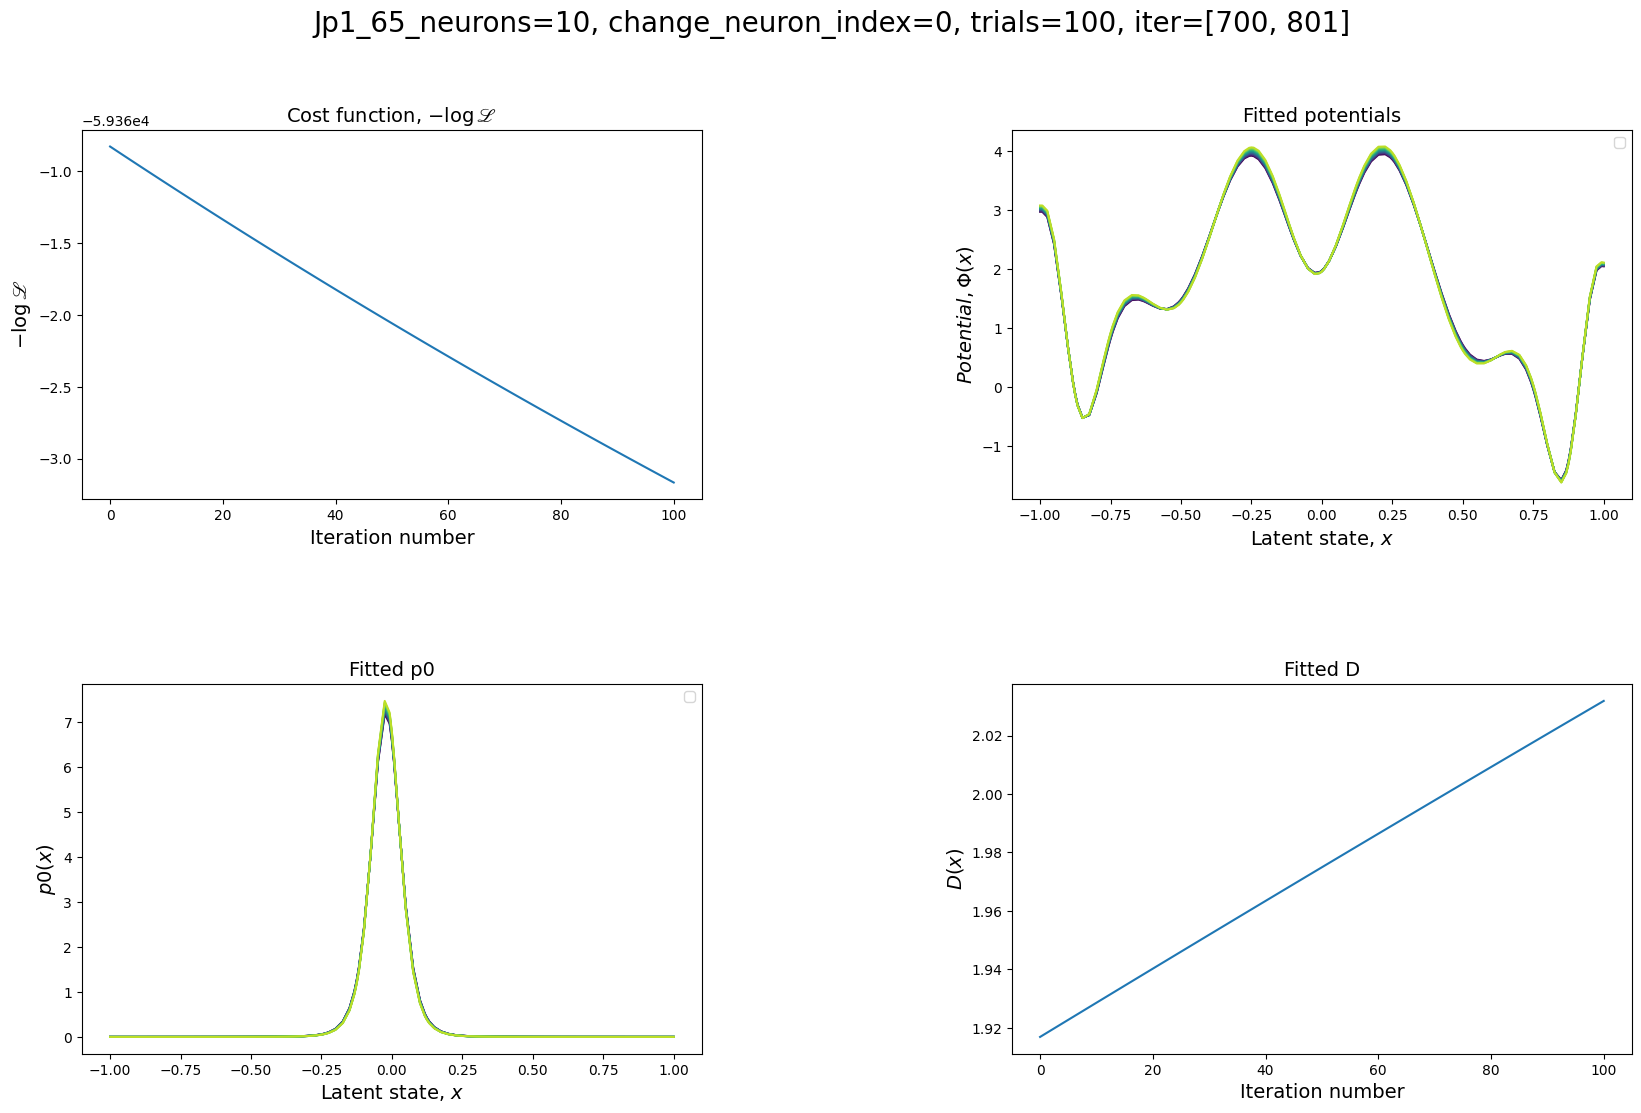

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


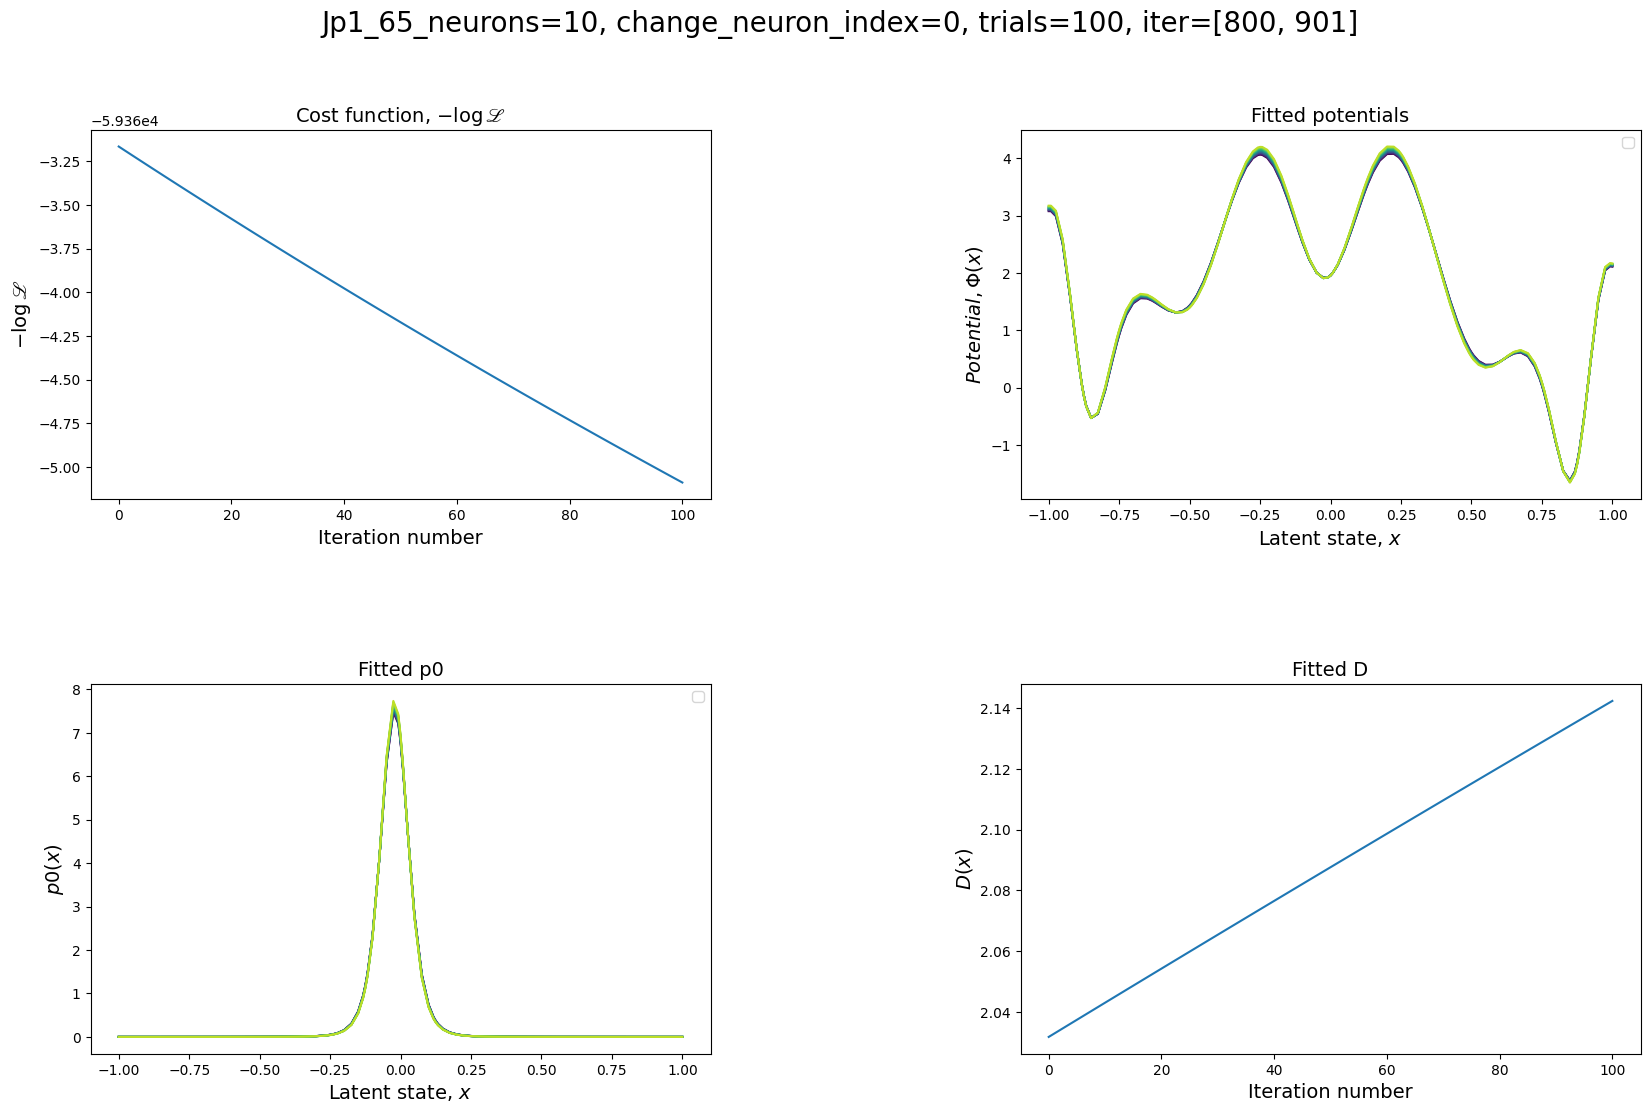

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


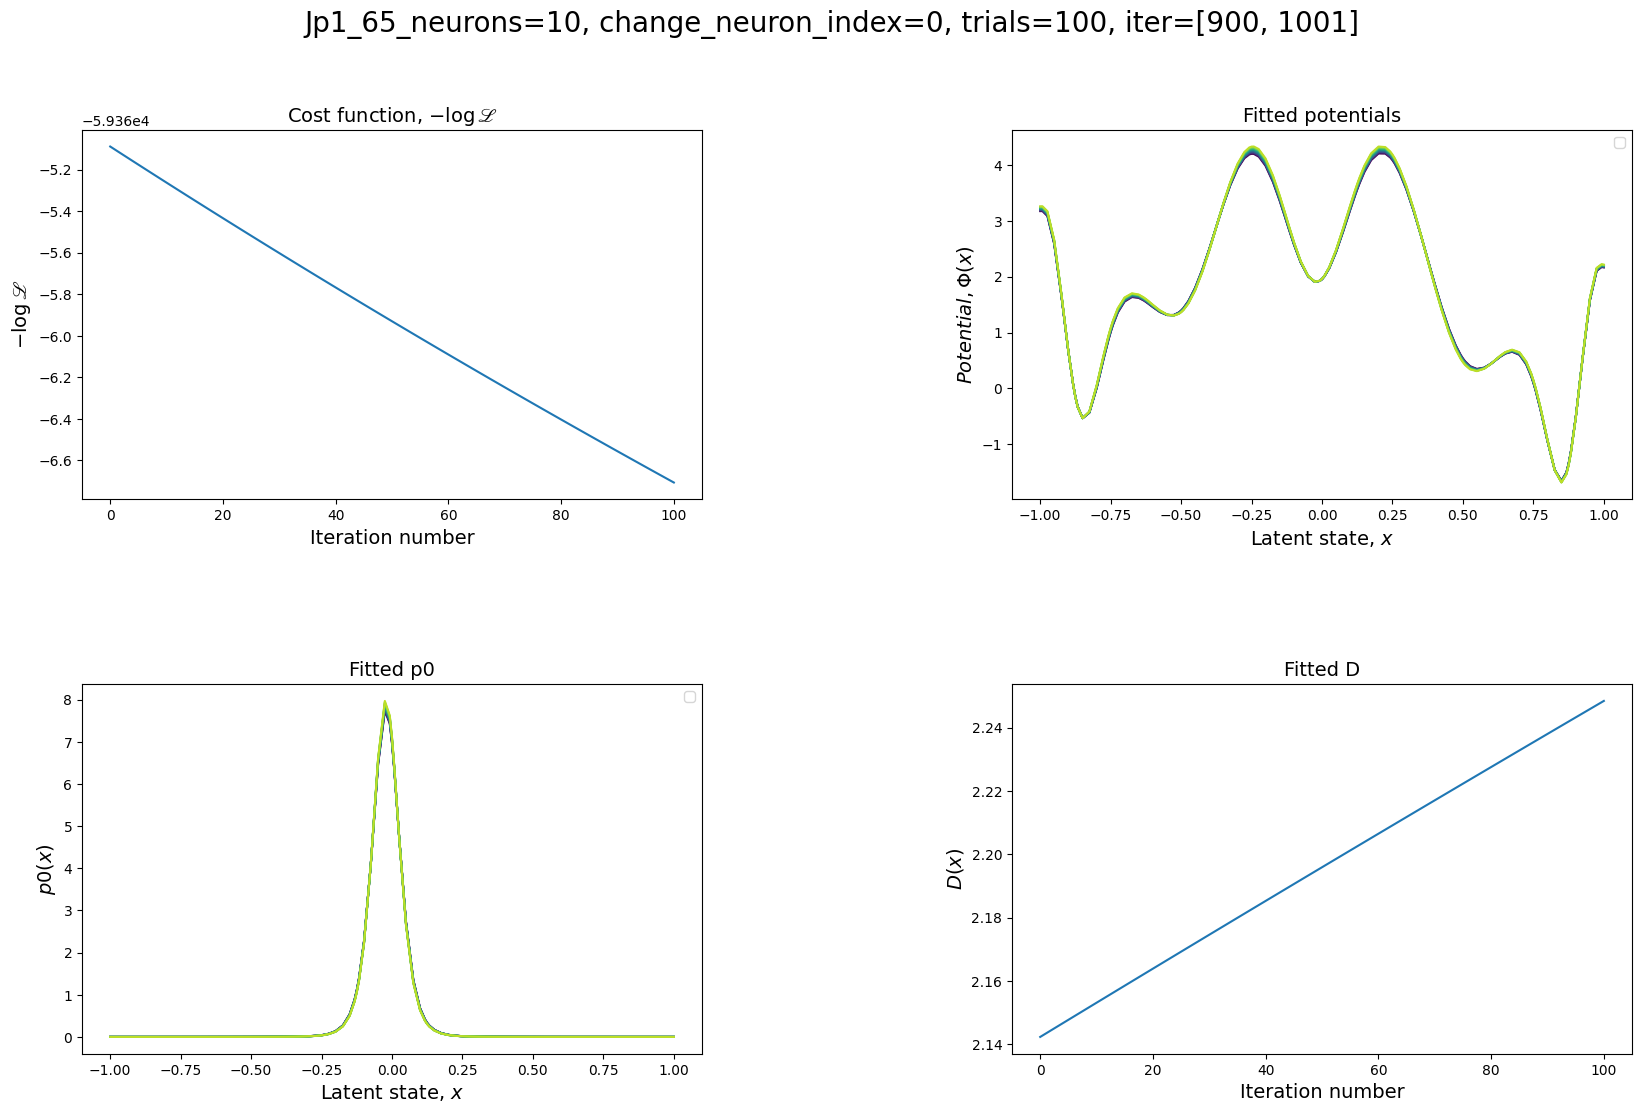

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


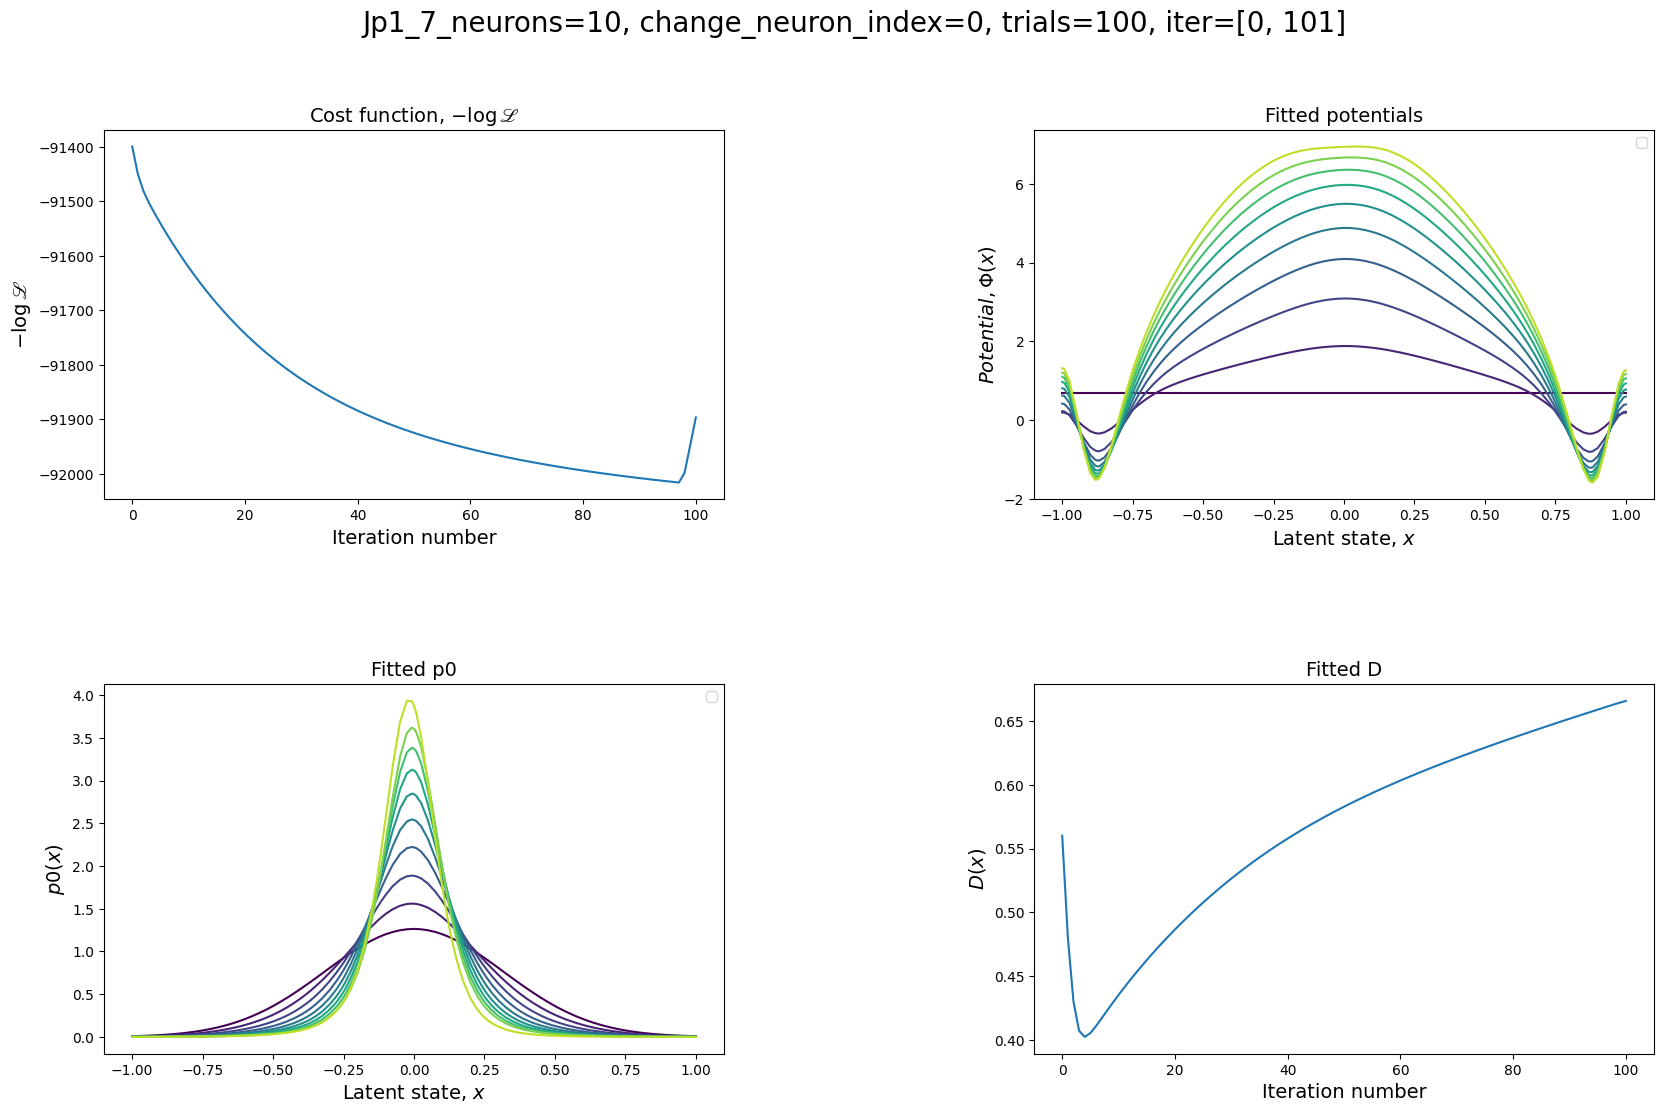

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


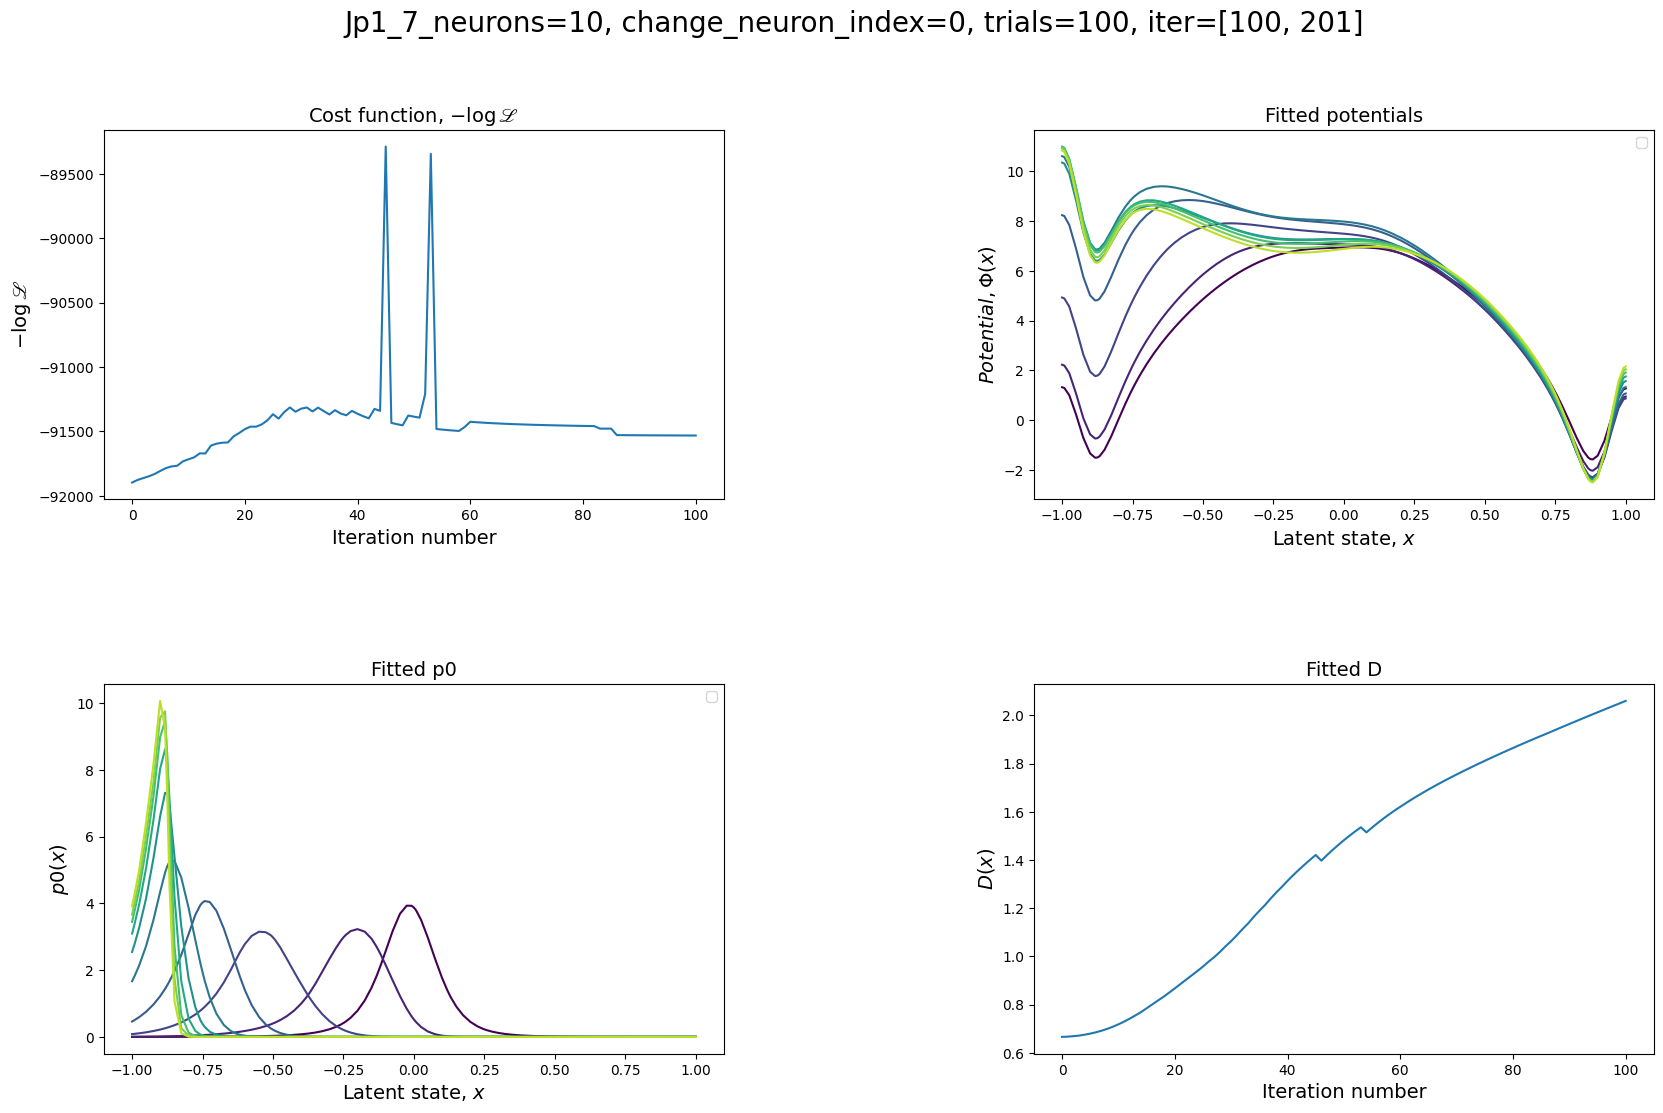

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


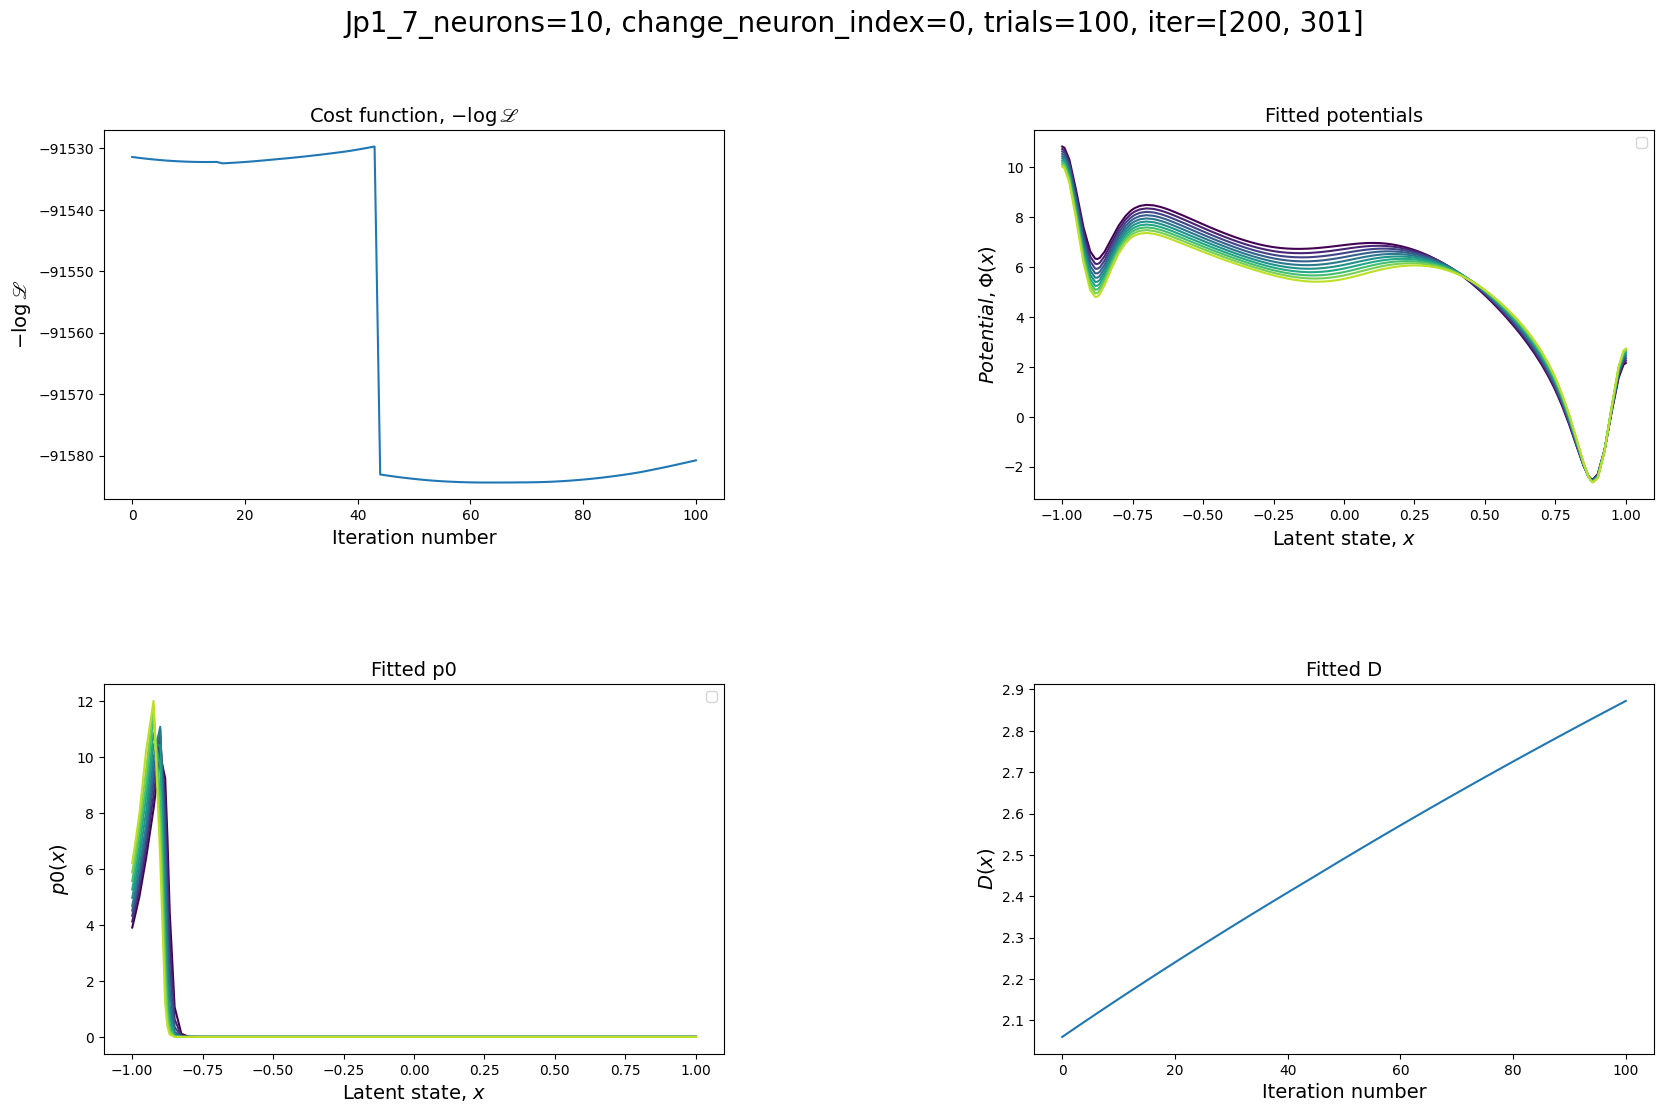

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


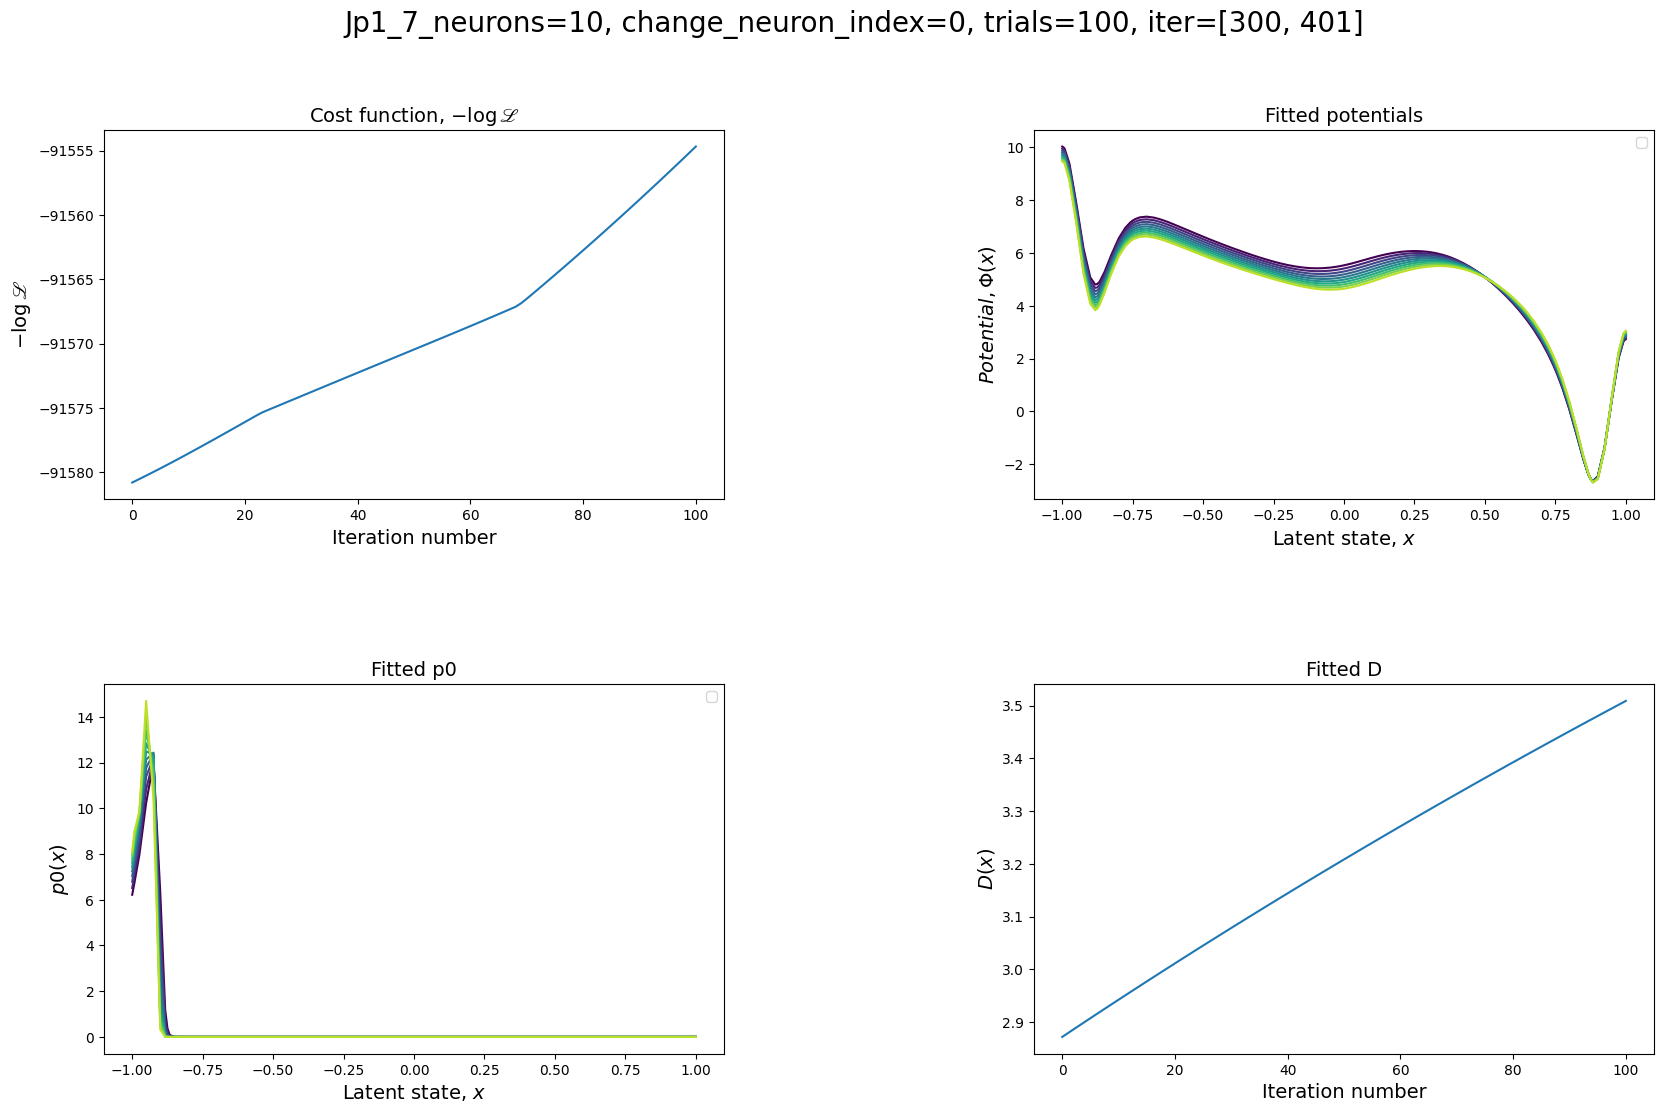

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


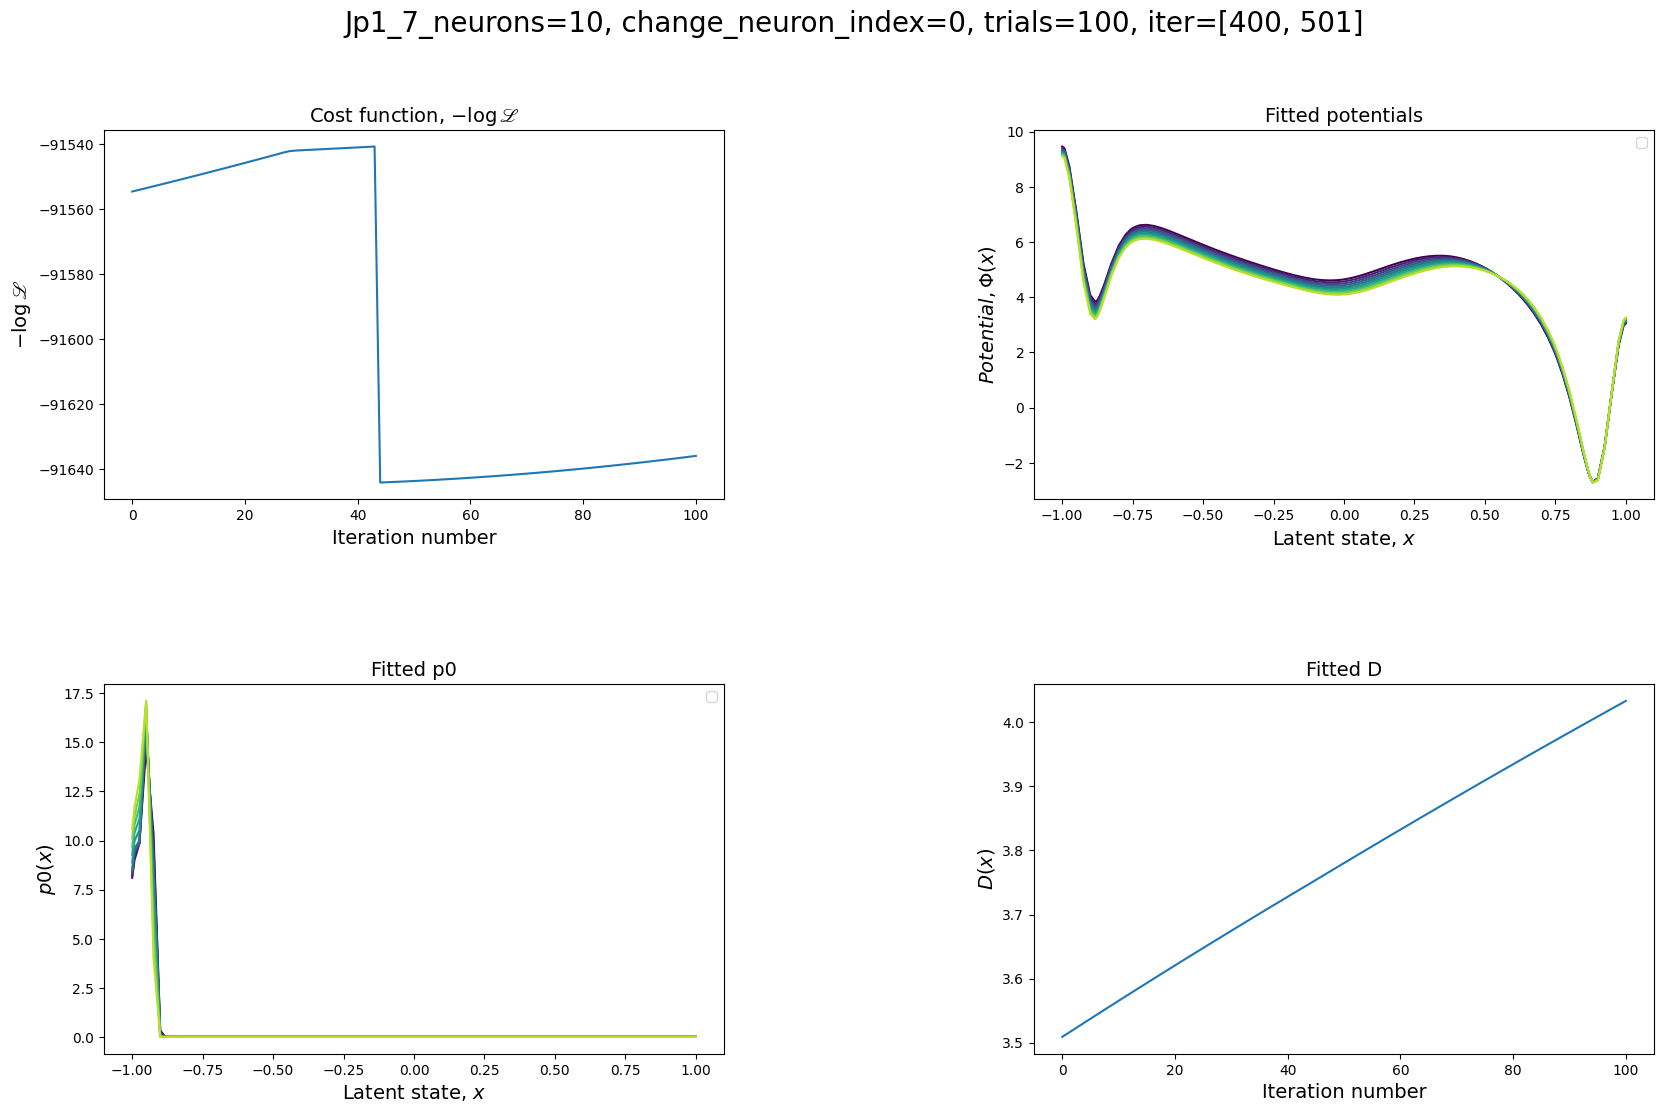

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


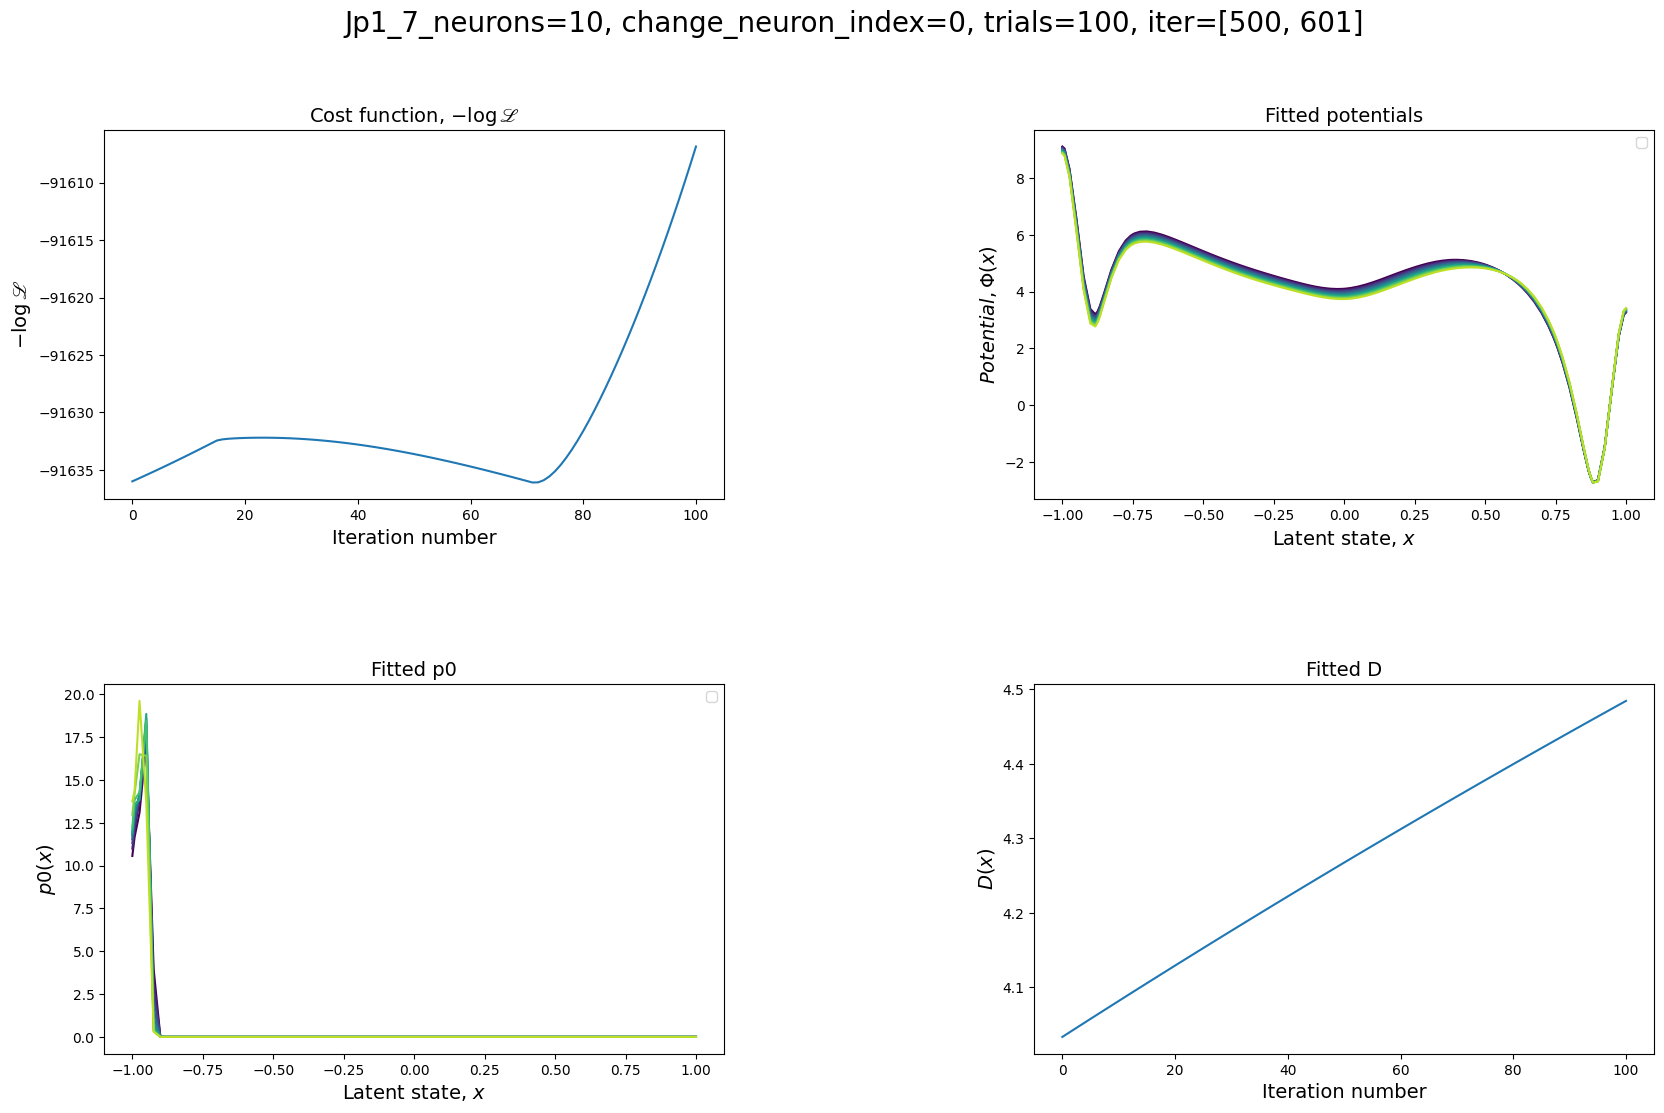

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


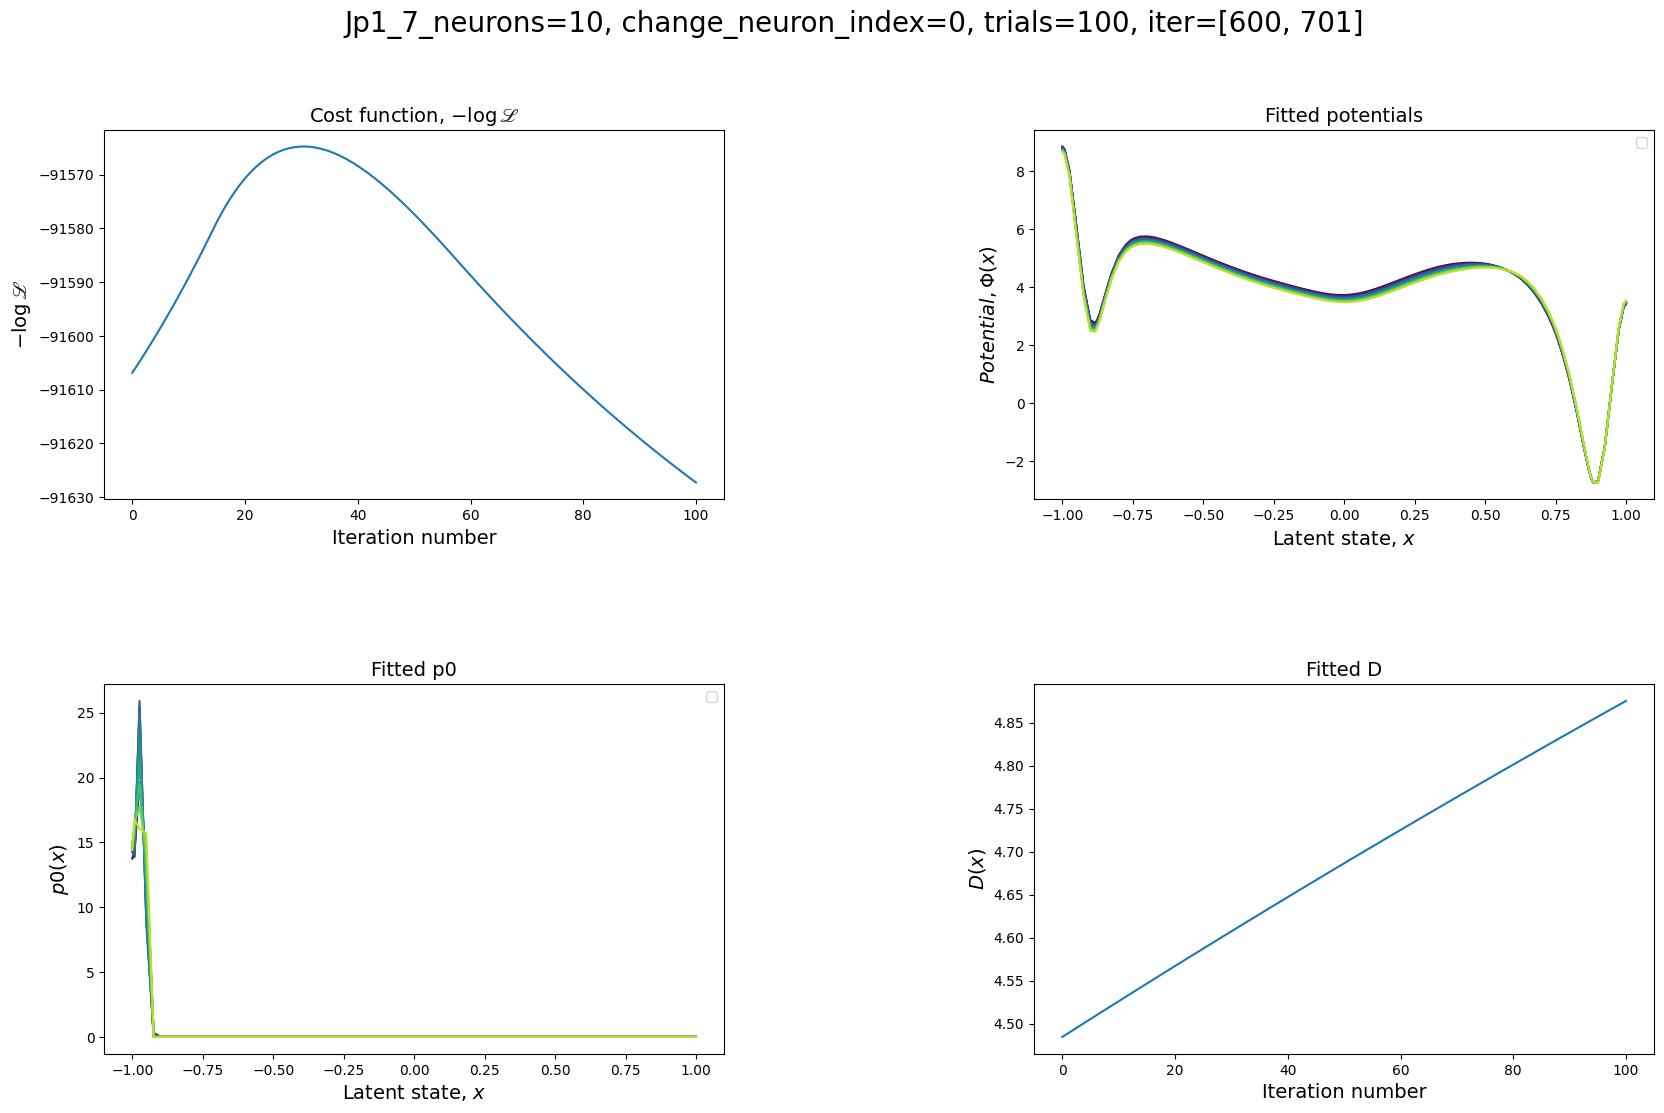

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


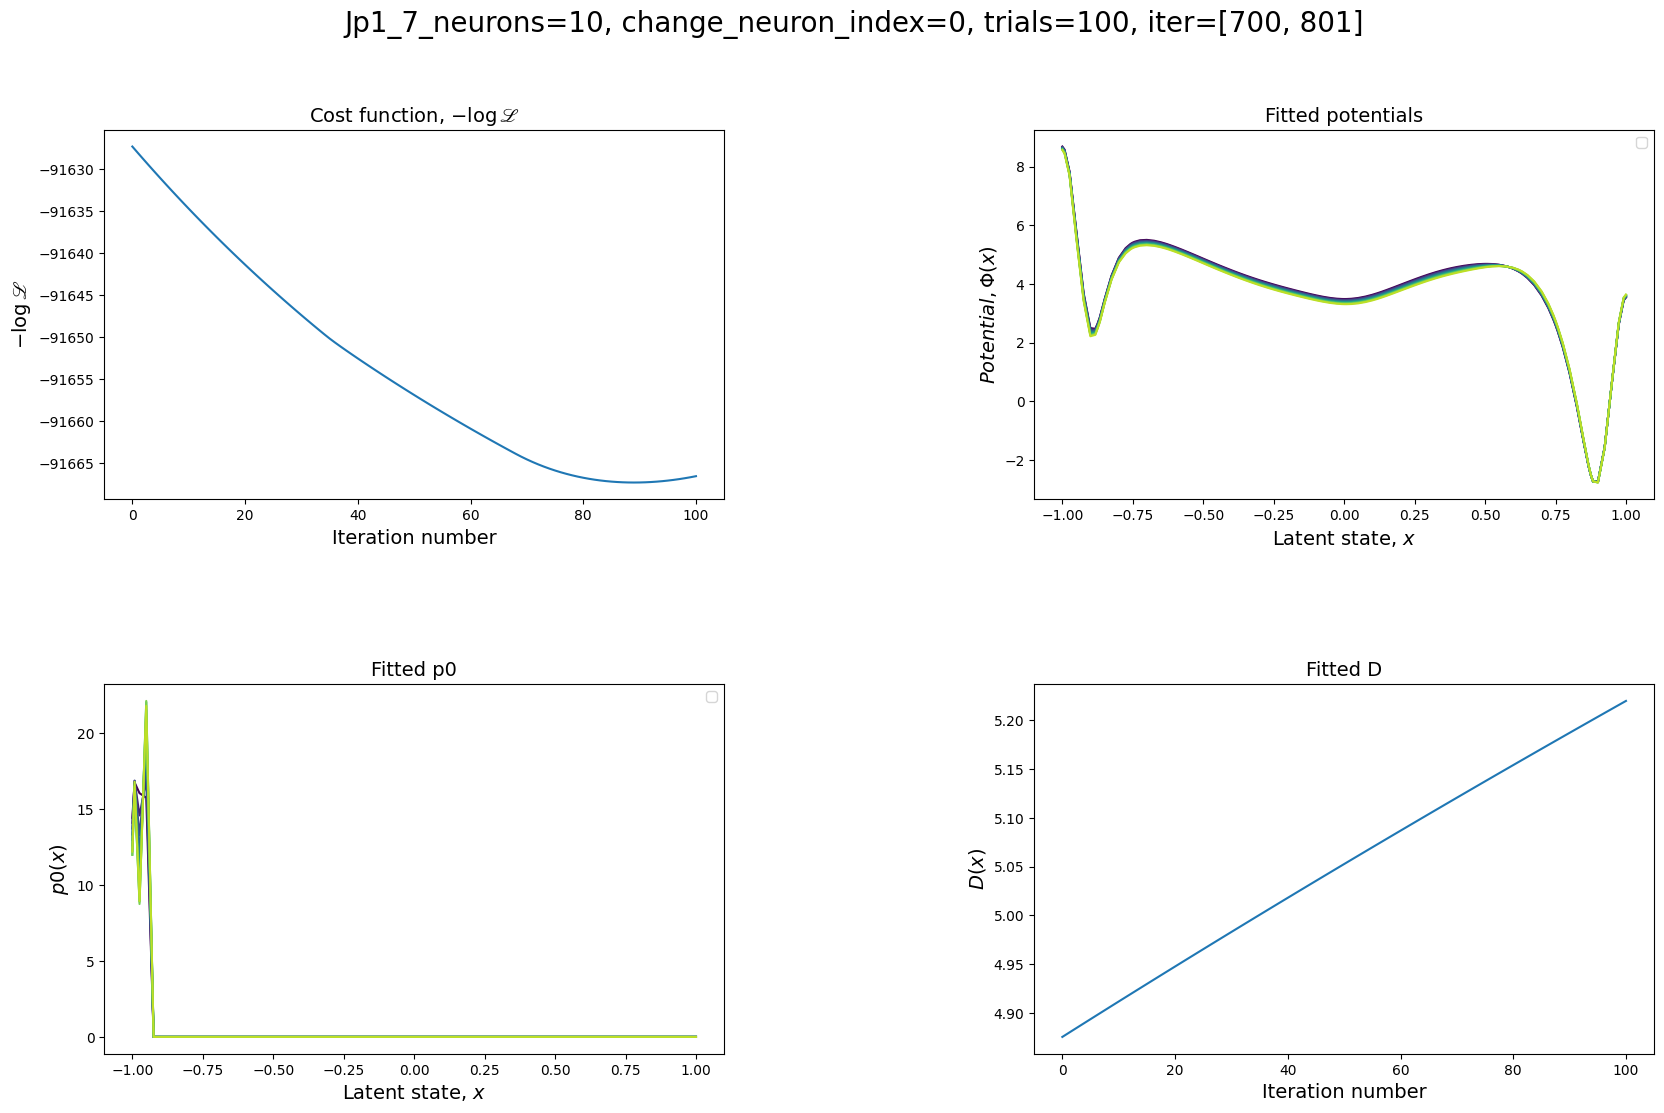

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


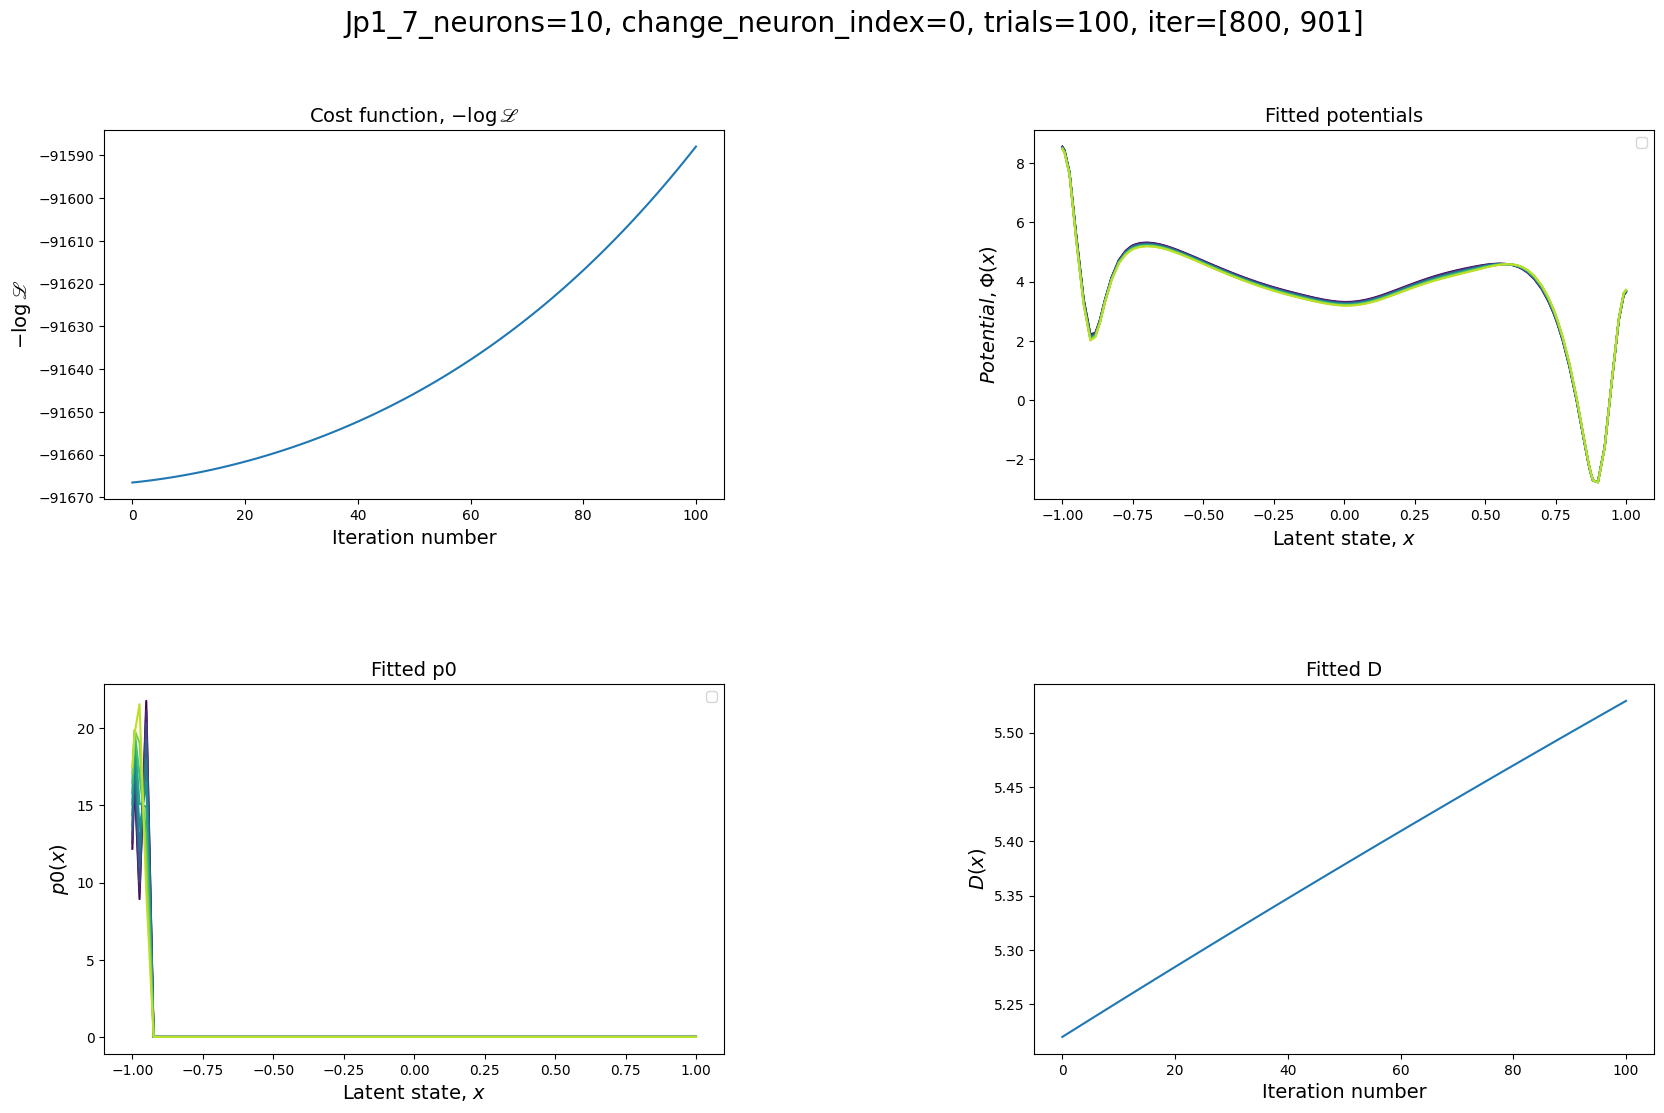

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


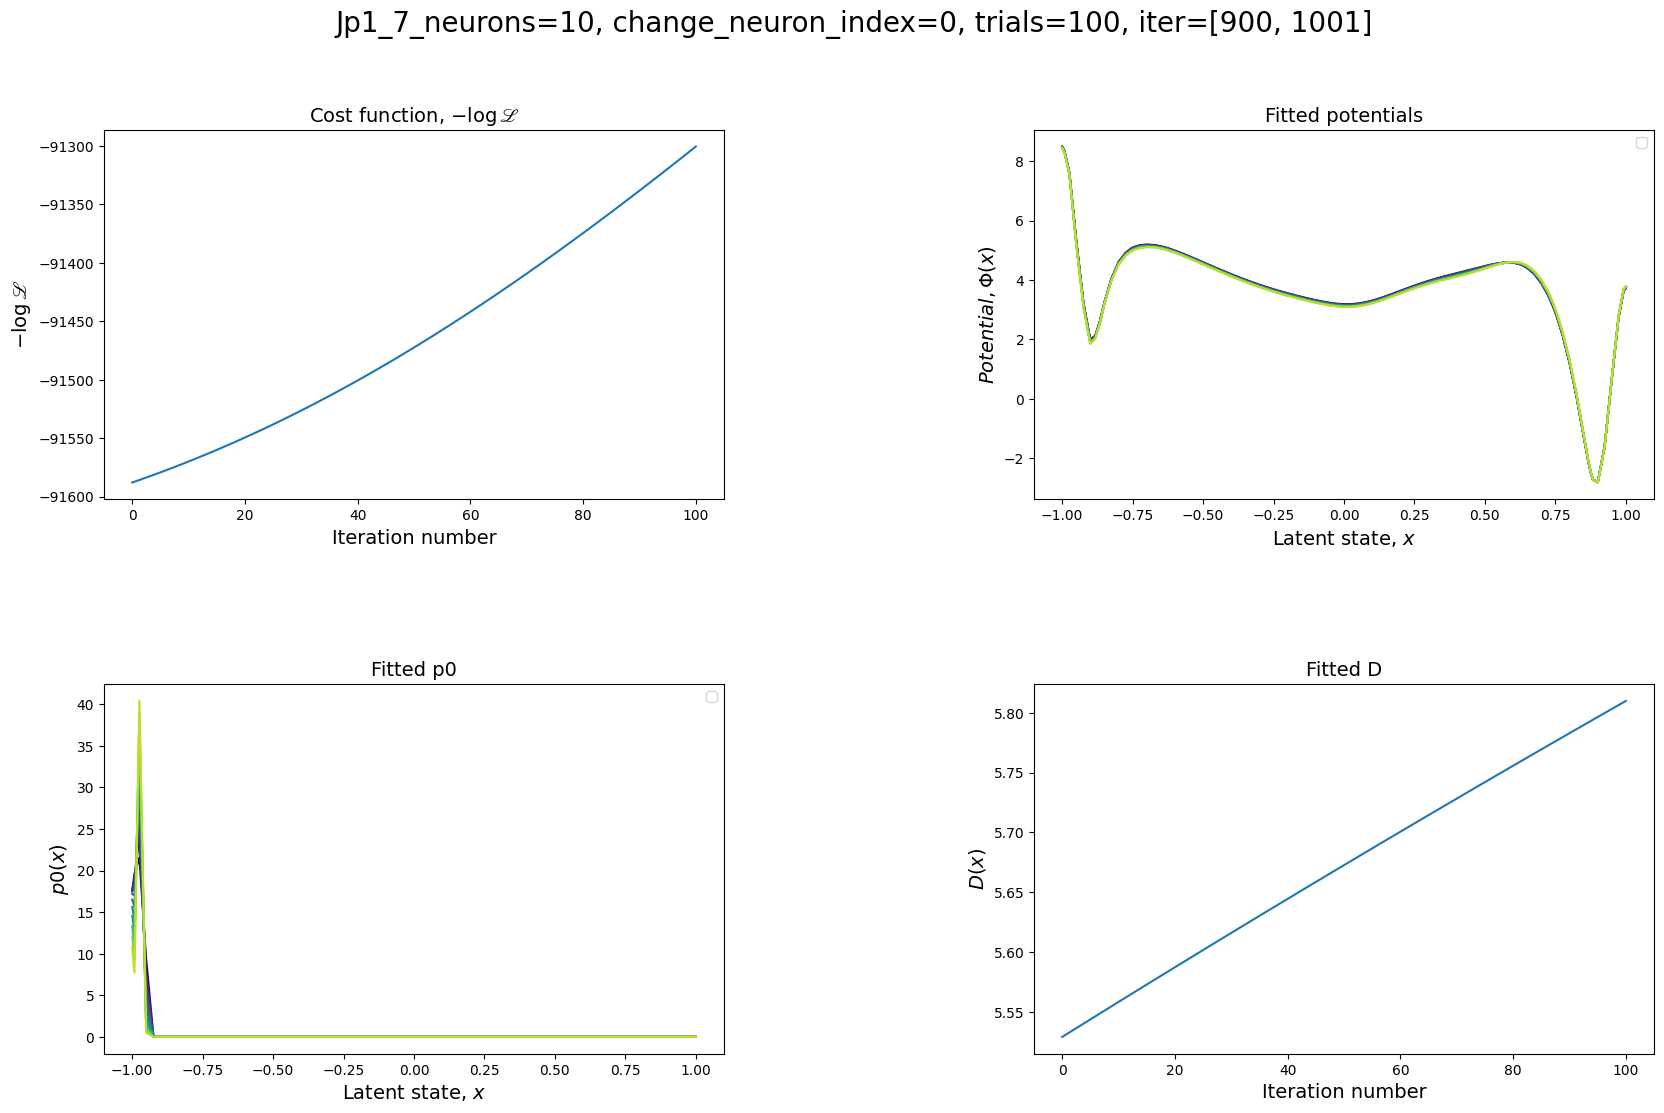

In [79]:
### Plot every 100 iteration the results of the long runs
# folder long run plots results 

## check if the + in the folder argument is the problem

folder_in_long_run = 'plot_iter'
iter_to_plot = 100
name_simul_list = ["Jp1_60", "Jp1_65", "Jp1_7"]
change_neuron = 0
#neur_to_keep =5 
#n_trials = 50
iter = 1000
for i, run in enumerate(name_simul_list):
    test_dir = f"long_run_dataset_{run}_start=7000_end=10000/"
    em_fitting = dict_run[run][0]
    for iter in range(10): 
        plot_long_run_main_results(run, plots_dir+test_dir+folder_in_long_run, em_fitting, change_neuron, neur_to_keep, n_trials, iter_to_plot, iter, plot_ext)

# Poster plots long run, final format 

In [ ]:
### FUNCTION TO PLOT LONG RUNS 

# FUNCTION "plot_main_results" to plot the main results

def poster_plot_long_run_main_results(name_simul, what_to_plot, plot_run, em_fitting, number_of_iterations, change_neuron, neur_to_keep, n_trials, plot_ext):
    latent_space = np.array([-1., -0.99198376, -0.97448126, -0.9505812,  -0.9244188,  -0.90051874,
    -0.88301624, -0.875,      -0.86698376, -0.84948126, -0.8255812,  -0.7994188,
    -0.77551874, -0.75801624, -0.75,       -0.74198376, -0.72448126, -0.7005812,
    -0.6744188,  -0.65051874, -0.63301624, -0.625,      -0.61698376, -0.59948126,
    -0.5755812,  -0.5494188,  -0.52551874, -0.50801624, -0.5,        -0.49198376,
    -0.47448126, -0.4505812,  -0.4244188,  -0.40051874, -0.38301624, -0.375,
    -0.36698376, -0.34948126, -0.3255812,  -0.2994188,  -0.27551874, -0.25801624,
    -0.25,       -0.24198376, -0.22448126, -0.2005812,  -0.1744188,  -0.15051874,
    -0.13301624, -0.125,      -0.11698376, -0.09948126, -0.0755812,  -0.0494188,
    -0.02551874, -0.00801624,  0.,         0.00801624,  0.02551874,  0.0494188,
     0.0755812,   0.09948126,  0.11698376,  0.125,       0.13301624,  0.15051874,
     0.1744188,   0.2005812,   0.22448126,  0.24198376,  0.25,        0.25801624,
     0.27551874,  0.2994188,   0.3255812,   0.34948126,  0.36698376,  0.375,
     0.38301624,  0.40051874,  0.4244188,   0.4505812,   0.47448126,  0.49198376,
     0.5,         0.50801624,  0.52551874,  0.5494188,   0.5755812,   0.59948126,
     0.61698376,  0.625,       0.63301624,  0.65051874,  0.6744188,   0.7005812,
     0.72448126,  0.74198376,  0.75,        0.75801624,  0.77551874,  0.7994188,
     0.8255812,   0.84948126,  0.86698376,  0.875,       0.88301624,  0.90051874,
     0.9244188,   0.9505812,   0.97448126,  0.99198376,  1.        ])


    # create a coherence level folder ->  lower_coherence
    logliks = em_fitting[f"iter_change_neur{change_neuron}"]['logliks']#[:number_of_iterations+1]
    fitted_peqs = em_fitting[f"iter_change_neur{change_neuron}"]['peqs']#[:,:number_of_iterations+1]
    prob_p0 = em_fitting[f"iter_change_neur{change_neuron}"]['p0s']#[:,:number_of_iterations+1]
    diffusion_D = em_fitting[f"iter_change_neur{change_neuron}"]['Ds']#[:number_of_iterations+1]
    fig_title = f"Potential energy profile of the latent state"

    number_of_displayed_iterations = 10
    display_iteration = np.linspace(0,number_of_iterations,number_of_displayed_iterations).astype('int')
    colors = plt.cm.viridis(np.linspace(0, 1, number_of_displayed_iterations+1))

    # plot the fitted parameters
    fig=plt.figure(figsize=(20,12))
    fig.suptitle(fig_title, fontsize=30)
    gs=gridspec.GridSpec(1,1,wspace=0.5,hspace=0.5)

    ax = plt.subplot(gs[0])
    if what_to_plot == "logliks":
        ax.set_title(r'Cost function, $-\log\mathscr{L}$', fontsize=14)
        plt.xlabel('Iteration number', fontsize=14)
        plt.ylabel(r'$-\log\mathscr{L}$', fontsize=14)
        ax.plot(np.array(range(number_of_iterations+1)),logliks[:number_of_iterations+1])

    elif what_to_plot == "Ds":
        plt.xlabel('Iteration number', fontsize=14)
        plt.ylabel(r'$D(x)$', fontsize=14)
        plt.plot(np.array(range(number_of_iterations+1)),diffusion_D[:number_of_iterations+1])

    elif what_to_plot == "peqs":
        ax.set_title(r'Fitted potentials', fontsize=14)
        plt.xlabel(r'Latent state, $x$', fontsize=14)
        plt.ylabel(r'$Potential, \Phi(x)$', fontsize=14)
        plt.tick_params(axis='both', labelsize=30)
        plt.plot(latent_space,-np.log(fitted_peqs[:,0]),label=f'Prior', c="black",ls='--')
        plt.plot(latent_space,-np.log(fitted_peqs[:,-1]),label=f'Inferred', c="black", ls='-', alpha=0.9)
        plt.legend(fontsize=12)

    elif what_to_plot == "p0s":
        ax.set_title(r'Fitted p0', fontsize=14)
        plt.xlabel(r'Latent state, $x$', fontsize=14)
        plt.ylabel(r'$p0(x)$', fontsize=14)
        plt.plot(latent_space,prob_p0[:,0],label=f'Prior', c="black",ls='--')
        plt.plot(latent_space,prob_p0[:,-1],label=f'Inferred', c="black", ls='-', alpha=0.9)
        plt.legend()

    #fig.tight_layout()
    plt.show()
    fig.savefig(plot_run + f'/{name_simul}_poster_final_result={what_to_plot}_iter={number_of_iterations}_fitted_params_change_neur={change_neuron}_N={neur_to_keep*2}_trials={n_trials*2}.pdf')
    fig.savefig(plot_run + f'/{name_simul}_poster_final_result={what_to_plot}_iter={number_of_iterations}_fitted_params_change_neur={change_neuron}_N={neur_to_keep*2}_trials={n_trials*2}.svg')




In [ ]:
# FUNCTION "plot_main_results" to plot the main results
''' 
def plot_main_results(name_simul, plot_run, em_fitting, change_neuron, neur_to_keep, n_trials, number_of_iterations, formatted_now):
    ''' 
    '''
    
    number_of_displayed_iterations = 10
    display_iteration = np.linspace(0,number_of_iterations,number_of_displayed_iterations).astype('int')

    # Create a colormap
    colors = plt.cm.viridis(np.linspace(0, 1, number_of_displayed_iterations+1))

    # create a coherence level folder ->  lower_coherence
    fitted_peqs = em_fitting.iterations_GD_.keys()
    logliks = em_fitting.iterations_GD_['logliks']
    fitted_peqs = em_fitting.iterations_GD_['peqs']
    prob_p0 = em_fitting.iterations_GD_['p0s']
    diffusion_D = em_fitting.iterations_GD_['Ds']

    print(f"len fitted_peqs {len(fitted_peqs)}")
    min_potential = np.min(fitted_peqs[:-1])
    print(f"min potential {min_potential}")
    # plot the fitted parameters
    fig=plt.figure(figsize=(20,12))
    fig.suptitle(f'{name_simul}_neurons={neur_to_keep*2}, change_neuron_index={change_neuron}, trials={n_trials*2}, iter={number_of_iterations}', fontsize=20)
    gs=gridspec.GridSpec(2,2,wspace=0.5,hspace=0.5)

    ax = plt.subplot(gs[0])
    ax.set_title(r'Cost function, $-\log\mathscr{L}$', fontsize=14)
    plt.xlabel('Iteration number', fontsize=14)
    plt.ylabel(r'$-\log\mathscr{L}$', fontsize=14)
    ax.plot(np.array(range(number_of_iterations+1)),logliks)

    ax = plt.subplot(gs[1])
    ax.set_title(r'Fitted potentials', fontsize=14)
    plt.xlabel(r'Latent state, $x$', fontsize=14)
    plt.ylabel(r'$Potential, \Phi(x)$', fontsize=14)
    for i,it in enumerate(display_iteration):
        plt.plot(em_fitting.x_d_,-np.log(fitted_peqs[:,it]),label=f'Iteration {it}', c=colors[i])
    plt.legend()

    ax = plt.subplot(gs[2])
    ax.set_title(r'Fitted p0', fontsize=14)
    plt.xlabel(r'Latent state, $x$', fontsize=14)
    plt.ylabel(r'$p0(x)$', fontsize=14)
    for i,it in enumerate(display_iteration):
        plt.plot(em_fitting.x_d_,prob_p0[:,it],label=f'Iteration {it}', c=colors[i])
    plt.legend()

    ax = plt.subplot(gs[3])
    ax.set_title(r'Fitted D', fontsize=14)
    plt.xlabel('Iteration number', fontsize=14)
    plt.ylabel(r'$D(x)$', fontsize=14)
    plt.plot(np.array(range(number_of_iterations+1)),diffusion_D)

    plt.show()
    fig.savefig(plot_run + f'/{name_simul}_fitted_params_change_neur={change_neuron}_N={neur_to_keep*2}_number_of_iterations={number_of_iterations}_trials={n_trials*2}_{formatted_now}{plot_ext}')
'''

In [ ]:
# Define the path to the pickle file

# folders for plots and general parameters


new_plots_dir = "plot/final_poster/"
if not os.path.exists(new_plots_dir):
    os.makedirs(new_plots_dir)
plots_dir = "plot/new_poster/"
plot_ext = ".jpg"

name_simul_list = ["Jp1_60", "Jp1_65", "Jp1_7"]

n_trials = 50
number_of_iterations = 100
neur_to_keep = 5 # number of neurons used in the run
change_neurons_list = [neur_to_keep*0,neur_to_keep*2,neur_to_keep*4, neur_to_keep*6, neur_to_keep*8, neur_to_keep*10]

dict_run = {}
for i, run in enumerate(name_simul_list):
    test_dir = f"long_run_dataset_{run}_start=7000_end=10000"
    pattern = os.path.join(plots_dir + test_dir, f'long_run_dict_em_*') #fitting_values_{run}_N=5_change_neur=[0]_trials=100_iter=1000*.pkl')
    print(pattern)
    pickle_files = glob.glob(pattern)
    print(pickle_files)
    dict_run[run] = []
    # Load each pickle file and store the data in a list
    for file_path in pickle_files:
        with open(file_path, 'rb') as file:
            data = pickle.load(file)
            dict_run[run].append(data)

#Print the loaded data to verify
# for i, data in enumerate(dict_run.keys()):
#     print(f"Data from file {data}: {dict_run[data]}")

plot/new_poster/long_run_dataset_Jp1_60_start=7000_end=10000\long_run_dict_em_*
['plot/new_poster/long_run_dataset_Jp1_60_start=7000_end=10000\\long_run_dict_em_fitting_values_Jp1_60_N=5_change_neur=[0]_trials=100_iter=1000_20241102_122642.pkl']
plot/new_poster/long_run_dataset_Jp1_65_start=7000_end=10000\long_run_dict_em_*
['plot/new_poster/long_run_dataset_Jp1_65_start=7000_end=10000\\long_run_dict_em_fitting_values_Jp1_65_N=5_change_neur=[0]_trials=100_iter=1000_20241102_133054.pkl']
plot/new_poster/long_run_dataset_Jp1_7_start=7000_end=10000\long_run_dict_em_*
['plot/new_poster/long_run_dataset_Jp1_7_start=7000_end=10000\\long_run_dict_em_fitting_values_Jp1_7_N=5_change_neur=[0]_trials=100_iter=1000_20241031_180329.pkl']


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


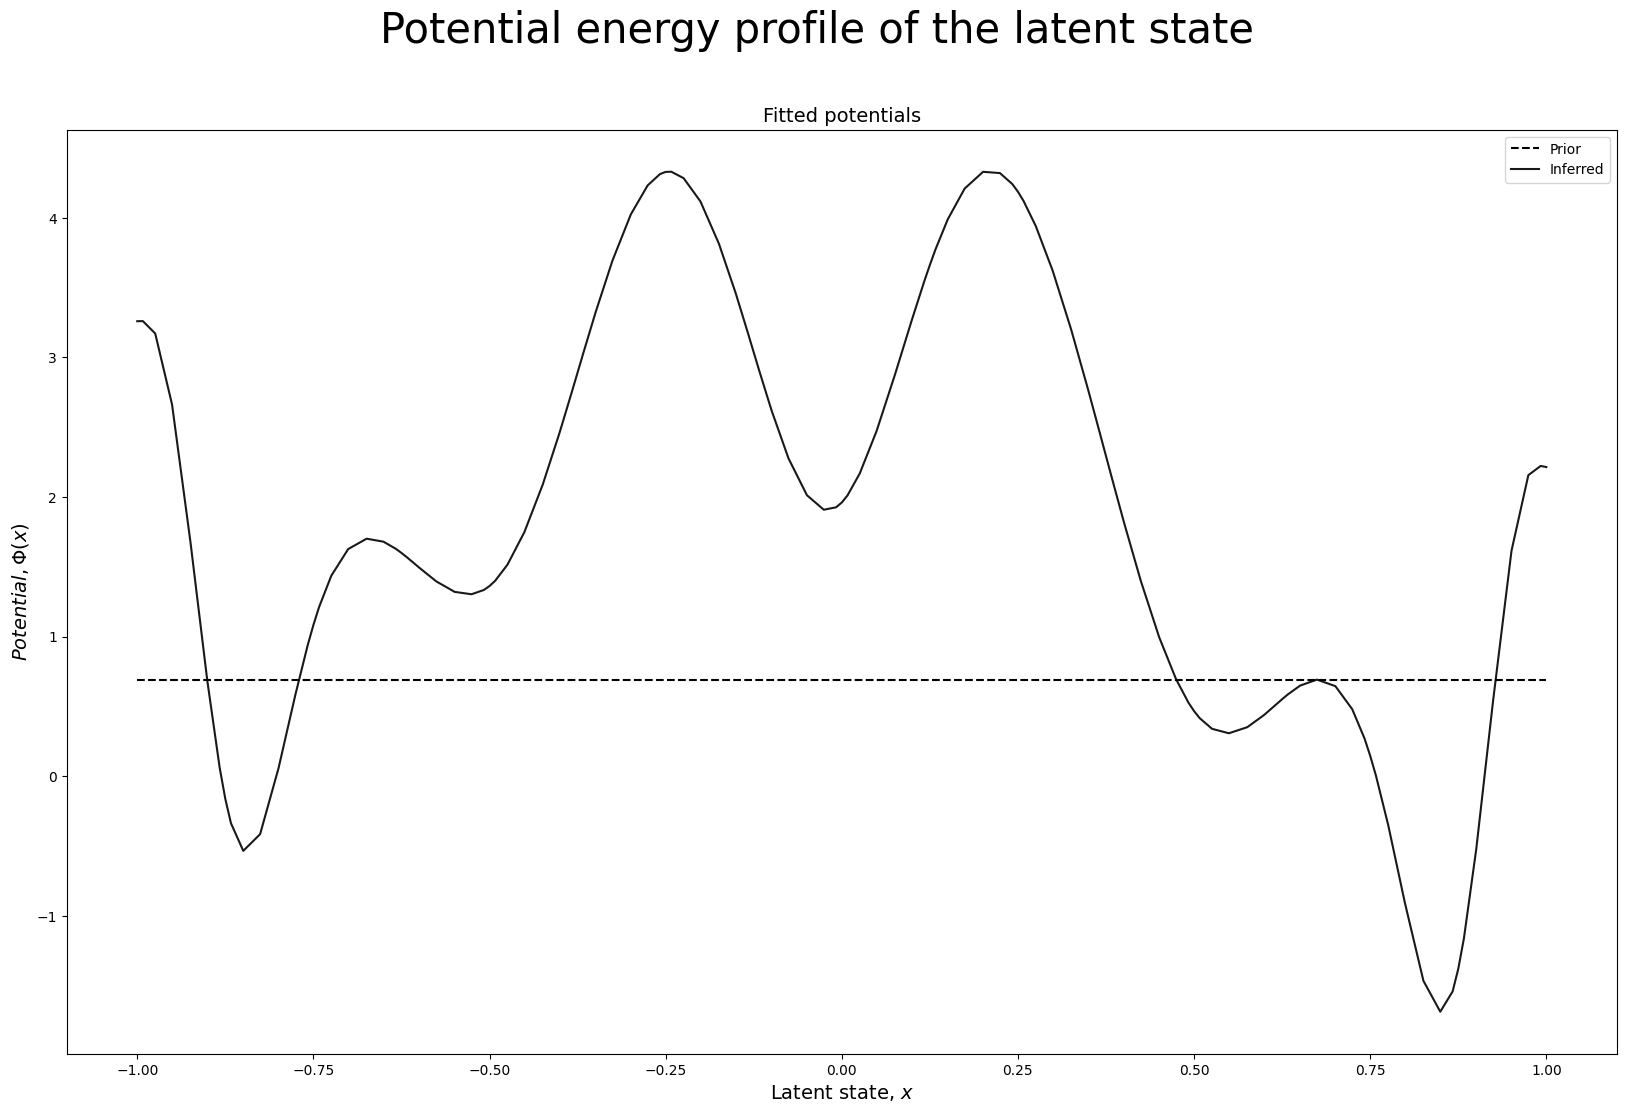

In [ ]:
### Plot every 100 iteration the results of the long runs
# folder long run plots results 

## check if the + in the folder argument is the problem
plot_ext = '.svg'
what_to_plot = 'peqs' # 'logliks', 'Ds', 'peqs', 'p0s'
folder_in_long_run = 'poster_plots'
iter_to_plot = 100
name_simul_list = ["Jp1_65"]#, "Jp1_65", "Jp1_7"]
change_neuron = 2
#neur_to_keep =5 
#n_trials = 50
iter = 1000
for i, run in enumerate(name_simul_list):
    em_fitting = dict_run[run][0]#['iter_change_neur0']['peqs'][:,0]
    poster_plot_long_run_main_results(run, what_to_plot, plots_dir+folder_in_long_run, em_fitting, number_of_iterations, change_neuron, neur_to_keep, n_trials, plot_ext)

# old codes single file 

In [ ]:
# todo examples 
# // TODO: something todo

# // FIXME: a fix is needed

# // BUG: a bug is found